## MTG Pricing Predictor - Project Luther (Michael Lin)

### Initialize Selenium to Scrape

In [1717]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
import matplotlib.pyplot as plt
import seaborn as sns
import math
#import ml_insights as mli
from sklearn.metrics import mean_squared_error, r2_score

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

In [992]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

import os
chromedriver = "/Applications/chromedriver"
os.environ["webdriver.chrome.driver"] = chromedriver

driver = webdriver.Chrome(chromedriver)

In [ ]:
from selenium.webdriver.support.ui import Select

#find important turnaments
def init_event_search():
    url = "http://mtgtop8.com/search"
    driver.get(url)

    #uncheck level checkbox
    comp_check = driver.find_element_by_xpath("/html/body/div[3]/div/table/tbody/tr/td[1]/form/table/tbody/tr[6]/td[2]/input[3]")
    comp_check.click()

    comp_check = driver.find_element_by_xpath("/html/body/div[3]/div/table/tbody/tr/td[1]/form/table/tbody/tr[6]/td[2]/input[4]")
    comp_check.click()
    
    format_selector = Select(driver.find_element_by_name("format"))
    format_selector.select_by_visible_text("Modern")

    startdate_box = driver.find_element_by_css_selector('body > div.page > div > table > tbody > tr > td:nth-child(1) > form > table > tbody > tr:nth-child(11) > td:nth-child(2) > input[type="text"]')
    startdate_box.send_keys("1/1/2016")
    
    # click submit button
    submit_button = driver.find_element_by_xpath("/html/body/div[3]/div/table/tbody/tr/td[1]/form/table/tbody/tr[13]/td/input")
    submit_button.click()
    
# extract event links from turnament table
def extract_deck_links():

    elem = driver.find_elements_by_css_selector('td.S11 a')
    deck_list = [ ( x.text, x.get_attribute("href")) for x in elem]

    elem = driver.find_elements_by_css_selector('td.G11 a')
    player_list = [ ( x.text, x.get_attribute("href")) for x in elem]

    elem = driver.find_elements_by_css_selector('td.S10 a')
    event_list = [ ( x.text, x.get_attribute("href")) for x in elem]

    elem = driver.find_elements_by_css_selector('td.S11[align="center"]')
    rank_list = [ ( x.text ) for x in elem]

    # find next column after Rank column which is the event date
    elem = driver.find_elements_by_css_selector('td.S11[align="center"] + td')
    event_date_list = [ ( x.text ) for x in elem]

    # combine lists
    ret = [(a,b,c,d,e) for a,b,c,d,e  in zip(deck_list, player_list, event_list, rank_list, event_date_list)]

    return ret

#        print(x.text, x.get_attribute("href"))
#    for i,x in enumerate(content):
#        print(x.text, x.get_attribute("href"))


    

### Extract Turnament data & Save each TOURNAMENT deck file locally

In [1220]:
import pprint
import pickle

pp = pprint.PrettyPrinter(indent=4)

# find first modern tournament page
url = "http://mtgtop8.com/search"
init_event_search()
deck_links = extract_deck_links()


# extract remaining tournament data
pagenum = 1
next_page = driver.find_element_by_css_selector("body > div.page > div > table > tbody > tr > td:nth-child(2) > form > table > tbody > tr:nth-child(2) > td > table > tbody > tr > td:nth-child(10) > div")
while (next_page and (pagenum < 100)):
    print("========== Page / Count >> ", pagenum, len(deck_links))
    next_page.click()
    
    # extract links on this page
    new_list = extract_deck_links()
    deck_links.extend(new_list)
    
    # persist links
#    with open("deck_links.pkl", "wb") as f:
#        pickle.dump(deck_links, f, pickle.HIGHEST_PROTOCOL)
        
    # move to next page
    next_page = driver.find_element_by_css_selector("body > div.page > div > table > tbody > tr > td:nth-child(2) > form > table > tbody > tr:nth-child(2) > td > table > tbody > tr > td:nth-child(10) > div")
    pagenum += 1
    
#pp.pprint(event_list)
# extract the cards used in each turnament    


ConnectionRefusedError: [Errno 61] Connection refused

In [ ]:
for i, x in enumerate(deck_links):
    print(i, x[0], x[2])

In [ ]:
import json
#don' overwrite for now
if (False):
    with open('deck_list.json.txt', 'w') as f:
        json.dump(deck_links, f)

In [1224]:
import json

# restore from file
def restore_mtg8_dek_list():
    #read deck list back from file

    with open('deck_list.json', 'r') as f:
        content = f.readlines()[0]
        
    deck_list = json.loads(content)
    return deck_list

deck_list = restore_mtg8_dek_list()

deck_list[:5]

[[['Affinity', 'http://mtgtop8.com/event?e=16934&d=304748&f=MO'],
  ['Jonas Nieke', 'http://mtgtop8.com/search?player=Jonas+Nieke'],
  ['MKM Series Hamburg 2017 - Main Modern',
   'http://mtgtop8.com/event?e=16934&f=MO'],
  '1',
  '16/09/17'],
 [['Merfolk', 'http://mtgtop8.com/event?e=16934&d=304745&f=MO'],
  ['Jan Gudehus', 'http://mtgtop8.com/search?player=Jan+Gudehus'],
  ['MKM Series Hamburg 2017 - Main Modern',
   'http://mtgtop8.com/event?e=16934&f=MO'],
  '6',
  '16/09/17'],
 [['Naya Toolbox', 'http://mtgtop8.com/event?e=16934&d=304746&f=MO'],
  ['Nicklas Krull', 'http://mtgtop8.com/search?player=Nicklas+Krull'],
  ['MKM Series Hamburg 2017 - Main Modern',
   'http://mtgtop8.com/event?e=16934&f=MO'],
  '5',
  '16/09/17'],
 [['Valakut', 'http://mtgtop8.com/event?e=16934&d=304747&f=MO'],
  ['Lukas Bühlbecker', 'http://mtgtop8.com/search?player=Lukas+B%FChlbecker'],
  ['MKM Series Hamburg 2017 - Main Modern',
   'http://mtgtop8.com/event?e=16934&f=MO'],
  '3',
  '16/09/17'],
 [['El

In [ ]:
#find the cards in each deck @ the event
def extract_cards_in_deck(deck_name,  deck_url, 
                          event_name, event_url, 
                          player_name, player_url, 
                          rank, event_date):
    driver.get(deck_url)

    elem = driver.find_elements_by_css_selector('td.G14 div')
    card_list = [x.text.split(' ', 1) for x in elem]
    card_list = [ (int(i), x) for i,x in card_list]

    retval = {   "deck"      : deck_name,
                 "deck_url"  : deck_url,
                 "event"     : event_name,
                 "event_url" : event_url,
                 "player"    : player_name,
                 "player_url": player_url,
                 "rank"      : rank,
                 "event_date": event_date,
                 "cards"     : card_list
               }

    return retval


In [ ]:
deck_name = "Mike's Deck"
deck_url = "http://mtgtop8.com/event?e=16934&d=304749&f=MO"
event_name = "my evnet name"
event_url = "my event url"
event_date = "1/1/2017"
player_name = "Mike"
player_url = "mike url"
rank = "3"


In [ ]:
import re
import json
    
    
def harvest_cards_from_all_tournament_decks(my_deck_links):
    icounter = 0
    for deck in my_deck_links:
        deck_name   = deck[0][0]
        deck_url    = deck[0][1]
        event_name  = deck[2][0]
        event_url   = deck[2][1]
        event_date  = deck[4]
        player_name = deck[1][0]
        player_url  = deck[1][1]
        rank        = deck[3]

        deck_cards = extract_cards_in_deck( deck_name, deck_url,
                               event_name, event_url,
                               player_name, player_url,
                               rank, event_date)
        

        # extract event & deck id
        event_id, deck_id = re.findall(r'\d+',deck_url.split('?', 1)[1])
        
        clean_deck_name = deck_name.replace(' ',"_")
        clean_deck_name = clean_deck_name.replace('/',"_SSS_")
        
        
        fname = 'mtg_data/deck_cards_' +  deck_id + "_" + event_id 
        fname += "__" + clean_deck_name + "__"
        fname += '.json.txt'

        with open(fname, 'w') as f:
            json.dump(deck_cards, f)
        
        icounter += 1
        print(icounter, fname)
        
#my_deck_links = deck_links[:100]
#my_deck_links = deck_links[100:200]
#my_deck_links = deck_links[200:300]
#my_deck_links = deck_links[300:500]
#my_deck_links = deck_links[500:700]   
my_deck_links = deck_links[500:]   
harvest_cards_from_all_tournament_decks(my_deck_links)    
        

In [1176]:
deck_links[:10]

[(('Affinity', 'http://mtgtop8.com/event?e=16934&d=304748&f=MO'),
  ('Jonas Nieke', 'http://mtgtop8.com/search?player=Jonas+Nieke'),
  ('MKM Series Hamburg 2017 - Main Modern',
   'http://mtgtop8.com/event?e=16934&f=MO'),
  '1',
  '16/09/17'),
 (('Merfolk', 'http://mtgtop8.com/event?e=16934&d=304745&f=MO'),
  ('Jan Gudehus', 'http://mtgtop8.com/search?player=Jan+Gudehus'),
  ('MKM Series Hamburg 2017 - Main Modern',
   'http://mtgtop8.com/event?e=16934&f=MO'),
  '6',
  '16/09/17'),
 (('Naya Toolbox', 'http://mtgtop8.com/event?e=16934&d=304746&f=MO'),
  ('Nicklas Krull', 'http://mtgtop8.com/search?player=Nicklas+Krull'),
  ('MKM Series Hamburg 2017 - Main Modern',
   'http://mtgtop8.com/event?e=16934&f=MO'),
  '5',
  '16/09/17'),
 (('Valakut', 'http://mtgtop8.com/event?e=16934&d=304747&f=MO'),
  ('Lukas Bühlbecker', 'http://mtgtop8.com/search?player=Lukas+B%FChlbecker'),
  ('MKM Series Hamburg 2017 - Main Modern',
   'http://mtgtop8.com/event?e=16934&f=MO'),
  '3',
  '16/09/17'),
 (('El

### Build Tournament Cards list from local file

In [ ]:
import json
import numpy as np


def build_card_list_from_deck_files(fname):
    
    content = None    
    with open(fname, 'r') as f:
        content = f.readlines()[0]
    
    if ( content != None):
        try:
            obj = json.loads(content)

            #fix data format
            x = obj['event_date'].split("/")
            event_date = x[1] + "/" + x[0] + "/" + x[2]

            # build output structure
            retval = [(x[0], x[1],  
                  obj['rank'] if obj['rank'].isdigit() else eval(obj['rank'].replace("-","+"))/2,
                  obj['deck'],
                  event_date) for x in obj['cards']]
            
            return retval

            #print('success: '+ fname)
            
#            for x in retval:
#                print(x)

        except:
            print('>>>>>>>>>> exception:' + fname)

            
#fname = "mtg_data/deck_cards_263812_11234__Bloom_Titan__.json.txt"
#fname = "mtg_data/deck_cards_265094_11459__G_SSS_R_Scapeshift__.json.txt"
#build_card_list_from_deck_files(fname)


import os

ncount = 0
all_cards = []
for fname in os.listdir("mtg_data"):
    if fname.endswith(".txt"): 
        ncount += 1
        print(ncount, "=============")
        fname = "mtg_data/"+fname
        print(fname)
        cards = build_card_list_from_deck_files(fname)
        
        print('>>>>  all_cards length ==', len(all_cards))
        if (cards):
            xcards = [x for x in cards]
            all_cards.extend(xcards)
            
# find all the unique cards used in the tournament resuls
unique_cards = sorted(list(set([ x[1]  for x in all_cards])))
 

In [ ]:
[(1, 'Boros Garrison', 6.5, 'Bloom Titan', '01/02/16'),
 (1, 'Cavern of Souls', 6.5, 'Bloom Titan', '01/02/16'),
 (4, 'Gemstone Mine', 6.5, 'Bloom Titan', '01/02/16'),
 (1, 'Ghost Quarter', 6.5, 'Bloom Titan', '01/02/16'),
 (1, 'Golgari Rot Farm', 6.5, 'Bloom Titan', '01/02/16'),
 (3, 'Gruul Turf', 6.5, 'Bloom Titan', '01/02/16'),
 (1, 'Khalni Garden', 6.5, 'Bloom Titan', '01/02/16'),
 (1, 'Radiant Fountain', 6.5, 'Bloom Titan', '01/02/16'),
 (1, 'Selesnya Sanctuary', 6.5, 'Bloom Titan', '01/02/16'),
 (4, 'Simic Growth Chamber', 6.5, 'Bloom Titan', '01/02/16'),
 (1

In [1940]:
all_cards[:5]

[(1, 'Boros Garrison', 6.5, 'Bloom Titan', '01/02/16'),
 (1, 'Cavern of Souls', 6.5, 'Bloom Titan', '01/02/16'),
 (4, 'Gemstone Mine', 6.5, 'Bloom Titan', '01/02/16'),
 (1, 'Ghost Quarter', 6.5, 'Bloom Titan', '01/02/16'),
 (1, 'Golgari Rot Farm', 6.5, 'Bloom Titan', '01/02/16')]

In [1960]:
# create DF that contain all the event wins info

#unique_cards[:10], len(unique_cards)
#all_cards
#list(filter(lambda x: x[1] == "Gruul Turf", all_cards))

card_event_wins = pd.DataFrame(data=all_cards,
                       columns= ["n","card",'rank','deck','event_date'])  # 1st row as the column names

#card_event_wins.head(20)
#card_event_wins.sort_values('card').head(20)
#card_events.card.unique()

#  count the wins for that card on that day
event_wins = card_event_wins.groupby(['card','event_date']).agg({'deck': 'count', 'rank':'count'}).reset_index()

event_wins['event_date'] = pd.to_datetime(event_wins['event_date'], format="%m/%d/%y")

card_event_wins["rank_adj"]  = card_event_wins.apply(lambda x: x['n'] * (10 - int(x['rank'])), axis=1)

event_wins.head()
#mtg['Abrupt Decay']

event_wins2 = (event_wins.groupby(['card','event_date']).deck.sum()).reset_index()

event_wins2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10490 entries, 0 to 10489
Data columns (total 3 columns):
card          10490 non-null object
event_date    10490 non-null datetime64[ns]
deck          10490 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 245.9+ KB


In [2122]:
card_event_wins.head()

n              card rank         deck event_date
0  1    Boros Garrison  6.5  Bloom Titan   01/02/16
1  1   Cavern of Souls  6.5  Bloom Titan   01/02/16
2  4     Gemstone Mine  6.5  Bloom Titan   01/02/16
3  1     Ghost Quarter  6.5  Bloom Titan   01/02/16
4  1  Golgari Rot Farm  6.5  Bloom Titan   01/02/16

### GET all the mordern card links from MTG goldfish (this is only subset - see above)

In [ ]:
# iterate thru all the items in the tournamnent to 
# find the stock values of each card

# unique_cards           => my list of cards from tournament
# mtg_goldfish_cards     => my hash of pages


print('len=',len(mtg_goldfish_cards))

print(mtg_goldfish_cards['Battlefield Forge'])
print(mtg_goldfish_cards['Angelic Chorus'])


# /price/Magic+2015+Core+Set/Battlefield+Forge#paper
# /price-download/paper/Battlefield+Forge+%255BM15%255D

# /price/Tenth+Edition/Angelic+Chorus#paper
# /price-download/paper/Angelic+Chorus+%255B10E%255D

### Cross reference tournament vs mtg goldfinsh cards

In [ ]:

#login to mtg gold fish

driver.set_page_load_timeout(10)
driver.get('https://www.mtggoldfish.com/')

elem = driver.find_element_by_xpath('//*[@id="navbar"]/ul/li[6]/a')
elem.click()

elem = driver.find_element_by_css_selector("#auth_key")
elem.send_keys("mike@zentasticmike.com")

elem = driver.find_element_by_css_selector('#password')
elem.send_keys("4oD1xj1QO*J@9G^Anm")

elem = driver.find_element_by_css_selector('commit')
elem.click()

#auth_key


#elem = driver.find_element_by_css_selector('.form-group input[name=query_string]')
#elem = driver.find_element_by_xpath('//*[@id="query_string"]')



### Find the card links on MTG goldfish by using search -- this will give us the target pages to scrape for stock data

In [943]:
find_mtgf_card_url_bs("Ancient Grudge")

('Ancient Grudge', 'https:/www.mtggoldfish.com/price/Innistrad/Ancient+Grudge')

In [792]:
import requests
import json
from bs4 import BeautifulSoup


def find_mtgf_card_url_bs(mycard):
    #x = "Apostle's Blessing"
    url="https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=" + mycard
    base_url = "https://www.mtggoldfish.com/"

    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')

    target_link = "xxx"
    if (r.url != url):
        target_link = r.url    
        #print("xxxx >>", r.url)
        
    #print(soup.prettify())

    title = soup.select('title')
    #print(title[0].text)
    
    # grab first row if hits found
    if (title and title[0].text == "Search Results"):
        links = soup.select('table a')
        for link in links:
            target_link = base_url + link['href']
            break;  # grab 1st row
                
    #return( mycard, target_link.replace("//","/"))  #this line is buggy
    return( mycard, target_link)                    #this line is buggy


# try to find to find all the missing cards from MTGGF
mtg_goldfish_cards = []
ncount = 0
for card in unique_cards:
    ncount += 1
    x = find_mtgf_card_url_bs(card) 
    print(ncount, x[0], x[1])
    mtg_goldfish_cards.append(x)

    # save every 100 items
    if (ncount % 100 == 0):
        print('saving >>', ncount)        
        with open('mtg_data/mgt_goldfish_all_card_links_master_'+str(ncount)+'.json', 'w') as f:
            json.dump(mtg_goldfish_cards, f)    

            
# save the last chunk of data            
with open('mtg_data/mgt_goldfish_all_card_links_master_final.json', 'w') as f:
    json.dump(mtg_goldfish_cards, f)    

print("mtg_goldfish_cards length >>", len(mtg_goldfish_cards))

#mtg_goldfish_cards now contains all the card detail page links
#mtg_goldfish_cards

1 Abbot of Keral Keep https:/www.mtggoldfish.com/price/Magic+Origins/Abbot+of+Keral+Keep
2 Abrupt Decay https:/www.mtggoldfish.com/price/Modern+Masters+2017+Edition/Abrupt+Decay
3 Abzan Ascendancy https:/www.mtggoldfish.com/price/Khans+of+Tarkir/Abzan+Ascendancy
4 Abzan Charm https:/www.mtggoldfish.com/price/Commander+2016/Abzan+Charm
5 Academy Ruins https:/www.mtggoldfish.com/price/Modern+Masters/Academy+Ruins
6 Acidic Slime https:/www.mtggoldfish.com/price/Commander+2013+Edition/Acidic+Slime
7 Ad Nauseam https:/www.mtggoldfish.com/price/Shards+of+Alara/Ad+Nauseam
8 Adarkar Wastes https:/www.mtggoldfish.com/price/Tenth+Edition/Adarkar+Wastes
9 Aether Vial https:/www.mtggoldfish.com/price/Darksteel/Aether+Vial
10 Agent of Erebos https:/www.mtggoldfish.com/price/Journey+into+Nyx/Agent+of+Erebos
11 Ajani Vengeant https:/www.mtggoldfish.com/price/Shards+of+Alara/Ajani+Vengeant
12 Ajani's Pridemate https:/www.mtggoldfish.com/price/Commander+2013+Edition/Ajanis+Pridemate
13 Akoum Battlesing

99 Bump in the Night https:/www.mtggoldfish.com/price/Duel+Decks+Sorin+vs+Tibalt/Bump+in+the+Night
100 Buried Ruin https:/www.mtggoldfish.com/price/Commander+2014/Buried+Ruin
saving >> 100
101 Burning Inquiry https:/www.mtggoldfish.com/price/Magic+2010/Burning+Inquiry
102 Burning-Tree Emissary https:/www.mtggoldfish.com/price/Duel+Decks+Mind+vs+Might/Burning-Tree+Emissary
103 Burrenton Forge-Tender https:/www.mtggoldfish.com/price/Iconic+Masters/Burrenton+Forge-Tender
104 Burrenton Shield-Bearers https:/www.mtggoldfish.com/price/Morningtide/Burrenton+Shield-Bearers
105 Burst Lightning https:/www.mtggoldfish.com/price/Modern+Masters+2015/Burst+Lightning
106 By Force https:/www.mtggoldfish.com/price/Amonkhet/By+Force
107 Canopy Vista https:/www.mtggoldfish.com/price/Battle+for+Zendikar/Canopy+Vista
108 Carrion Call https:/www.mtggoldfish.com/price/Scars+of+Mirrodin/Carrion+Call
109 Cartel Aristocrat https:/www.mtggoldfish.com/price/Gatecrash/Cartel+Aristocrat
110 Cascade Bluffs https:/ww

195 Destructive Revelry https:/www.mtggoldfish.com/price/Duel+Decks+Heroes+vs+Monsters/Destructive+Revelry
196 Detention Sphere https:/www.mtggoldfish.com/price/Return+to+Ravnica/Detention+Sphere
197 Devastating Summons https:/www.mtggoldfish.com/price/Rise+of+the+Eldrazi/Devastating+Summons
198 Devoted Druid https:/www.mtggoldfish.com/price/Shadowmoor/Devoted+Druid
199 Devout Lightcaster https:/www.mtggoldfish.com/price/Zendikar/Devout+Lightcaster
200 Disdainful Stroke https:/www.mtggoldfish.com/price/Commander+2016/Disdainful+Stroke
saving >> 200
201 Disenchant https:/www.mtggoldfish.com/price/Unlimited+Edition/Disenchant
202 Disfigure https:/www.mtggoldfish.com/price/Duel+Decks+Nissa+vs+Ob+Nixilis/Disfigure
203 Dismember https:/www.mtggoldfish.com/price/Modern+Event+Deck+2014/Dismember
204 Dispatch https:/www.mtggoldfish.com/price/Modern+Masters+2015/Dispatch
205 Dispel https:/www.mtggoldfish.com/price/Battle+for+Zendikar/Dispel
206 Distended Mindbender https:/www.mtggoldfish.com/pr

289 Fecundity https:/www.mtggoldfish.com/price/Eighth+Edition/Fecundity
290 Feed the Clan https:/www.mtggoldfish.com/price/Khans+of+Tarkir/Feed+the+Clan
291 Fetid Heath https:/www.mtggoldfish.com/price/Eventide/Fetid+Heath
292 Fiend Hunter https:/www.mtggoldfish.com/price/Commander+2013+Edition/Fiend+Hunter
293 Fiery Justice https:/www.mtggoldfish.com/price/Commander+2013+Edition/Fiery+Justice
294 Fire-Lit Thicket https:/www.mtggoldfish.com/price/Zendikar+Expeditions/Fire-Lit+Thicket
295 Firemantle Mage https:/www.mtggoldfish.com/price/Battle+for+Zendikar/Firemantle+Mage
296 Firespout https:/www.mtggoldfish.com/price/Commander/Firespout
297 Flagstones of Trokair https:/www.mtggoldfish.com/price/Theme+Deck+Set/Flagstones+of+Trokair
298 Flame Jab https:/www.mtggoldfish.com/price/Eternal+Masters/Flame+Jab
299 Flame Slash https:/www.mtggoldfish.com/price/Conspiracy+Take+the+Crown/Flame+Slash
300 Flames of the Blood Hand https:/www.mtggoldfish.com/price/Betrayers+of+Kamigawa/Flames+of+the+B

384 Hallowed Fountain https:/www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Hallowed%20Fountain
385 Hallowed Moonlight https:/www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Hallowed%20Moonlight
386 Hangarback Walker https:/www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Hangarback%20Walker
387 Harbinger of the Tides https:/www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Harbinger%20of%20the%20Tides
388 Harvest Pyre https:/www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Harvest%20Pyre
389 Haunted Dead https:/www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Haunted%20Dead
390 Hazoret the Fervent https:/www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Hazoret%20the%20Fervent
391 Heritage Druid https:/www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Heritage%20Druid
392 Hibernation xxx
393 Hidden Herbalists https:/www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Hidden%20Herbalists
394 Hide / Seek https:/www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Hide%20/%20Seek
395 

475 Lashwrithe https:/www.mtggoldfish.com/price/Commander+2014/Lashwrithe
476 Lava Axe https:/www.mtggoldfish.com/price/Tenth+Edition/Lava+Axe
477 Lava Spike https:/www.mtggoldfish.com/price/Champions+of+Kamigawa/Lava+Spike
478 Lead the Stampede https:/www.mtggoldfish.com/price/Conspiracy/Lead+the+Stampede
479 Legion Loyalist https:/www.mtggoldfish.com/price/Gatecrash/Legion+Loyalist
480 Leonin Arbiter https:/www.mtggoldfish.com/price/Commander+2017/Leonin+Arbiter
481 Leonin Relic-Warder https:/www.mtggoldfish.com/price/Commander+2017/Leonin+Relic-Warder
482 Leyline of Sanctity https:/www.mtggoldfish.com/price/Magic+2011/Leyline+of+Sanctity
483 Leyline of Vitality https:/www.mtggoldfish.com/price/Magic+2011/Leyline+of+Vitality
484 Leyline of the Void https:/www.mtggoldfish.com/price/Guildpact/Leyline+of+the+Void
485 Life Goes On https:/www.mtggoldfish.com/price/Hour+of+Devastation/Life+Goes+On
486 Life from the Loam https:/www.mtggoldfish.com/price/Duel+Decks+Izzet+vs+Golgari/Life+from

572 Nature's Claim https:/www.mtggoldfish.com/price/Conspiracy/Natures+Claim
573 Nebelgast Herald https:/www.mtggoldfish.com/price/Eldritch+Moon/Nebelgast+Herald
574 Necroplasm https:/www.mtggoldfish.com/price/Commander+2016/Necroplasm
575 Necrotic Ooze https:/www.mtggoldfish.com/price/Scars+of+Mirrodin/Necrotic+Ooze
576 Needle Spires https:/www.mtggoldfish.com/price/Oath+of+the+Gatewatch/Needle+Spires
577 Negate https:/www.mtggoldfish.com/price/Aether+Revolt/Negate
578 Nekrataal https:/www.mtggoldfish.com/price/Vanguard/Avatar+-+Nekrataal
579 Nettle Sentinel https:/www.mtggoldfish.com/price/Eventide/Nettle+Sentinel
580 Night of Souls' Betrayal https:/www.mtggoldfish.com/price/Champions+of+Kamigawa/Night+of+Souls+Betrayal
581 Night's Whisper https:/www.mtggoldfish.com/price/Fifth+Dawn/Nights+Whisper
582 Nihil Spellbomb https:/www.mtggoldfish.com/price/Commander+2013+Edition/Nihil+Spellbomb
583 Nissa, Vital Force https:/www.mtggoldfish.com/price/Kaladesh/Nissa+Vital+Force
584 Nissa, Voi

669 Ramunap Excavator https:/www.mtggoldfish.com/price/Hour+of+Devastation/Ramunap+Excavator
670 Rancor https:/www.mtggoldfish.com/price/Archenemy/Rancor
671 Ranger of Eos https:/www.mtggoldfish.com/price/Shards+of+Alara/Ranger+of+Eos
672 Ratchet Bomb https:/www.mtggoldfish.com/price/Magic+2014+Core+Set/Ratchet+Bomb
673 Rattlechains https:/www.mtggoldfish.com/price/Prerelease+Cards:Foil/Rattlechains
674 Raven's Crime https:/www.mtggoldfish.com/price/Eventide/Ravens+Crime
675 Ravenous Trap https:/www.mtggoldfish.com/price/Zendikar/Ravenous+Trap
676 Ray of Revelation https:/www.mtggoldfish.com/price/Dark+Ascension/Ray+of+Revelation
677 Razorverge Thicket https:/www.mtggoldfish.com/price/Scars+of+Mirrodin/Razorverge+Thicket
678 Ready / Willing https:/www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Ready%20/%20Willing
679 Reality Hemorrhage https:/www.mtggoldfish.com/price/Oath+of+the+Gatewatch/Reality+Hemorrhage
680 Reality Smasher https:/www.mtggoldfish.com/price/Oath+of+the+Gatewatch/

767 Simic Growth Chamber https:/www.mtggoldfish.com/price/Commander+2015/Simic+Growth+Chamber
768 Sin Collector https:/www.mtggoldfish.com/price/Dragons+Maze/Sin+Collector
769 Sin Prodder https:/www.mtggoldfish.com/price/Prerelease+Cards:Foil/Sin+Prodder
770 Skred https:/www.mtggoldfish.com/price/Coldsnap/Skred
771 Skullcrack https:/www.mtggoldfish.com/price/Gatecrash/Skullcrack
772 Slaughter Games https:/www.mtggoldfish.com/price/Return+to+Ravnica/Slaughter+Games
773 Slaughter Pact https:/www.mtggoldfish.com/price/Future+Sight/Slaughter+Pact
774 Slayers' Stronghold https:/www.mtggoldfish.com/price/Avacyn+Restored/Slayers+Stronghold
775 Sleight of Hand https:/www.mtggoldfish.com/price/Seventh+Edition/Sleight+of+Hand
776 Slip Through Space https:/www.mtggoldfish.com/price/Oath+of+the+Gatewatch/Slip+Through+Space
777 Slippery Bogle https:/www.mtggoldfish.com/price/Eventide/Slippery+Bogle
778 Smallpox https:/www.mtggoldfish.com/price/Conspiracy/Smallpox
779 Smother https:/www.mtggoldfish.

864 Tectonic Edge https:/www.mtggoldfish.com/price/Commander+2014/Tectonic+Edge
865 Teferi, Mage of Zhalfir https:/www.mtggoldfish.com/price/Iconic+Masters/Teferi+Mage+of+Zhalfir
866 Tempered Steel https:/www.mtggoldfish.com/price/Promotional/Tempered+Steel
867 Temple Garden https:/www.mtggoldfish.com/price/Zendikar+Expeditions/Temple+Garden
868 Temple of Deceit https:/www.mtggoldfish.com/price/Theros/Temple+of+Deceit
869 Temple of Enlightenment https:/www.mtggoldfish.com/price/Born+of+the+Gods/Temple+of+Enlightenment
870 Temple of Malice https:/www.mtggoldfish.com/price/Born+of+the+Gods/Temple+of+Malice
871 Temple of Mystery https:/www.mtggoldfish.com/price/Promotional/Temple+of+Mystery
872 Temple of Silence https:/www.mtggoldfish.com/price/Theros/Temple+of+Silence
873 Temple of Triumph https:/www.mtggoldfish.com/price/Theros/Temple+of+Triumph
874 Temur Battle Rage https:/www.mtggoldfish.com/price/Fate+Reforged/Temur+Battle+Rage
875 Tendo Ice Bridge https:/www.mtggoldfish.com/price/Be

958 Visions of Beyond https:/www.mtggoldfish.com/price/Magic+2012/Visions+of+Beyond
959 Vithian Renegades https:/www.mtggoldfish.com/price/Alara+Reborn/Vithian+Renegades
960 Vizier of Remedies https:/www.mtggoldfish.com/price/Amonkhet/Vizier+of+Remedies
961 Voice of Resurgence https:/www.mtggoldfish.com/price/Dragons+Maze/Voice+of+Resurgence
962 Volcanic Fallout https:/www.mtggoldfish.com/price/Archenemy/Volcanic+Fallout
963 Vryn Wingmare https:/www.mtggoldfish.com/price/Magic+Origins/Vryn+Wingmare
964 Walking Ballista https:/www.mtggoldfish.com/price/Aether+Revolt/Walking+Ballista
965 Wall of Omens https:/www.mtggoldfish.com/price/Commander/Wall+of+Omens
966 Wall of Resurgence https:/www.mtggoldfish.com/price/Oath+of+the+Gatewatch/Wall+of+Resurgence
967 Wall of Roots https:/www.mtggoldfish.com/price/Archenemy/Wall+of+Roots
968 Wandering Fumarole https:/www.mtggoldfish.com/price/Oath+of+the+Gatewatch/Wandering+Fumarole
969 Wanderwine Hub https:/www.mtggoldfish.com/price/Lorwyn/Wanderwi

[('Abbot of Keral Keep',
  'https:/www.mtggoldfish.com/price/Magic+Origins/Abbot+of+Keral+Keep'),
 ('Abrupt Decay',
  'https:/www.mtggoldfish.com/price/Modern+Masters+2017+Edition/Abrupt+Decay'),
 ('Abzan Ascendancy',
  'https:/www.mtggoldfish.com/price/Khans+of+Tarkir/Abzan+Ascendancy'),
 ('Abzan Charm',
  'https:/www.mtggoldfish.com/price/Commander+2016/Abzan+Charm'),
 ('Academy Ruins',
  'https:/www.mtggoldfish.com/price/Modern+Masters/Academy+Ruins'),
 ('Acidic Slime',
  'https:/www.mtggoldfish.com/price/Commander+2013+Edition/Acidic+Slime'),
 ('Ad Nauseam', 'https:/www.mtggoldfish.com/price/Shards+of+Alara/Ad+Nauseam'),
 ('Adarkar Wastes',
  'https:/www.mtggoldfish.com/price/Tenth+Edition/Adarkar+Wastes'),
 ('Aether Vial', 'https:/www.mtggoldfish.com/price/Darksteel/Aether+Vial'),
 ('Agent of Erebos',
  'https:/www.mtggoldfish.com/price/Journey+into+Nyx/Agent+of+Erebos')]

In [983]:

            
#restore mtg cards from file            
with open('mtg_data/mgt_goldfish_all_card_links_master_final.json', 'r') as f:
    content = f.readlines()[0]
    #json.dump(mtg_goldfish_cards, f)
    mtg_goldfish_cards = json.loads(content)
    
len(mtg_goldfish_cards)

1008

In [984]:
# use this to clean up missing slash
a = [ (x[0],x[1].replace('https:/www','https://www')) for x in mtg_goldfish_cards ]
mtg_goldfish_cards = a


In [1766]:
[x for x in mtg]

mtg['Circle of Protection: Art']

{'cmc': 2,
 'colorIdentity': ['W'],
 'colors': ['White'],
 'imageName': 'circle of protection art',
 'layout': 'normal',
 'legalities': [{'format': 'Un-Sets', 'legality': 'Legal'}],
 'manaCost': '{1}{W}',
 'name': 'Circle of Protection: Art',
 'printings': ['pARL', 'UNH'],
 'source': 'Arena League Unhinged season prize',
 'text': "As Circle of Protection: Art comes into play, choose an artist.\n{1}{W}: The next time a source of your choice by the chosen artist would deal damage to you this turn, prevent that damage.\n{1}{W}: Return Circle of Protection: Art to its owner's hand.",
 'type': 'Enchantment',
 'types': ['Enchantment']}

In [985]:
mtg_goldfish_cards[:10]

[('Abbot of Keral Keep',
  'https://www.mtggoldfish.com/price/Magic+Origins/Abbot+of+Keral+Keep'),
 ('Abrupt Decay',
  'https://www.mtggoldfish.com/price/Modern+Masters+2017+Edition/Abrupt+Decay'),
 ('Abzan Ascendancy',
  'https://www.mtggoldfish.com/price/Khans+of+Tarkir/Abzan+Ascendancy'),
 ('Abzan Charm',
  'https://www.mtggoldfish.com/price/Commander+2016/Abzan+Charm'),
 ('Academy Ruins',
  'https://www.mtggoldfish.com/price/Modern+Masters/Academy+Ruins'),
 ('Acidic Slime',
  'https://www.mtggoldfish.com/price/Commander+2013+Edition/Acidic+Slime'),
 ('Ad Nauseam',
  'https://www.mtggoldfish.com/price/Shards+of+Alara/Ad+Nauseam'),
 ('Adarkar Wastes',
  'https://www.mtggoldfish.com/price/Tenth+Edition/Adarkar+Wastes'),
 ('Aether Vial', 'https://www.mtggoldfish.com/price/Darksteel/Aether+Vial'),
 ('Agent of Erebos',
  'https://www.mtggoldfish.com/price/Journey+into+Nyx/Agent+of+Erebos')]

### Fetches the stock file links from MTG

In [993]:
# test login with BS

import requests
from bs4 import BeautifulSoup

# Login to MTG GF
def fetch_stock_url(card_url):
    
    if (card_url == "xxx"):
        return ""

    # Login to MTG
    base_url = "https://www.mtggoldfish.com"
   
    if (False):
        url = 'https://www.mtggoldfish.com/auth/identity/callback'
        values = {'auth_key': 'mike@zentasticmike.com',
                  'password': '4oD1xj1QO*J@9G^Anm'}
        r = requests.post(url, data=values)
#        r = requests.post(url, data=values, headers={'Connection':'close'})

    # fetch stock url
    #card_url = "https://www.mtggoldfish.com/price/Archenemy/Spider+Umbra#paper"
    #card_url = "https://www.mtggoldfish.com/price/Archenemy/Spider+Umbra"
    
    card_url += "#paper"
    #print("target url", card_url)
    r = requests.get(card_url)
    
    #print(r.content[:100])
    
    soup = BeautifulSoup(r.content,'lxml')
    elem = soup.select("div.price-card-secondary-download a + a")
    stock_url = ""
    for x in elem:
        stock_url = base_url + x["href"]
        return stock_url
        #print(base_url + x["href"])
        #print(x, type(x))
        #print("------------", x.text, x["href"])
    
    return ""
    
# fetch the stock file links from mtg goldfish
mtg_stock_list = []
ncount = 0
for card, url in mtg_goldfish_cards:
    ncount += 1
    stock_url = fetch_stock_url(url)
    mtg_stock_list.append(stock_url)
    print("\n===========\n", ncount, card, "\n" + url, "\n" + stock_url)

print("\n\n========== Stock link list")
for x in mtg_stock_list[:10]:
    print(x)




 1 Abbot of Keral Keep 
https://www.mtggoldfish.com/price/Magic+Origins/Abbot+of+Keral+Keep 
https://www.mtggoldfish.com/price-download/paper/Abbot+of+Keral+Keep+%255BORI%255D

 2 Abrupt Decay 
https://www.mtggoldfish.com/price/Modern+Masters+2017+Edition/Abrupt+Decay 
https://www.mtggoldfish.com/price-download/paper/Abrupt+Decay+%255BMM3%255D

 3 Abzan Ascendancy 
https://www.mtggoldfish.com/price/Khans+of+Tarkir/Abzan+Ascendancy 
https://www.mtggoldfish.com/price-download/paper/Abzan+Ascendancy+%255BKTK%255D

 4 Abzan Charm 
https://www.mtggoldfish.com/price/Commander+2016/Abzan+Charm 
https://www.mtggoldfish.com/price-download/paper/Abzan+Charm+%255BC16%255D

 5 Academy Ruins 
https://www.mtggoldfish.com/price/Modern+Masters/Academy+Ruins 
https://www.mtggoldfish.com/price-download/paper/Academy+Ruins+%255BMMA%255D

 6 Acidic Slime 
https://www.mtggoldfish.com/price/Commander+2013+Edition/Acidic+Slime 
https://www.mtggoldfish.com/price-download/paper/Acidic+Slime+%255BC13%255D

 7 


 47 Aven Mindcensor 
https://www.mtggoldfish.com/price/Amonkhet/Aven+Mindcensor 
https://www.mtggoldfish.com/price-download/paper/Aven+Mindcensor+%255BAKH%255D

 48 Azusa, Lost but Seeking 
https://www.mtggoldfish.com/price/Champions+of+Kamigawa/Azusa+Lost+but+Seeking 
https://www.mtggoldfish.com/price-download/paper/Azusa%252C+Lost+but+Seeking+%255BCHK%255D

 49 Back to Nature 
https://www.mtggoldfish.com/price/Magic+2011/Back+to+Nature 
https://www.mtggoldfish.com/price-download/paper/Back+to+Nature+%255BM11%255D

 50 Baneslayer Angel 
https://www.mtggoldfish.com/price/Magic+2010/Baneslayer+Angel 
https://www.mtggoldfish.com/price-download/paper/Baneslayer+Angel+%255BM10%255D

 51 Banishing Light 
https://www.mtggoldfish.com/price/Commander+2015/Banishing+Light 
https://www.mtggoldfish.com/price-download/paper/Banishing+Light+%255BC15%255D

 52 Baral, Chief of Compliance 
https://www.mtggoldfish.com/price/Aether+Revolt/Baral+Chief+of+Compliance 
https://www.mtggoldfish.com/price-dow


 94 Bridge from Below 
https://www.mtggoldfish.com/price/Future+Sight/Bridge+from+Below 
https://www.mtggoldfish.com/price-download/paper/Bridge+from+Below+%255BFUT%255D

 95 Brimaz, King of Oreskos 
https://www.mtggoldfish.com/price/Vanguard/Avatar+-+Brimaz+King+of+Oreskos 
https://www.mtggoldfish.com/price-download/paper/Avatar+-+Brimaz%252C+King+of+Oreskos+%255BVAN%255D

 96 Brindle Boar 
https://www.mtggoldfish.com/price/Magic+2011/Brindle+Boar 
https://www.mtggoldfish.com/price-download/paper/Brindle+Boar+%255BM11%255D

 97 Bring to Light 
https://www.mtggoldfish.com/price/Battle+for+Zendikar/Bring+to+Light 
https://www.mtggoldfish.com/price-download/paper/Bring+to+Light+%255BBFZ%255D

 98 Brushland 
https://www.mtggoldfish.com/price/Tenth+Edition/Brushland 
https://www.mtggoldfish.com/price-download/paper/Brushland+%255B10E%255D

 99 Bump in the Night 
https://www.mtggoldfish.com/price/Duel+Decks+Sorin+vs+Tibalt/Bump+in+the+Night 
https://www.mtggoldfish.com/price-download/paper


 139 Commune with Lava 
https://www.mtggoldfish.com/price/Dragons+of+Tarkir/Commune+with+Lava 
https://www.mtggoldfish.com/price-download/paper/Commune+with+Lava+%255BDTK%255D

 140 Concealed Courtyard 
https://www.mtggoldfish.com/price/Kaladesh/Concealed+Courtyard 
https://www.mtggoldfish.com/price-download/paper/Concealed+Courtyard+%255BKLD%255D

 141 Condemn 
https://www.mtggoldfish.com/price/Hour+of+Devastation/Angel+of+Condemnation 
https://www.mtggoldfish.com/price-download/paper/Angel+of+Condemnation+%255BHOU%255D

 142 Condescend 
https://www.mtggoldfish.com/price/Fifth+Dawn/Condescend 
https://www.mtggoldfish.com/price-download/paper/Condescend+%255B5DN%255D

 143 Conduit of Ruin 
https://www.mtggoldfish.com/price/Battle+for+Zendikar/Conduit+of+Ruin 
https://www.mtggoldfish.com/price-download/paper/Conduit+of+Ruin+%255BBFZ%255D

 144 Conflagrate 
https://www.mtggoldfish.com/price/Time+Spiral/Conflagrate 
https://www.mtggoldfish.com/price-download/paper/Conflagrate+%255BTSP%25


 185 Delirium Skeins 
https://www.mtggoldfish.com/price/Dissension/Delirium+Skeins 
https://www.mtggoldfish.com/price-download/paper/Delirium+Skeins+%255BDIS%255D

 186 Delver of Secrets 
https://www.mtggoldfish.com/price/Innistrad/Delver+of+Secrets 
https://www.mtggoldfish.com/price-download/paper/Delver+of+Secrets+%255BISD%255D

 187 Demigod of Revenge 
https://www.mtggoldfish.com/price/Modern+Masters/Demigod+of+Revenge 
https://www.mtggoldfish.com/price-download/paper/Demigod+of+Revenge+%255BMMA%255D

 188 Demonic Dread 
https://www.mtggoldfish.com/price/Alara+Reborn/Demonic+Dread 
https://www.mtggoldfish.com/price-download/paper/Demonic+Dread+%255BARB%255D

 189 Deprive 
https://www.mtggoldfish.com/price/Rise+of+the+Eldrazi/Deprive 
https://www.mtggoldfish.com/price-download/paper/Deprive+%255BROE%255D

 190 Desert Cerodon 
https://www.mtggoldfish.com/price/Amonkhet/Desert+Cerodon 
https://www.mtggoldfish.com/price-download/paper/Desert+Cerodon+%255BAKH%255D

 191 Desolate Lightho


 232 Eidolon of the Great Revel 
https://www.mtggoldfish.com/price/Journey+into+Nyx/Eidolon+of+the+Great+Revel 
https://www.mtggoldfish.com/price-download/paper/Eidolon+of+the+Great+Revel+%255BJOU%255D

 233 Eiganjo Castle 
https://www.mtggoldfish.com/price/Champions+of+Kamigawa/Eiganjo+Castle 
https://www.mtggoldfish.com/price-download/paper/Eiganjo+Castle+%255BCHK%255D

 234 Eldrazi Displacer 
https://www.mtggoldfish.com/price/Oath+of+the+Gatewatch/Eldrazi+Displacer 
https://www.mtggoldfish.com/price-download/paper/Eldrazi+Displacer+%255BOGW%255D

 235 Eldrazi Mimic 
https://www.mtggoldfish.com/price/Oath+of+the+Gatewatch/Eldrazi+Mimic 
https://www.mtggoldfish.com/price-download/paper/Eldrazi+Mimic+%255BOGW%255D

 236 Eldrazi Obligator 
https://www.mtggoldfish.com/price/Oath+of+the+Gatewatch/Eldrazi+Obligator 
https://www.mtggoldfish.com/price-download/paper/Eldrazi+Obligator+%255BOGW%255D

 237 Eldrazi Skyspawner 
https://www.mtggoldfish.com/price/Battle+for+Zendikar/Eldrazi+Skyspa


 276 Ezuri, Renegade Leader 
https://www.mtggoldfish.com/price/Commander+2014/Ezuri+Renegade+Leader 
https://www.mtggoldfish.com/price-download/paper/Ezuri%252C+Renegade+Leader+%255BC14%255D

 277 Fabricate 
https://www.mtggoldfish.com/price/Magic+2010/Fabricate 
https://www.mtggoldfish.com/price-download/paper/Fabricate+%255BM10%255D

 278 Faerie Conclave 
https://www.mtggoldfish.com/price/Tenth+Edition/Faerie+Conclave 
https://www.mtggoldfish.com/price-download/paper/Faerie+Conclave+%255B10E%255D

 279 Faerie Macabre 
https://www.mtggoldfish.com/price/Duel+Decks+Anthology+Garruk+vs+Liliana/Faerie+Macabre 
https://www.mtggoldfish.com/price-download/paper/Faerie+Macabre+%255BDD3_GVL%255D

 280 Failure / Comply 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Failure%20/%20Comply 


 281 Faith's Shield 
https://www.mtggoldfish.com/price/Dark+Ascension/Faiths+Shield 
https://www.mtggoldfish.com/price-download/paper/Faith%2527s+Shield+%255BDKA%255D

 282 Faithless Looting 
http


 331 Ghost-Lit Nourisher 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Ghost-Lit%20Nourisher 
https://www.mtggoldfish.com/price-download/paper/Ghost-Lit+Nourisher+%255BSOK%255D

 332 Ghostly Prison 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Ghostly%20Prison 


 333 Ghoulcaller's Bell 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Ghoulcaller's%20Bell 
https://www.mtggoldfish.com/price-download/paper/Ghoulcaller%2527s+Bell+%255BISD%255D

 334 Gideon Jura 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Gideon%20Jura 


 335 Gideon of the Trials 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Gideon%20of%20the%20Trials 


 336 Gideon, Ally of Zendikar 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Gideon,%20Ally%20of%20Zendikar 


 337 Gifted Aetherborn 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Gifted%20Aetherborn 
https://www.mtggoldfish.com/price-download/paper/Gifted+Aetherborn+%255BAER%255D

 


 405 Hour of Promise 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Hour%20of%20Promise 


 406 Hunting Wilds 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Hunting%20Wilds 


 407 Huntmaster of the Fells 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Huntmaster%20of%20the%20Fells 


 408 Hurkyl's Recall 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Hurkyl's%20Recall 


 409 Hyena Umbra 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Hyena%20Umbra 


 410 Ichorclaw Myr 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Ichorclaw%20Myr 


 411 Illness in the Ranks 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Illness%20in%20the%20Ranks 


 412 Increasing Vengeance 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Increasing%20Vengeance 


 413 Infernal Tutor 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Infernal%20Tutor 


 414 Inferno Titan 
https://www.mtggoldfish.com/q?utf8=%E2%9C%


 453 Kessig Wolf Run 
https://www.mtggoldfish.com/price/Innistrad/Kessig+Wolf+Run 
https://www.mtggoldfish.com/price-download/paper/Kessig+Wolf+Run+%255BISD%255D

 454 Khalni Garden 
https://www.mtggoldfish.com/price/Archenemy/Khalni+Garden 
https://www.mtggoldfish.com/price-download/paper/Khalni+Garden+%255BARC%255D

 455 Khalni Heart Expedition 
https://www.mtggoldfish.com/price/Duel+Decks+Zendikar+vs+Eldrazi/Khalni+Heart+Expedition 
https://www.mtggoldfish.com/price-download/paper/Khalni+Heart+Expedition+%255BDDP%255D

 456 Kiki-Jiki, Mirror Breaker 
https://www.mtggoldfish.com/price/Champions+of+Kamigawa/Kiki-Jiki+Mirror+Breaker 
https://www.mtggoldfish.com/price-download/paper/Kiki-Jiki%252C+Mirror+Breaker+%255BCHK%255D

 457 Kiln Fiend 
https://www.mtggoldfish.com/price/Conspiracy+Take+the+Crown/Kiln+Fiend 
https://www.mtggoldfish.com/price-download/paper/Kiln+Fiend+%255BCN2%255D

 458 Kira, Great Glass-Spinner 
https://www.mtggoldfish.com/price/Betrayers+of+Kamigawa/Kira+Great+


 497 Living End 
https://www.mtggoldfish.com/price/Time+Spiral/Living+End 
https://www.mtggoldfish.com/price-download/paper/Living+End+%255BTSP%255D

 498 Llanowar Elves 
https://www.mtggoldfish.com/price/Tenth+Edition/Llanowar+Elves 
https://www.mtggoldfish.com/price-download/paper/Llanowar+Elves+%255B10E%255D

 499 Llanowar Wastes 
https://www.mtggoldfish.com/price/Tenth+Edition/Llanowar+Wastes 
https://www.mtggoldfish.com/price-download/paper/Llanowar+Wastes+%255B10E%255D

 500 Loam Lion 
https://www.mtggoldfish.com/price/Duel+Decks+Ajani+vs+Nicol+Bolas/Loam+Lion 
https://www.mtggoldfish.com/price-download/paper/Loam+Lion+%255BDDH%255D

 501 Loaming Shaman 
https://www.mtggoldfish.com/price/Commander+2015/Loaming+Shaman 
https://www.mtggoldfish.com/price-download/paper/Loaming+Shaman+%255BC15%255D

 502 Logic Knot 
https://www.mtggoldfish.com/price/Future+Sight/Logic+Knot 
https://www.mtggoldfish.com/price-download/paper/Logic+Knot+%255BFUT%255D

 503 Lone Missionary 
https://www.m


 543 Mindslaver 
https://www.mtggoldfish.com/price/Mirrodin/Mindslaver 
https://www.mtggoldfish.com/price-download/paper/Mindslaver+%255BMRD%255D

 544 Mirran Crusader 
https://www.mtggoldfish.com/price/Mirrodin+Besieged/Mirran+Crusader 
https://www.mtggoldfish.com/price-download/paper/Mirran+Crusader+%255BMBS%255D

 545 Mirror Entity 
https://www.mtggoldfish.com/price/Vanguard/Avatar+-+Mirror+Entity 
https://www.mtggoldfish.com/price-download/paper/Avatar+-+Mirror+Entity+%255BVAN%255D

 546 Mishra's Bauble 
https://www.mtggoldfish.com/price/Coldsnap/Mishras+Bauble 
https://www.mtggoldfish.com/price-download/paper/Mishra%2527s+Bauble+%255BCSP%255D

 547 Mistbind Clique 
https://www.mtggoldfish.com/price/Lorwyn/Mistbind+Clique 
https://www.mtggoldfish.com/price-download/paper/Mistbind+Clique+%255BLRW%255D

 548 Mistveil Plains 
https://www.mtggoldfish.com/price/Shadowmoor/Mistveil+Plains 
https://www.mtggoldfish.com/price-download/paper/Mistveil+Plains+%255BSHM%255D

 549 Misty Rainfor


 589 Nykthos, Shrine to Nyx 
https://www.mtggoldfish.com/price/Theros/Nykthos+Shrine+to+Nyx 
https://www.mtggoldfish.com/price-download/paper/Nykthos%252C+Shrine+to+Nyx+%255BTHS%255D

 590 Oath of Nissa 
https://www.mtggoldfish.com/price/Oath+of+the+Gatewatch/Oath+of+Nissa 
https://www.mtggoldfish.com/price-download/paper/Oath+of+Nissa+%255BOGW%255D

 591 Oblivion Ring 
https://www.mtggoldfish.com/price/Shards+of+Alara/Oblivion+Ring 
https://www.mtggoldfish.com/price-download/paper/Oblivion+Ring+%255BALA%255D

 592 Oblivion Sower 
https://www.mtggoldfish.com/price/Battle+for+Zendikar/Oblivion+Sower 
https://www.mtggoldfish.com/price-download/paper/Oblivion+Sower+%255BBFZ%255D

 593 Oblivion Stone 
https://www.mtggoldfish.com/price/Commander/Oblivion+Stone 
https://www.mtggoldfish.com/price-download/paper/Oblivion+Stone+%255BCMD%255D

 594 Oboro, Palace in the Clouds 
https://www.mtggoldfish.com/price/Saviors+of+Kamigawa/Oboro+Palace+in+the+Clouds 
https://www.mtggoldfish.com/price-dow


 634 Pia and Kiran Nalaar 
https://www.mtggoldfish.com/price/Magic+Origins/Pia+and+Kiran+Nalaar 
https://www.mtggoldfish.com/price-download/paper/Pia+and+Kiran+Nalaar+%255BORI%255D

 635 Pieces of the Puzzle 
https://www.mtggoldfish.com/price/Shadows+over+Innistrad/Pieces+of+the+Puzzle 
https://www.mtggoldfish.com/price-download/paper/Pieces+of+the+Puzzle+%255BSOI%255D

 636 Pillar of Flame 
https://www.mtggoldfish.com/price/Avacyn+Restored/Pillar+of+Flame 
https://www.mtggoldfish.com/price-download/paper/Pillar+of+Flame+%255BAVR%255D

 637 Pillar of the Paruns 
https://www.mtggoldfish.com/price/Dissension/Pillar+of+the+Paruns 
https://www.mtggoldfish.com/price-download/paper/Pillar+of+the+Paruns+%255BDIS%255D

 638 Pithing Needle 
https://www.mtggoldfish.com/price/Tenth+Edition/Pithing+Needle 
https://www.mtggoldfish.com/price-download/paper/Pithing+Needle+%255B10E%255D

 639 Plague Stinger 
https://www.mtggoldfish.com/price/Promotional/Plague+Stinger 
https://www.mtggoldfish.com/pri


 680 Reality Smasher 
https://www.mtggoldfish.com/price/Oath+of+the+Gatewatch/Reality+Smasher 
https://www.mtggoldfish.com/price-download/paper/Reality+Smasher+%255BOGW%255D

 681 Reckless Bushwhacker 
https://www.mtggoldfish.com/price/Oath+of+the+Gatewatch/Reckless+Bushwhacker 
https://www.mtggoldfish.com/price-download/paper/Reckless+Bushwhacker+%255BOGW%255D

 682 Reclamation Sage 
https://www.mtggoldfish.com/price/Commander+2014/Reclamation+Sage 
https://www.mtggoldfish.com/price-download/paper/Reclamation+Sage+%255BC14%255D

 683 Redirect 
https://www.mtggoldfish.com/price/Magic+2011/Redirect 
https://www.mtggoldfish.com/price-download/paper/Redirect+%255BM11%255D

 684 Reflecting Pool 
https://www.mtggoldfish.com/price/Conspiracy/Reflecting+Pool 
https://www.mtggoldfish.com/price-download/paper/Reflecting+Pool+%255BCNS%255D

 685 Reflector Mage 
https://www.mtggoldfish.com/price/Oath+of+the+Gatewatch/Reflector+Mage 
https://www.mtggoldfish.com/price-download/paper/Reflector+Mage


 726 Scourge Devil 
https://www.mtggoldfish.com/price/Shards+of+Alara/Scourge+Devil 
https://www.mtggoldfish.com/price-download/paper/Scourge+Devil+%255BALA%255D

 727 Scrabbling Claws 
https://www.mtggoldfish.com/price/Mirrodin/Scrabbling+Claws 
https://www.mtggoldfish.com/price-download/paper/Scrabbling+Claws+%255BMRD%255D

 728 Scrying Sheets 
https://www.mtggoldfish.com/price/Coldsnap/Scrying+Sheets 
https://www.mtggoldfish.com/price-download/paper/Scrying+Sheets+%255BCSP%255D

 729 Sea Gate Wreckage 
https://www.mtggoldfish.com/price/Oath+of+the+Gatewatch/Sea+Gate+Wreckage 
https://www.mtggoldfish.com/price-download/paper/Sea+Gate+Wreckage+%255BOGW%255D

 730 Sea's Claim 
https://www.mtggoldfish.com/price/Ninth+Edition/Seas+Claim 
https://www.mtggoldfish.com/price-download/paper/Sea%2527s+Claim+%255B9ED%255D

 731 Seachrome Coast 
https://www.mtggoldfish.com/price/Scars+of+Mirrodin/Seachrome+Coast 
https://www.mtggoldfish.com/price-download/paper/Seachrome+Coast+%255BSOM%255D

 7


 772 Slaughter Games 
https://www.mtggoldfish.com/price/Return+to+Ravnica/Slaughter+Games 
https://www.mtggoldfish.com/price-download/paper/Slaughter+Games+%255BRTR%255D

 773 Slaughter Pact 
https://www.mtggoldfish.com/price/Future+Sight/Slaughter+Pact 
https://www.mtggoldfish.com/price-download/paper/Slaughter+Pact+%255BFUT%255D

 774 Slayers' Stronghold 
https://www.mtggoldfish.com/price/Avacyn+Restored/Slayers+Stronghold 
https://www.mtggoldfish.com/price-download/paper/Slayers%2527+Stronghold+%255BAVR%255D

 775 Sleight of Hand 
https://www.mtggoldfish.com/price/Seventh+Edition/Sleight+of+Hand 
https://www.mtggoldfish.com/price-download/paper/Sleight+of+Hand+%255B7E%255D

 776 Slip Through Space 
https://www.mtggoldfish.com/price/Oath+of+the+Gatewatch/Slip+Through+Space 
https://www.mtggoldfish.com/price-download/paper/Slip+Through+Space+%255BOGW%255D

 777 Slippery Bogle 
https://www.mtggoldfish.com/price/Eventide/Slippery+Bogle 
https://www.mtggoldfish.com/price-download/paper/


 817 Steel Overseer 
https://www.mtggoldfish.com/price/Vanguard/Avatar+-+Steel+Overseer 
https://www.mtggoldfish.com/price-download/paper/Avatar+-+Steel+Overseer+%255BVAN%255D

 818 Steel of the Godhead 
https://www.mtggoldfish.com/price/Duel+Decks+Venser+vs+Koth/Steel+of+the+Godhead 
https://www.mtggoldfish.com/price-download/paper/Steel+of+the+Godhead+%255BDDI%255D

 819 Steppe Lynx 
https://www.mtggoldfish.com/price/Zendikar/Steppe+Lynx 
https://www.mtggoldfish.com/price-download/paper/Steppe+Lynx+%255BZEN%255D

 820 Stinkweed Imp 
https://www.mtggoldfish.com/price/Duel+Decks+Anthology+Divine+vs+Demonic/Stinkweed+Imp 
https://www.mtggoldfish.com/price-download/paper/Stinkweed+Imp+%255BDD3_DVD%255D

 821 Stirring Wildwood 
https://www.mtggoldfish.com/price/Commander+2017/Stirring+Wildwood 
https://www.mtggoldfish.com/price-download/paper/Stirring+Wildwood+%255BC17%255D

 822 Stomping Ground 
https://www.mtggoldfish.com/price/Zendikar+Expeditions/Stomping+Ground 
https://www.mtggoldf


 862 Tarmogoyf 
https://www.mtggoldfish.com/price/Future+Sight/Tarmogoyf 
https://www.mtggoldfish.com/price-download/paper/Tarmogoyf+%255BFUT%255D

 863 Tasigur, the Golden Fang 
https://www.mtggoldfish.com/price/Fate+Reforged/Tasigur+the+Golden+Fang 
https://www.mtggoldfish.com/price-download/paper/Tasigur%252C+the+Golden+Fang+%255BFRF%255D

 864 Tectonic Edge 
https://www.mtggoldfish.com/price/Commander+2014/Tectonic+Edge 
https://www.mtggoldfish.com/price-download/paper/Tectonic+Edge+%255BC14%255D

 865 Teferi, Mage of Zhalfir 
https://www.mtggoldfish.com/price/Iconic+Masters/Teferi+Mage+of+Zhalfir 
https://www.mtggoldfish.com/price-download/paper/Teferi%252C+Mage+of+Zhalfir+%255BIMA%255D

 866 Tempered Steel 
https://www.mtggoldfish.com/price/Promotional/Tempered+Steel 
https://www.mtggoldfish.com/price-download/paper/Tempered+Steel+%255BPRM%255D

 867 Temple Garden 
https://www.mtggoldfish.com/price/Zendikar+Expeditions/Temple+Garden 
https://www.mtggoldfish.com/price-download/pa


 906 Tomb of the Spirit Dragon 
https://www.mtggoldfish.com/price/Khans+of+Tarkir/Tomb+of+the+Spirit+Dragon 
https://www.mtggoldfish.com/price-download/paper/Tomb+of+the+Spirit+Dragon+%255BKTK%255D

 907 Tombstalker 
https://www.mtggoldfish.com/price/Future+Sight/Tombstalker 
https://www.mtggoldfish.com/price-download/paper/Tombstalker+%255BFUT%255D

 908 Tormenting Voice 
https://www.mtggoldfish.com/price/Amonkhet/Tormenting+Voice 
https://www.mtggoldfish.com/price-download/paper/Tormenting+Voice+%255BAKH%255D

 909 Tormod's Crypt 
https://www.mtggoldfish.com/price/Commander+2014/Tormods+Crypt 
https://www.mtggoldfish.com/price-download/paper/Tormod%2527s+Crypt+%255BC14%255D

 910 Torpor Orb 
https://www.mtggoldfish.com/price/New+Phyrexia/Torpor+Orb 
https://www.mtggoldfish.com/price-download/paper/Torpor+Orb+%255BNPH%255D

 911 Torrential Gearhulk 
https://www.mtggoldfish.com/price/Kaladesh/Torrential+Gearhulk 
https://www.mtggoldfish.com/price-download/paper/Torrential+Gearhulk+%25


 951 Vexing Devil 
https://www.mtggoldfish.com/price/Avacyn+Restored/Vexing+Devil 
https://www.mtggoldfish.com/price-download/paper/Vexing+Devil+%255BAVR%255D

 952 Victim of Night 
https://www.mtggoldfish.com/price/Duel+Decks+Blessed+vs+Cursed/Victim+of+Night 
https://www.mtggoldfish.com/price-download/paper/Victim+of+Night+%255BDDQ%255D

 953 Vile Aggregate 
https://www.mtggoldfish.com/price/Battle+for+Zendikar/Vile+Aggregate 
https://www.mtggoldfish.com/price-download/paper/Vile+Aggregate+%255BBFZ%255D

 954 Vines of Vastwood 
https://www.mtggoldfish.com/price/Modern+Masters+2015/Vines+of+Vastwood 
https://www.mtggoldfish.com/price-download/paper/Vines+of+Vastwood+%255BMM2%255D

 955 Violent Outburst 
https://www.mtggoldfish.com/price/Alara+Reborn/Violent+Outburst 
https://www.mtggoldfish.com/price-download/paper/Violent+Outburst+%255BARB%255D

 956 Viridian Corrupter 
https://www.mtggoldfish.com/price/Mirrodin+Besieged/Viridian+Corrupter 
https://www.mtggoldfish.com/price-download


 1003 Young Pyromancer 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Young%20Pyromancer 


 1004 Zealous Conscripts 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Zealous%20Conscripts 


 1005 Zealous Persecution 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Zealous%20Persecution 


 1006 Zombie Infestation 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Zombie%20Infestation 


 1007 Zulaport Cutthroat 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Zulaport%20Cutthroat 
https://www.mtggoldfish.com/price-download/paper/Zulaport+Cutthroat+%255BBFZ%255D

 1008 Æther Vial 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=%C3%86ther%20Vial 



========== Stock link list
https://www.mtggoldfish.com/price-download/paper/Abbot+of+Keral+Keep+%255BORI%255D
https://www.mtggoldfish.com/price-download/paper/Abrupt+Decay+%255BMM3%255D
https://www.mtggoldfish.com/price-download/paper/Abzan+Ascendancy+%255BKTK%255D
https://www.mtgg

### Consolidate card stock data

In [1006]:
# consolidate the stock and the card data
a = [ (q[0], q[1], r) for q,r in zip(mtg_goldfish_cards, mtg_stock_list)]

mtg_goldfish_cards = a

In [1008]:
mtg_goldfish_cards[:5]

[('Abbot of Keral Keep',
  'https://www.mtggoldfish.com/price/Magic+Origins/Abbot+of+Keral+Keep',
  'https://www.mtggoldfish.com/price-download/paper/Abbot+of+Keral+Keep+%255BORI%255D'),
 ('Abrupt Decay',
  'https://www.mtggoldfish.com/price/Modern+Masters+2017+Edition/Abrupt+Decay',
  'https://www.mtggoldfish.com/price-download/paper/Abrupt+Decay+%255BMM3%255D'),
 ('Abzan Ascendancy',
  'https://www.mtggoldfish.com/price/Khans+of+Tarkir/Abzan+Ascendancy',
  'https://www.mtggoldfish.com/price-download/paper/Abzan+Ascendancy+%255BKTK%255D'),
 ('Abzan Charm',
  'https://www.mtggoldfish.com/price/Commander+2016/Abzan+Charm',
  'https://www.mtggoldfish.com/price-download/paper/Abzan+Charm+%255BC16%255D'),
 ('Academy Ruins',
  'https://www.mtggoldfish.com/price/Modern+Masters/Academy+Ruins',
  'https://www.mtggoldfish.com/price-download/paper/Academy+Ruins+%255BMMA%255D')]

In [825]:
#len(not_found)
#len(mtg_goldfish_cards)
list(mtg_goldfish_cards)[:5]
#len(not_found)
found_list[:10]  #345
#x = mtg_goldfish_cards.items()
unique_cards[:10]


item = list(mtg_goldfish_cards)[1]
item[0]

'Abrupt Decay'

In [1050]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

import os
chromedriver = "/Applications/chromedriver"
os.environ["webdriver.chrome.driver"] = chromedriver

driver = webdriver.Chrome(chromedriver)



In [1051]:
#login to MTG goldfish (working)
driver.get('https://www.mtggoldfish.com/login')
#time.sleep(2)
elem = driver.find_element_by_css_selector("#auth_key")
elem.send_keys("mike@zentasticmike.com")
elem = driver.find_element_by_css_selector("#password")
elem.send_keys("4oD1xj1QO*J@9G^Anm")
elem = driver.find_element_by_css_selector("body > div.container-fluid.layout-container-fluid > div.container > form.form.layout-auth-identity-form > div:nth-child(5) > input.btn.btn-primary")
elem.click()




### FETCHES ALL THE ACTUAL STOCK CSV FILES

In [1052]:

def NOT_USED_fetch_card_stock_soup(url):
    url="http://www.google.com"
    r = requests.get(url)
#    soup = BeautifulSoup(r.text, 'html.parser')
    print('mypage', r.text)
    

def fetch_card_stock(name, url):
    #fetch_card_stock_soup(card_url)
    #url = "https://www.mtggoldfish.com/price-download/paper/Abbot+of+Keral+Keep+%255BORI%255D"
    #url = "https://www.mtggoldfish.com/price-download/paper/Spider+Umbra+%255BARC%255D"

    try:
        print('xxxx--->',url)
        #driver.set_page_load_timeout(2)
        driver.get(url)
        
        #print("my page-->", driver.page_source)
        if (False):
            elem = driver.find_element_by_css_selector("div.price-card-secondary-download a + a")
            #paper_stock_url = elem.get_attribute("href")
            #print("xx stock url", paper_stock_url)
    except:
        print("time out")
        return;
    
#csv file
#/price-download/paper/Abbot+of+Keral+Keep+%255BORI%255D

n = 0
for name, url, stock_url in mtg_goldfish_cards[710:]:
    if (n % 10 == 0):
        time.sleep(random.randint(1, 5))
    if (stock_url != ""):
        n += 1
        print("\n\n ----------------------------")
        print(n, " -- ",  name, "\n", url, "\n", stock_url)
        fetch_card_stock(name, stock_url)
    




 ----------------------------
1  --  Runed Halo 
 https://www.mtggoldfish.com/price/Shadowmoor/Runed+Halo 
 https://www.mtggoldfish.com/price-download/paper/Runed+Halo+%255BSHM%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Runed+Halo+%255BSHM%255D


 ----------------------------
2  --  Ruric Thar, the Unbowed 
 https://www.mtggoldfish.com/price/Dragons+Maze/Ruric+Thar+the+Unbowed 
 https://www.mtggoldfish.com/price-download/paper/Ruric+Thar%252C+the+Unbowed+%255BDGM%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Ruric+Thar%252C+the+Unbowed+%255BDGM%255D


 ----------------------------
3  --  Sacred Foundry 
 https://www.mtggoldfish.com/price/Zendikar+Expeditions/Sacred+Foundry 
 https://www.mtggoldfish.com/price-download/paper/Sacred+Foundry+%255BEXP%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Sacred+Foundry+%255BEXP%255D


 ----------------------------
4  --  Sacred Mesa 
 https://www.mtggoldfish.com/price/Anthologies/Sacred+Mesa 




 ----------------------------
29  --  Seismic Assault 
 https://www.mtggoldfish.com/price/Tenth+Edition/Seismic+Assault 
 https://www.mtggoldfish.com/price-download/paper/Seismic+Assault+%255B10E%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Seismic+Assault+%255B10E%255D


 ----------------------------
30  --  Selesnya Sanctuary 
 https://www.mtggoldfish.com/price/Commander+2013+Edition/Selesnya+Sanctuary 
 https://www.mtggoldfish.com/price-download/paper/Selesnya+Sanctuary+%255BC13%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Selesnya+Sanctuary+%255BC13%255D


 ----------------------------
31  --  Self-Inflicted Wound 
 https://www.mtggoldfish.com/price/Dragons+of+Tarkir/Self-Inflicted+Wound 
 https://www.mtggoldfish.com/price-download/paper/Self-Inflicted+Wound+%255BDTK%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Self-Inflicted+Wound+%255BDTK%255D


 ----------------------------
32  --  Selfless Spirit 
 https://www.mtggoldfish.



 ----------------------------
57  --  Simic Growth Chamber 
 https://www.mtggoldfish.com/price/Commander+2015/Simic+Growth+Chamber 
 https://www.mtggoldfish.com/price-download/paper/Simic+Growth+Chamber+%255BC15%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Simic+Growth+Chamber+%255BC15%255D


 ----------------------------
58  --  Sin Collector 
 https://www.mtggoldfish.com/price/Dragons+Maze/Sin+Collector 
 https://www.mtggoldfish.com/price-download/paper/Sin+Collector+%255BDGM%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Sin+Collector+%255BDGM%255D


 ----------------------------
59  --  Sin Prodder 
 https://www.mtggoldfish.com/price/Prerelease+Cards:Foil/Sin+Prodder 
 https://www.mtggoldfish.com/price-download/paper/Sin+Prodder+%255BPRM-PRE%255D+%2528F%2529
xxxx---> https://www.mtggoldfish.com/price-download/paper/Sin+Prodder+%255BPRM-PRE%255D+%2528F%2529


 ----------------------------
60  --  Skred 
 https://www.mtggoldfish.com/price/Coldsnap/



 ----------------------------
86  --  Spell Snare 
 https://www.mtggoldfish.com/price/Dissension/Spell+Snare 
 https://www.mtggoldfish.com/price-download/paper/Spell+Snare+%255BDIS%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Spell+Snare+%255BDIS%255D


 ----------------------------
87  --  Spellskite 
 https://www.mtggoldfish.com/price/Modern+Masters+2015/Spellskite 
 https://www.mtggoldfish.com/price-download/paper/Spellskite+%255BMM2%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Spellskite+%255BMM2%255D


 ----------------------------
88  --  Spellstutter Sprite 
 https://www.mtggoldfish.com/price/Lorwyn/Spellstutter+Sprite 
 https://www.mtggoldfish.com/price-download/paper/Spellstutter+Sprite+%255BLRW%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Spellstutter+Sprite+%255BLRW%255D


 ----------------------------
89  --  Sphinx of the Final Word 
 https://www.mtggoldfish.com/price/Oath+of+the+Gatewatch/Sphinx+of+the+Final+Word 
 h



 ----------------------------
114  --  Stonewood Invocation 
 https://www.mtggoldfish.com/price/Time+Spiral/Stonewood+Invocation 
 https://www.mtggoldfish.com/price-download/paper/Stonewood+Invocation+%255BTSP%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Stonewood+Invocation+%255BTSP%255D


 ----------------------------
115  --  Stony Silence 
 https://www.mtggoldfish.com/price/Innistrad/Stony+Silence 
 https://www.mtggoldfish.com/price-download/paper/Stony+Silence+%255BISD%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Stony+Silence+%255BISD%255D


 ----------------------------
116  --  Stormbreath Dragon 
 https://www.mtggoldfish.com/price/Theros/Stormbreath+Dragon 
 https://www.mtggoldfish.com/price-download/paper/Stormbreath+Dragon+%255BTHS%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Stormbreath+Dragon+%255BTHS%255D


 ----------------------------
117  --  Stormchaser Mage 
 https://www.mtggoldfish.com/price/Oath+of+the+Gatewat



 ----------------------------
143  --  Sword of the Meek 
 https://www.mtggoldfish.com/price/Future+Sight/Sword+of+the+Meek 
 https://www.mtggoldfish.com/price-download/paper/Sword+of+the+Meek+%255BFUT%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Sword+of+the+Meek+%255BFUT%255D


 ----------------------------
144  --  Sylvan Messenger 
 https://www.mtggoldfish.com/price/Apocalypse/Sylvan+Messenger 
 https://www.mtggoldfish.com/price-download/paper/Sylvan+Messenger+%255BAP%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Sylvan+Messenger+%255BAP%255D


 ----------------------------
145  --  Sylvan Scrying 
 https://www.mtggoldfish.com/price/Tenth+Edition/Sylvan+Scrying 
 https://www.mtggoldfish.com/price-download/paper/Sylvan+Scrying+%255B10E%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Sylvan+Scrying+%255B10E%255D


 ----------------------------
146  --  Tainted Strike 
 https://www.mtggoldfish.com/price/Scars+of+Mirrodin/Tainted+Stri



 ----------------------------
170  --  Thassa, God of the Sea 
 https://www.mtggoldfish.com/price/Theros/Thassa+God+of+the+Sea 
 https://www.mtggoldfish.com/price-download/paper/Thassa%252C+God+of+the+Sea+%255BTHS%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Thassa%252C+God+of+the+Sea+%255BTHS%255D


 ----------------------------
171  --  The Gitrog Monster 
 https://www.mtggoldfish.com/price/Prerelease+Cards:Foil/The+Gitrog+Monster 
 https://www.mtggoldfish.com/price-download/paper/The+Gitrog+Monster+%255BPRM-PRE%255D+%2528F%2529
xxxx---> https://www.mtggoldfish.com/price-download/paper/The+Gitrog+Monster+%255BPRM-PRE%255D+%2528F%2529


 ----------------------------
172  --  The Rack 
 https://www.mtggoldfish.com/price/Revised+Edition/The+Rack 
 https://www.mtggoldfish.com/price-download/paper/The+Rack+%255B3ED%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/The+Rack+%255B3ED%255D


 ----------------------------
173  --  Thing in the Ice 
 https://ww



 ----------------------------
197  --  Tombstalker 
 https://www.mtggoldfish.com/price/Future+Sight/Tombstalker 
 https://www.mtggoldfish.com/price-download/paper/Tombstalker+%255BFUT%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Tombstalker+%255BFUT%255D


 ----------------------------
198  --  Tormenting Voice 
 https://www.mtggoldfish.com/price/Amonkhet/Tormenting+Voice 
 https://www.mtggoldfish.com/price-download/paper/Tormenting+Voice+%255BAKH%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Tormenting+Voice+%255BAKH%255D


 ----------------------------
199  --  Tormod's Crypt 
 https://www.mtggoldfish.com/price/Commander+2014/Tormods+Crypt 
 https://www.mtggoldfish.com/price-download/paper/Tormod%2527s+Crypt+%255BC14%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Tormod%2527s+Crypt+%255BC14%255D


 ----------------------------
200  --  Torpor Orb 
 https://www.mtggoldfish.com/price/New+Phyrexia/Torpor+Orb 
 https://www.mtggoldfish.



 ----------------------------
225  --  Urza's Tower 
 https://www.mtggoldfish.com/price/Fifth+Edition/Urzas+Tower 
 https://www.mtggoldfish.com/price-download/paper/Urza%2527s+Tower+%255B5ED%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Urza%2527s+Tower+%255B5ED%255D


 ----------------------------
226  --  Utopia Sprawl 
 https://www.mtggoldfish.com/price/Dissension/Utopia+Sprawl 
 https://www.mtggoldfish.com/price-download/paper/Utopia+Sprawl+%255BDIS%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Utopia+Sprawl+%255BDIS%255D


 ----------------------------
227  --  Valakut, the Molten Pinnacle 
 https://www.mtggoldfish.com/price/Promotional/Valakut+the+Molten+Pinnacle 
 https://www.mtggoldfish.com/price-download/paper/Valakut%252C+the+Molten+Pinnacle+%255BPRM%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Valakut%252C+the+Molten+Pinnacle+%255BPRM%255D


 ----------------------------
228  --  Valorous Stance 
 https://www.mtggoldfish.



 ----------------------------
253  --  Walking Ballista 
 https://www.mtggoldfish.com/price/Aether+Revolt/Walking+Ballista 
 https://www.mtggoldfish.com/price-download/paper/Walking+Ballista+%255BAER%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Walking+Ballista+%255BAER%255D


 ----------------------------
254  --  Wall of Omens 
 https://www.mtggoldfish.com/price/Commander/Wall+of+Omens 
 https://www.mtggoldfish.com/price-download/paper/Wall+of+Omens+%255BCMD%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Wall+of+Omens+%255BCMD%255D


 ----------------------------
255  --  Wall of Resurgence 
 https://www.mtggoldfish.com/price/Oath+of+the+Gatewatch/Wall+of+Resurgence 
 https://www.mtggoldfish.com/price-download/paper/Wall+of+Resurgence+%255BOGW%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Wall+of+Resurgence+%255BOGW%255D


 ----------------------------
256  --  Wall of Roots 
 https://www.mtggoldfish.com/price/Archenemy/Wall+of+Roo

In [1078]:
for x in mtg_goldfish_cards:
    if (x[2] != ""):
        if (x[0][0]=='A'):
            print(x[0])
            
list(filter( lambda x: x % 2 == 1, range(10) ))

Abbot of Keral Keep
Abrupt Decay
Abzan Ascendancy
Abzan Charm
Academy Ruins
Acidic Slime
Ad Nauseam
Adarkar Wastes
Aether Vial
Agent of Erebos
Ajani Vengeant
Ajani's Pridemate
Akoum Battlesinger
All Is Dust
Ally Encampment
Amulet of Vigor
Anafenza, Kin-Tree Spirit
Anafenza, the Foremost
Ancestral Vision
Ancient Grudge
Ancient Stirrings
Ancient Ziggurat
Angel's Grace
Anger of the Gods
Anguished Unmaking
Anticipate
Apostle's Blessing
Aquitect's Will
Arashin Cleric
Arbor Elf
Arcbound Ravager
Archangel Avacyn
Archangel of Thune
Archangel of Tithes
Archfiend of Ifnir
Architects of Will
Ardent Plea
Arid Mesa
Arlinn Kord
Ashiok, Nightmare Weaver
Assemble the Legion
Asylum Visitor
Atarka's Command
Auriok Champion
Avacyn's Pilgrim
Avalanche Riders
Aven Mindcensor
Azusa, Lost but Seeking


In [1091]:
# extract mssing stock
missing_stock=[]
for n,l1,l2 in mtg_goldfish_cards[-100:]:
    if (l2 == ""):
        missing_stock.append([n,l1,l2])
        
missing_stock[:5]


missing1 = list(filter( lambda x: (x[2] == ""), mtg_goldfish_cards ))
len(missing1)

129

In [1098]:
list(filter(lambda x: x !="", recovered_stock_list))

['https://www.mtggoldfish.com/price-download/paper/Glint-Nest+Crane+%255BKLD%255D',
 'https://www.mtggoldfish.com/price-download/paper/Gnarlwood+Dryad+%255BEMN%255D',
 'https://www.mtggoldfish.com/price-download/paper/Gnaw+to+the+Bone+%255BISD%255D',
 'https://www.mtggoldfish.com/price-download/paper/Golgari+Brownscale+%255BRAV%255D',
 'https://www.mtggoldfish.com/price-download/paper/Goryo%2527s+Vengeance+%255BBOK%255D',
 'https://www.mtggoldfish.com/price-download/paper/Grim+Poppet+%255BSHM%255D',
 'https://www.mtggoldfish.com/price-download/paper/Gryff%2527s+Boon+%255BSOI%255D',
 'https://www.mtggoldfish.com/price-download/paper/Gurmag+Angler+%255BFRF%255D',
 'https://www.mtggoldfish.com/price-download/paper/Hallowed+Moonlight+%255BORI%255D',
 'https://www.mtggoldfish.com/price-download/paper/Harvest+Pyre+%255BISD%255D',
 'https://www.mtggoldfish.com/price-download/paper/Haunted+Dead+%255BEMN%255D',
 'https://www.mtggoldfish.com/price-download/paper/Hidden+Herbalists+%255BAER%255D',

In [1100]:
len(missing_stock), len(recovered_stock_list)

filtered_recover_list = list(filter(lambda x: x !="", recovered_stock_list))


n = 0
for url in filtered_recover_list:
    if (n % 10 == 0):
        time.sleep(random.randint(1, 5))
    if (url != ""):
        n += 1
        print("\n\n ----------------------------")
        print(n, " -- ",  name, "\n", url)
        fetch_card_stock(name, url)
  



 ----------------------------
1  --  Æther Vial 
 https://www.mtggoldfish.com/price-download/paper/Glint-Nest+Crane+%255BKLD%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Glint-Nest+Crane+%255BKLD%255D


 ----------------------------
2  --  Æther Vial 
 https://www.mtggoldfish.com/price-download/paper/Gnarlwood+Dryad+%255BEMN%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Gnarlwood+Dryad+%255BEMN%255D


 ----------------------------
3  --  Æther Vial 
 https://www.mtggoldfish.com/price-download/paper/Gnaw+to+the+Bone+%255BISD%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Gnaw+to+the+Bone+%255BISD%255D


 ----------------------------
4  --  Æther Vial 
 https://www.mtggoldfish.com/price-download/paper/Golgari+Brownscale+%255BRAV%255D
xxxx---> https://www.mtggoldfish.com/price-download/paper/Golgari+Brownscale+%255BRAV%255D


 ----------------------------
5  --  Æther Vial 
 https://www.mtggoldfish.com/price-download/paper/Goryo%2527s+V

In [1101]:
900 * 24

21600

In [1092]:
# fetch the stock file links from mtg goldfish
recovered_stock_list = []
ncount = 0
for card, url, stock_url in missing1:
    ncount += 1
    stock_url = fetch_stock_url(url)
    recovered_stock_list.append(stock_url)
    print("\n===========\n", ncount, card, "\n" + url, "\n" + stock_url)

print("\n\n========== Stock link list")
for x in recovered_stock_list[:10]:
    print(x)


 1 Boom / Bust 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Boom%20/%20Bust 


 2 Breaking / Entering 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Breaking%20/%20Entering 


 3 Driven / Despair 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Driven%20/%20Despair 


 4 Dusk / Dawn 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Dusk%20/%20Dawn 


 5 Failure / Comply 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Failure%20/%20Comply 


 6 Flickerwisp 
xxx 


 7 Flinthoof Boar 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Flinthoof%20Boar 


 8 Flooded Grove 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Flooded%20Grove 


 9 Flooded Strand 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Flooded%20Strand 


 10 Fog 
xxx 


 11 Forbidden Orchard 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Forbidden%20Orchard 


 12 Forest 
xxx 


 13 Forked Bolt 
https://www.mtggoldfish.com/q?


 76 Hallowed Fountain 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Hallowed%20Fountain 


 77 Hallowed Moonlight 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Hallowed%20Moonlight 
https://www.mtggoldfish.com/price-download/paper/Hallowed+Moonlight+%255BORI%255D

 78 Hangarback Walker 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Hangarback%20Walker 


 79 Harbinger of the Tides 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Harbinger%20of%20the%20Tides 


 80 Harvest Pyre 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Harvest%20Pyre 
https://www.mtggoldfish.com/price-download/paper/Harvest+Pyre+%255BISD%255D

 81 Haunted Dead 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Haunted%20Dead 
https://www.mtggoldfish.com/price-download/paper/Haunted+Dead+%255BEMN%255D

 82 Hazoret the Fervent 
https://www.mtggoldfish.com/q?utf8=%E2%9C%93&query_string=Hazoret%20the%20Fervent 


 83 Heritage Druid 
https://www.mtggol

In [912]:
# test login with BS

import requests
from bs4 import BeautifulSoup


# Login to MTG GF
def fetch_stock_url():

    # login to MTG
    base_url = "https://www.mtggoldfish.com"
    url = 'https://www.mtggoldfish.com/auth/identity/callback'
    values = {'auth_key': 'mike@zentasticmike.com',
              'password': '4oD1xj1QO*J@9G^Anm'}
    r = requests.post(url, data=values)

    # fetch stock url
    url = 'https://www.mtggoldfish.com/price/Archenemy/Spider+Umbra/#paper'
    r = requests.get(url)

    soup = BeautifulSoup(r.content,'lxml')
    elem = soup.select("div.price-card-secondary-download a + a")
    for x in elem:
        print(base_url + x["href"])
        #print(x, type(x))
        #print("------------", x.text, x["href"])

#fetch_stock_url()
type(mtg_goldfish_cards)

list

In [811]:
#this is not working

data = {'auth_key' : 'mike@zentasticmike.com', 
        'password' : '4oD1xj1QO*J@9G^Anm'
       }


#s = requests.Session()
#s2 = s.post('https://www.mtggoldfish.com/auth/identity/callback', data=data)
#r = s.get('https:/www.mtggoldfish.com/price/Archenemy/Spider+Umbra/')
#soup = BeautifulSoup(r.content)

#authenticity_token
#RIcjBjKjAYMAr0df8pTuzDxY6R1kZEcFEsOHEFFEveonFEY3qkvBlrA+UWur3+FR3FNK+InUe8G4MgL4088AYw==

url = 'https://www.mtggoldfish.com/price/Archenemy/Spider+Umbra/#paper'

if (False):
    session_requests = requests.Session()
    login_url = "https://www.mtggoldfish.com/auth/identity/callback"
    headers = { 'referer': login_url, 'User-agent': 'Chrome' }
    result = session_requests.post(
        login_url, 
        data=data, 
        headers=headers 
    )
    session_requests.get(url)


url = 'https://www.mtggoldfish.com/price/Archenemy/Spider+Umbra/#paper'
drr = requests.get(url)
soup = BeautifulSoup(r.content, 'html.parser')

soup


<!DOCTYPE html>

<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>Spider Umbra, Archenemy (ARC) Price History</title>
<meta content="Spider Umbra card price from Archenemy (ARC) for Magic: the Gathering (MTG) and Magic Online (MTGO)." name="description"/>
<meta content="spider umbra, archenemy, arc, price, magic, mtg, magic the gathering, magic the gathering online, mtgo, price history" name="keywords"/>
<meta content="https://cdn1.mtggoldfish.com/images/gf/Spider%2BUmbra%2B%255BARC%255D.jpg" property="og:image"/>
<meta content="Spider Umbra, Archenemy (ARC) Price History" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://www.mtggoldfish.com/price/Archenemy/Spider+Umbra/" property="og:url"/>
<meta content="Spider Umbra card price from Archenemy (ARC) for Magic: the Gathering (MTG) and Magic Online (MTGO)." property="og:description"/>
<meta content="summary" name="twitter:card"/>
<meta content="@mtggoldfish" name="twitter:site"/>
<link hr

###   BUILD STOCK DATA object from STOCK.csv FILE

<PRE>
For each stock file
-- file name
-- card name (JOIN)
-- date
-- price
</PRE>

In [1112]:
import csv

def build_stock_data_from_stock_files(fname):
    
    with open(fname, 'r') as f:
        stock_data = csv.reader(f, delimiter=',', quotechar='|')
        
        for x in stock_data:
            print(x)
        
        
        
file = "/Users/michaellin/Downloads/mtg_stock/Abbot of Keral Keep [ORI].csv"

build_stock_data_from_stock_files(file)

['2015-06-30', '3.74']
['2015-07-01', '3.44']
['2015-07-02', '3.19']
['2015-07-03', '2.95']
['2015-07-04', '2.93']
['2015-07-05', '2.92']
['2015-07-06', '2.9']
['2015-07-07', '2.75']
['2015-07-08', '2.75']
['2015-07-09', '2.75']
['2015-07-10', '2.66']
['2015-07-11', '2.56']
['2015-07-12', '2.59']
['2015-07-13', '2.59']
['2015-07-14', '2.79']
['2015-07-15', '3.59']
['2015-07-16', '3.76']
['2015-07-17', '3.65']
['2015-07-18', '3.6']
['2015-07-19', '3.5']
['2015-07-20', '3.5']
['2015-07-21', '3.49']
['2015-07-22', '3.48']
['2015-07-23', '3.45']
['2015-07-24', '3.44']
['2015-07-25', '3.41']
['2015-07-26', '3.4']
['2015-07-27', '3.37']
['2015-07-28', '3.35']
['2015-07-29', '3.33']
['2015-07-30', '3.31']
['2015-07-31', '3.39']
['2015-08-01', '4.01']
['2015-08-02', '9.94']
['2015-08-03', '8.79']
['2015-08-04', '8.5']
['2015-08-05', '8.52']
['2015-08-06', '8.38']
['2015-08-07', '8.33']
['2015-08-08', '8.25']
['2015-08-09', '8.39']
['2015-08-10', '8.49']
['2015-08-11', '8.25']
['2015-08-12', '8

In [ ]:
%time
%matplotlib inline
#!ls -lb mta_data
import os
import re

from pathlib import Path

def get_stock_data():
    basedir = "/Users/michaellin/Downloads/mtg_stock/"
    rootdir = Path('/Users/michaellin/Downloads/mtg_stock')
    # Return a list of regular files only, not directories
    file_list = list([str(f) for f in rootdir.glob('*.csv') if f.is_file()])
    icount = 0
        
        
    # process 5k rows of each file
    dfs = []
    for f in file_list:
        icount += 1
        print(icount, "===============", f)

        x = pd.read_csv(f, header=None, names=['date', 'price'])
        x['file'] = f.replace(basedir,"")
        
        dfs.append( x )

        if (icount == 1000):   # read 50 files only for now
            break
           
    # merge & return
    stock = pd.concat(dfs)
    #mta.columns = [x.strip() for x in mta.columns] 
    return stock

#mta = get_data()

#print(f, "file count", len(mta))

        
stock = get_stock_data()

# fix data format
stock["date"]  = pd.to_datetime(stock['date'], format="%Y-%m-%d")
stock['card'] = stock.file.map(  lambda s:  s.split('[', 1)[0].strip()  )

stock.head()

#stock.value_counts()
        



In [2087]:
#stock.price[ (stock.price > 8) ].value_counts()

#stock["date"]  = pd.to_datetime(stock['date'], format="%Y-%m-%d")

stock.head()

#stock.info()

date  price                           file                 card
0 2015-06-30   3.74  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep
1 2015-07-01   3.44  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep
2 2015-07-02   3.19  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep
3 2015-07-03   2.95  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep
4 2015-07-04   2.93  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep

In [1213]:

x = (unit_daily[( unit_daily['WEEK'] >= 44 )
          & ( unit_daily['WEEK'] <= 47 )
           ]
 .groupby( ['STATION'], as_index=True  )
 .agg({'DAILY':'sum'})
 .sort_values(by='DAILY',ascending=0))



NameError: name 'unit_daily' is not defined

In [1214]:
#stock.file
(stock
    .groupby( ['file'], as_index=True  )
    [['file']]
    .count()
).head(20)



#df2=df.groupby(['JobTitle'])[['TotalPay']].mean()



file
file                                     
Abbot of Keral Keep [ORI].csv         820
Abrupt Decay [MM3].csv                214
Abzan Ascendancy [KTK].csv           1112
Abzan Charm [C16].csv                 334
Academy Ruins [MMA].csv              1566
Academy at Tolaria West [PC1].csv     636
Acidic Slime [C13].csv               1340
Ad Nauseam [ALA].csv                 2552
Adarkar Wastes [10E].csv             2550
Aether Vial [DST].csv                1635
Agent of Erebos [JOU].csv            1229
Ajani Vengeant [ALA].csv             2553
Ajani's Pridemate [C13].csv          1340
Akoum Battlesinger [WWK].csv         1492
All Is Dust [MM2].csv                 873
Ally Encampment [BFZ].csv             743
Amulet of Vigor [WWK].csv            2553
Anafenza, Kin-Tree Spirit [DTK].csv   933
Anafenza, the Foremost [KTK].csv     1116
Ancestral Vision [DD2].csv           2512

In [1219]:
#stock.tail()
deck_links.count()

TypeError: count() takes exactly one argument (0 given)

In [1208]:
# this flattens the event / deck list
flat_deck_list = []
for x in deck_links[:10]:
    y = list(np.array(x[0]).flatten())
    event_id, deck_id = re.findall(r'\d+',y[1].split('?', 1)[1])
    y.extend([event_id,deck_id])
    y.extend(list(np.array(x[1]).flatten()))
    y.extend(list(np.array(x[2]).flatten()))
    y.extend([x[3],x[4]])
    #y.extend(np.array(x[1]).flatten())
    flat_deck_list.append(y)
    #print(y)
    
flat_deck_list[:10]

[['Affinity',
  'http://mtgtop8.com/event?e=16934&d=304748&f=MO',
  '16934',
  '304748',
  'Jonas Nieke',
  'http://mtgtop8.com/search?player=Jonas+Nieke',
  'MKM Series Hamburg 2017 - Main Modern',
  'http://mtgtop8.com/event?e=16934&f=MO',
  '1',
  '16/09/17'],
 ['Merfolk',
  'http://mtgtop8.com/event?e=16934&d=304745&f=MO',
  '16934',
  '304745',
  'Jan Gudehus',
  'http://mtgtop8.com/search?player=Jan+Gudehus',
  'MKM Series Hamburg 2017 - Main Modern',
  'http://mtgtop8.com/event?e=16934&f=MO',
  '6',
  '16/09/17'],
 ['Naya Toolbox',
  'http://mtgtop8.com/event?e=16934&d=304746&f=MO',
  '16934',
  '304746',
  'Nicklas Krull',
  'http://mtgtop8.com/search?player=Nicklas+Krull',
  'MKM Series Hamburg 2017 - Main Modern',
  'http://mtgtop8.com/event?e=16934&f=MO',
  '5',
  '16/09/17'],
 ['Valakut',
  'http://mtgtop8.com/event?e=16934&d=304747&f=MO',
  '16934',
  '304747',
  'Lukas Bühlbecker',
  'http://mtgtop8.com/search?player=Lukas+B%FChlbecker',
  'MKM Series Hamburg 2017 - Main 

In [2000]:
stock.head()


date  price                           file                 card  wins
0  2015-06-30   3.74  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep   123
1  2015-07-01   3.44  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep   123
2  2015-07-02   3.19  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep   123
3  2015-07-03   2.95  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep   123
4  2015-07-04   2.93  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep   123

In [1375]:
!ls -l _all_cards_attrib.json

-rw-r--r--@ 1 michaellin  staff  9068283 Sep 21 22:11 _all_cards_attrib.json


In [1414]:
import json

# restore from file
def get_mtg_attrib():
    retval = None

    #read card attrib list back from file
    with open('mtg_attrib.json2.txt', encoding='utf-8') as f:
        retval = json.loads(f.read())
    
    return retval

mtg = get_mtg_attrib()


In [1416]:
list(z)[:5]

mtg['Academy Ruins']

{'cmc': 0,
 'colorIdentity': ['U'],
 'imageName': 'academy ruins',
 'layout': 'normal',
 'legalities': [{'format': 'Commander', 'legality': 'Legal'},
  {'format': 'Legacy', 'legality': 'Legal'},
  {'format': 'Modern', 'legality': 'Legal'},
  {'format': 'Time Spiral Block', 'legality': 'Legal'},
  {'format': 'Vintage', 'legality': 'Legal'}],
 'name': 'Academy Ruins',
 'printings': ['TSP', 'MMA'],
 'supertypes': ['Legendary'],
 'text': '{T}: Add {C} to your mana pool.\n{1}{U}, {T}: Put target artifact card from your graveyard on top of your library.',
 'type': 'Legendary Land',
 'types': ['Land']}

In [1856]:
z = {1: 'A', 2: 'B', 3: 'C', 4: 'D'}

#xdf = pd.DataFrame([1,2,3,4],columns=['mike'])

xdf = pd.DataFrame(['Cardpecker','Drawn Together','Drawn Together','Standing Army']
                   ,columns=['card'])

xdf['cmc'] = xdf.card.map(  lambda x:  mtg[x]['cmc']  )

xdf.head()

#list(mtg.keys())[:20]

card  cmc
0      Cardpecker    2
1  Drawn Together    4
2  Drawn Together    4
3   Standing Army    4

In [1961]:
event_wins2.head()

card event_date  deck
0  Abbot of Keral Keep 2016-04-30     2
1         Abrupt Decay 2016-01-31     2
2         Abrupt Decay 2016-02-21     1
3         Abrupt Decay 2016-02-22     2
4         Abrupt Decay 2016-03-06     4

In [1971]:
stock.head()

date  price                           file                 card  wins
0  2015-06-30   3.74  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep   123
1  2015-07-01   3.44  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep   123
2  2015-07-02   3.19  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep   123
3  2015-07-03   2.95  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep   123
4  2015-07-04   2.93  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep   123

In [1972]:
event_wins2.head()


card event_date  deck
0  Abbot of Keral Keep 2016-04-30     2
1         Abrupt Decay 2016-01-31     2
2         Abrupt Decay 2016-02-21     1
3         Abrupt Decay 2016-02-22     2
4         Abrupt Decay 2016-03-06     4

In [2017]:

stock.info()
print("\n====================\n")

event_wins2.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152841 entries, 0 to 724
Data columns (total 5 columns):
date     1152841 non-null datetime64[ns]
price    1152841 non-null float64
file     1152841 non-null object
card     1152841 non-null object
wins     1152841 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 92.8+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10490 entries, 0 to 10489
Data columns (total 3 columns):
card          10490 non-null object
event_date    10490 non-null datetime64[ns]
deck          10490 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 245.9+ KB


#merged_inner = pd.merge(left=surveySub,right=speciesSub, left_on='species', right_on='species_id')

#event_wins2

#new_df[(new_df['deck'] > 0) & (new_df.price > 0)]
#new_df.describe()

#stock.info()   #        rows:  1152841
#event_wins2.info()   # rows: 10490


new_df.info() # rows: 1163331
#1163331 - 1152841   # diff: 10490 rows


#new_df[(new_df['deck'] > 0) & (new_df.price > 0)]




###  Create DF with deck wins column

In [2126]:
card_event_wins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26732 entries, 0 to 26731
Data columns (total 5 columns):
n             26732 non-null int64
card          26732 non-null object
rank          26732 non-null object
deck          26732 non-null object
event_date    26732 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.0+ MB


In [ ]:
# convert mtg to 
mtg['Bosom Buddy']
#stock9.head()


In [2157]:
# join stock(date,card) to card_event_wins(event_date,card)

card_event_wins['event_date'] = pd.to_datetime(card_event_wins['event_date'], format="%m/%d/%y")

stock8 = pd.merge( left=stock, 
                   right=card_event_wins,  
                   how='outer', 
                   left_on=['date','card'], 
                   right_on = ['event_date','card'])

del stock8['event_date']

# after join, clean up (remove null date rows and null rank rows)
stock9 = stock8.dropna(how='any')   #drop null val rows


In [2555]:
stock9.head()

date  price                           file                 card  \
305 2016-04-30   5.74  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep   
306 2016-04-30   5.74  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep   
824 2017-03-04   5.00         Abrupt Decay [MM3].csv         Abrupt Decay   
825 2017-03-04   5.00         Abrupt Decay [MM3].csv         Abrupt Decay   
826 2017-03-04   5.00         Abrupt Decay [MM3].csv         Abrupt Decay   

       n rank                  deck  
305  1.0  6.5    Death's Shadow Zoo  
306  1.0  6.5    Death's Shadow Zoo  
824  2.0  6.5       Lantern Control  
825  1.0  6.5       Lantern Control  
826  2.0  6.5  Unburial Rites Value

In [2215]:
#mtg['Bosom Buddy']
mtg['Ambiguity']
mtg['Moniker Mage']



{'cmc': 3,
 'colorIdentity': ['U'],
 'colors': ['Blue'],
 'imageName': 'moniker mage',
 'layout': 'normal',
 'legalities': [{'format': 'Un-Sets', 'legality': 'Legal'}],
 'manaCost': '{2}{U}',
 'name': 'Moniker Mage',
 'power': '2',
 'printings': ['UNH'],
 'subtypes': ['Human', 'Wizard'],
 'text': "{U}, Say your middle name: Moniker Mage can't be the target of spells or abilities this turn.\n{U}, Say an opponent's middle name: Moniker Mage gains flying until end of turn.",
 'toughness': '2',
 'type': 'Creature — Human Wizard',
 'types': ['Creature']}

In [2500]:
def coalesce(a):
    try:
        return "-".join(a)
    except:
        return "NA"
    
def map_mtg_fields(x):
    try:
        #return mtg[card_name][field]
        mycard = mtg[ x['card'] ]

        #mana = mycard['manaCost'] if 'manaCost' in card else -999
        
        return pd.Series([
              (mycard['cmc'] if 'cmc' in mycard else 0)
            , (mycard['power'] if 'power' in mycard else 0)
            , (mycard['toughness'] if 'toughness' in mycard else 0)
            , (mycard['manaCost'] if 'manaCost' in mycard else 'NA')
            , (coalesce(mycard['colors']) if 'colors' in mycard else 'NA')
            , (coalesce(mycard['types']) if 'types' in mycard else 'NA')
            , (coalesce(mycard['subtypes']) if 'subtypes' in mycard else 'NA')
        ])
    except:
        return pd.Series([
              0
            , 0
            , 0
            , 'NA'
            , 'NA'
            , 'NA'
            , 'NA'
                         ])

#stock9[["cmc", "colors", "power", "toughness", "manaCost", "types", "subtypes"]] = stock9.apply(map_mtg_fields, axis=1)

#stock9[["cmc", "power", "toughness", "manaCost"]] = stock9.apply(map_mtg_fields, axis=1)

newcols = stock9.apply(map_mtg_fields, axis=1)
newcols.columns = ["cmc", "power", "toughness", "manaCost", "colors", "types", "subtypes"]
stock10 = stock9.join(newcols) 



In [3210]:
stock10.to_csv("stock10-features.csv")

In [2626]:
# mike 10/5/2017 

# adjust date formatting before crosstab
d2_lambda = lambda x: ("p" + str(x.year)[-2:] + ("0" + str(x.month))[-2:] + ("0" + str(x.day))[-2:])
stock["date2"] = stock.date.map(d2_lambda)

stock.head()


date  price                           file                 card  \
0 2015-06-30   3.74  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep   
1 2015-07-01   3.44  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep   
2 2015-07-02   3.19  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep   
3 2015-07-03   2.95  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep   
4 2015-07-04   2.93  Abbot of Keral Keep [ORI].csv  Abbot of Keral Keep   

     date2  
0  p150630  
1  p150701  
2  p150702  
3  p150703  
4  p150704

In [2648]:
#i want to combine stock data


def generate_stock_df3(stock):
    
    # filter for 2 years of data (matches event data)
    df = stock[ (stock.date >= '2016-01-01')].reset_index()

    # pivot data so price dates are on the columns
    z = pd.crosstab(index=df.card, 
                    columns=df.date2, 
                    values=df.price, aggfunc='max').reset_index()
    
    if False:
        z['card'] = z.file.map(  lambda s:  s.split('[', 1)[0].strip()  )
        z['cmc']  = z.card.map(  map_cmc  )
        z['wins'] = z.apply( lambda x: map_wins(x), axis=1 )
    

    #return z  #843 rows ---> 254 rows
    return z.dropna(axis=0, how='any')   # drop any empty values - is this right or better to fill by average?


df3 = generate_stock_df3(stock)




In [2989]:
len(stock[ stock["card"] == "Abrupt Decay" ])

date  price                    file          card    date2
0 2017-03-01   4.88  Abrupt Decay [MM3].csv  Abrupt Decay  p170301
1 2017-03-02   5.00  Abrupt Decay [MM3].csv  Abrupt Decay  p170302
2 2017-03-03   5.00  Abrupt Decay [MM3].csv  Abrupt Decay  p170303
3 2017-03-04   5.00  Abrupt Decay [MM3].csv  Abrupt Decay  p170304
4 2017-03-05   4.84  Abrupt Decay [MM3].csv  Abrupt Decay  p170305

In [3154]:
df3.columns

Index(['card', 'p160101', 'p160102', 'p160103', 'p160104', 'p160105',
       'p160106', 'p160107', 'p160108', 'p160109',
       ...
       'p170922', 'p170923', 'p170924', 'p170925', 'p170926', 'p170927',
       'p170928', 'p170929', 'p170930', 'p171001'],
      dtype='object', name='date2', length=636)

### DATA EXPLORATION - 

Draw CARD stock graphs for different price ranges.  
Random card samples are selected for each price range and displayed

stock list ['Burst Lightning', 'Daybreak Coronet', "Dragon's Claw", 'Ethereal Haze', 'Exquisite Firecraft', 'Inspiring Vantage', 'Merfolk Sovereign', 'Mutagenic Growth', 'Rugged Prairie', "Thalia's Lieutenant", 'Vandalblast']
['Burst Lightning', 'Daybreak Coronet', "Dragon's Claw", 'Ethereal Haze', 'Exquisite Firecraft', 'Inspiring Vantage', 'Merfolk Sovereign', 'Mutagenic Growth', 'Rugged Prairie', "Thalia's Lieutenant", 'Vandalblast']
stock list ['Anafenza, the Foremost', 'Bedlam Reveler', 'Brushland', "Death's Shadow", 'Irrigated Farmland', 'Lightning Helix', 'Magus of the Moon', 'Mikokoro, Center of the Sea', 'Mutagenic Growth', 'Sheltered Thicket', 'Twilight Mire']
['Anafenza, the Foremost', 'Bedlam Reveler', 'Brushland', "Death's Shadow", 'Irrigated Farmland', 'Lightning Helix', 'Magus of the Moon', 'Mikokoro, Center of the Sea', 'Mutagenic Growth', 'Sheltered Thicket', 'Twilight Mire']
stock list ['Archangel of Thune', 'Emrakul, the Aeons Torn', 'Fire-Lit Thicket', "Goryo's Veng

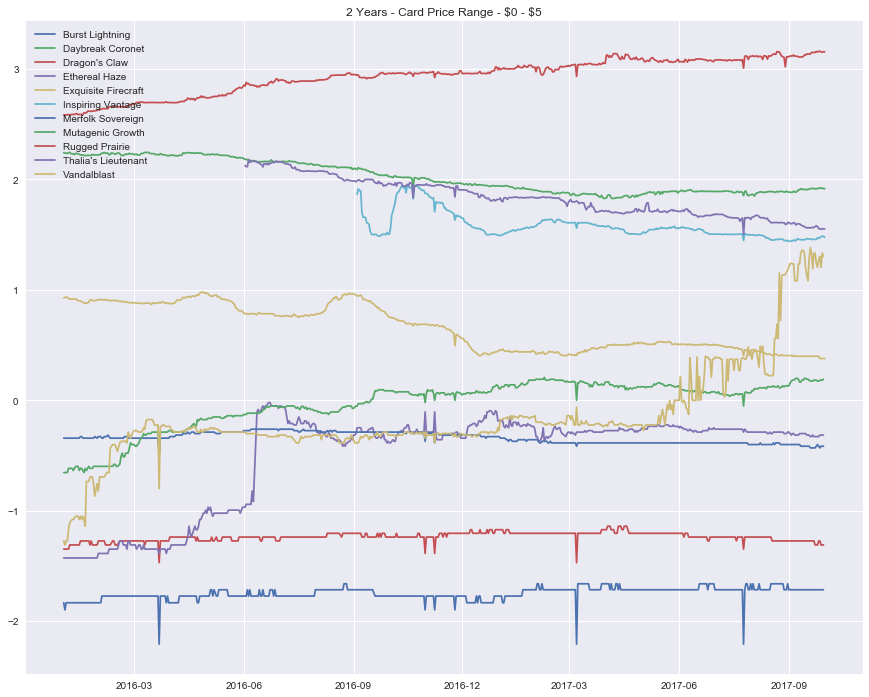

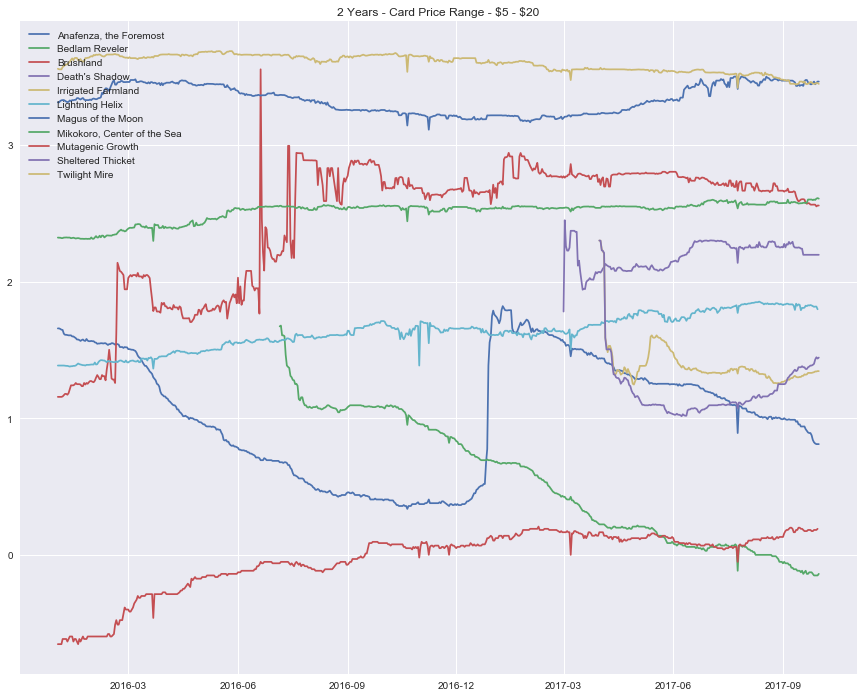

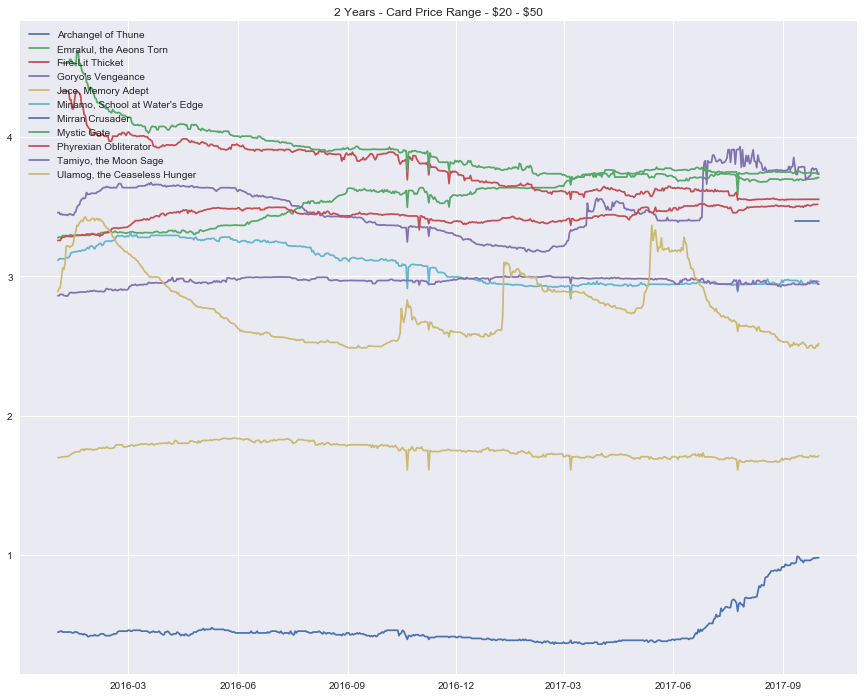

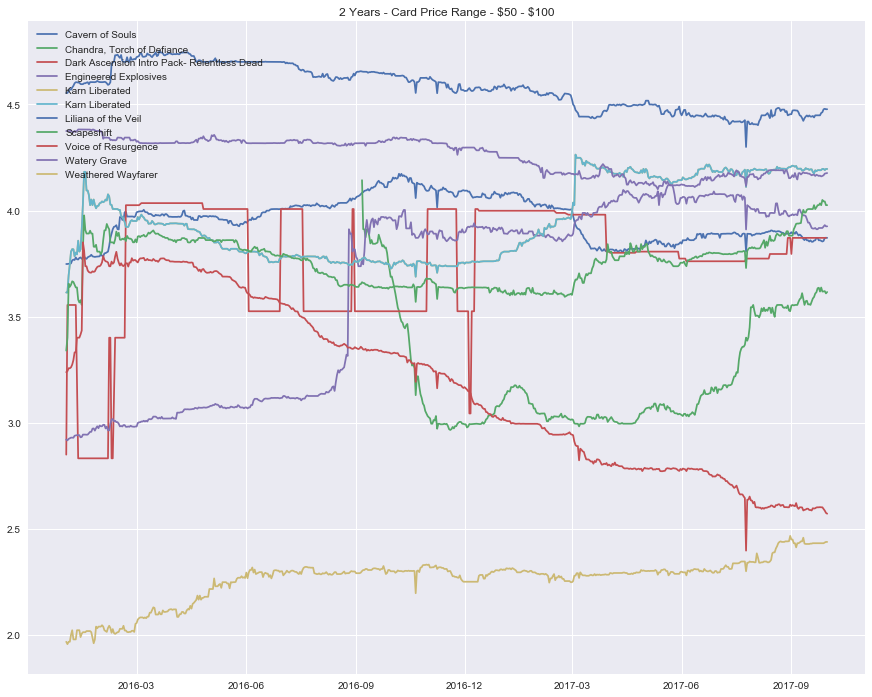

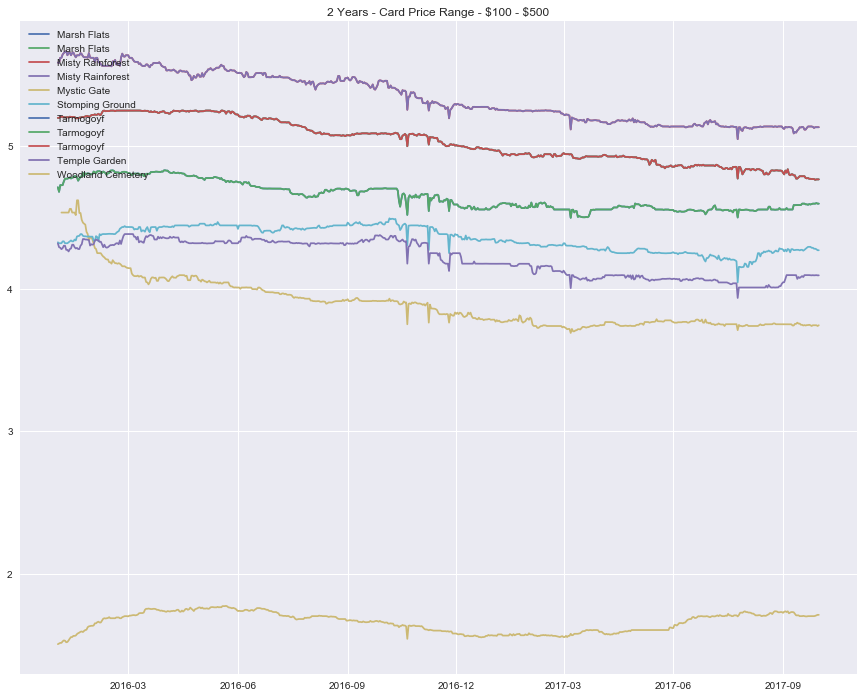

In [3179]:
####   stock price  10/6/2017
price_filter_list = [ (0,5), (5,20), (20,50), (50,100), (100,500)]


def draw_mgt_stock_charts(price_filter):
    high_value_cards = stock[ (stock.price < price_filter[1]) & (stock.price > price_filter[0]) ].card.unique()

    stock_list = sorted([random.choice(high_value_cards) for x in range(1,12)])    # take random 10 cards
    print("stock list", stock_list)

    draw_list_data = []
    plt.figure(figsize=(15,12))
    plt.title("2 Years - Card Price Range - \$" + str(price_filter[0]) + " - \$" + str(price_filter[1]))
    for stk in stock_list:
        mycard = stock[ (stock.card == stk) 
                     & (stock.date > '2016-01-01') 
                     & (stock.date < '2017-10-30') ].reset_index()

        x3 = mycard["date"]
        y3 = mycard["price"]

        plt.plot(x3,np.log(y3))

    plt.legend(stock_list, loc="upper left")

    print(stock_list)
    
for pf in price_filter_list:
    draw_mgt_stock_charts(pf)    

In [2990]:
stock.info()
# for every card select the stock list
for c in stock.card.unique():
    row_count = len(stock[ stock["card"] == c ])
    print("card: ", c, " >> ", row_count )
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152841 entries, 0 to 724
Data columns (total 5 columns):
date     1152841 non-null datetime64[ns]
price    1152841 non-null float64
file     1152841 non-null object
card     1152841 non-null object
date2    1152841 non-null object
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 92.8+ MB
card:  Abbot of Keral Keep  >>  820
card:  Abrupt Decay  >>  214
card:  Abzan Ascendancy  >>  1112
card:  Abzan Charm  >>  334
card:  Academy at Tolaria West  >>  636
card:  Academy Ruins  >>  1566
card:  Acidic Slime  >>  1340
card:  Ad Nauseam  >>  2552
card:  Adarkar Wastes  >>  2550
card:  Aether Vial  >>  1635
card:  Agent of Erebos  >>  1229
card:  Ajani Vengeant  >>  2553
card:  Ajani's Pridemate  >>  1340
card:  Akoum Battlesinger  >>  1492
card:  All Is Dust  >>  873
card:  Ally Encampment  >>  743
card:  Amulet of Vigor  >>  2553
card:  Anafenza, Kin-Tree Spirit  >>  933
card:  Anafenza, the Foremost  >>  1116
card:  Ancestral V

card:  Endless One  >>  744
card:  Engineered Explosives  >>  2553
card:  Ensnaring Bridge  >>  2554
card:  Ensoul Artifact  >>  1152
card:  Epic Experiment  >>  676
card:  Epiphany at the Drownyard  >>  481
card:  Erebos, God of the Dead  >>  1473
card:  Esper Charm  >>  1492
card:  Essence Warden  >>  1036
card:  Etched Champion  >>  874
card:  Eternal Scourge  >>  454
card:  Eternal Witness  >>  1492
card:  Ethereal Armor  >>  1492
card:  Ethereal Haze  >>  1492
card:  Ethersworn Canonist  >>  2553
card:  Evolutionary Leap  >>  820
card:  Executioner's Capsule  >>  1492
card:  Expedition Map  >>  851
card:  Experiment One  >>  675
card:  Exquisite Firecraft  >>  825
card:  Extirpate  >>  1561
card:  Eye of Ugin  >>  627
card:  Ezuri, Renegade Leader  >>  1055
card:  Fabricate  >>  1301
card:  Faerie Conclave  >>  1492
card:  Faerie Macabre  >>  441
card:  Faith's Shield  >>  1494
card:  Faithless Looting  >>  1036
card:  Falkenrath Aristocrat  >>  2063
card:  Fanatic of Mogis  >>  1

card:  Oblivion Stone  >>  1657
card:  Oboro, Palace in the Clouds  >>  2554
card:  Obstinate Baloth  >>  18
card:  Odric, Lunarch Marshal  >>  479
card:  Ojutai's Command  >>  939
card:  Olivia Voldaren  >>  2210
card:  Ondu Cleric  >>  1492
card:  Open the Armory  >>  544
card:  Oracle of Mul Daya  >>  2551
card:  Oran-Rief Survivalist  >>  1492
card:  Orbs of Warding  >>  817
card:  Ornithopter  >>  1492
card:  Orzhov Charm  >>  1492
card:  Orzhov Pontiff  >>  2554
card:  Outpost Siege  >>  52
card:  Overgrown Battlement  >>  13
card:  Overgrown Tomb  >>  734
card:  Overwhelming Denial  >>  632
card:  Pack Rat  >>  1840
card:  Pact of Negation  >>  2548
card:  Padeem, Consul of Innovation  >>  380
card:  Painful Truths  >>  744
card:  Pale Recluse  >>  1492
card:  Past in Flames  >>  336
card:  Path to Exile  >>  2492
card:  Patrician's Scorn  >>  1492
card:  Peek  >>  1492
card:  Peer Through Depths  >>  1492
card:  Pendelhaven  >>  842
card:  Pentad Prism  >>  1492
card:  Pestermi

card:  Tamiyo, the Moon Sage  >>  1975
card:  Tarfire  >>  440
card:  Tarmogoyf  >>  2554
card:  Tasigur, the Golden Fang  >>  995
card:  Tectonic Edge  >>  1037
card:  Teferi, Mage of Zhalfir  >>  14
card:  Temple Garden  >>  734
card:  Temple of Deceit  >>  1474
card:  Temple of Enlightenment  >>  1346
card:  Temple of Malice  >>  1343
card:  Temple of Silence  >>  1474
card:  Temple of Triumph  >>  1474
card:  Temur Battle Rage  >>  967
card:  Tendo Ice Bridge  >>  2550
card:  Terminate  >>  1492
card:  Thalia's Lieutenant  >>  482
card:  Thalia, Guardian of Thraben  >>  2075
card:  Thassa, God of the Sea  >>  1476
card:  The Gitrog Monster  >>  481
card:  The Rack  >>  2532
card:  Thing in the Ice  >>  482
card:  Think Twice  >>  1494
card:  Thirst for Knowledge  >>  2488
card:  Thopter Foundry  >>  1492
card:  Thought Scour  >>  1269
card:  Thought-Knot Seer  >>  630
card:  Thoughtcast  >>  2493
card:  Thoughtseize  >>  18
card:  Thraben Inspector  >>  561
card:  Thragtusk  >>  11

In [2681]:
#myx = np.linspace(0,1,1)
#plt.scatter(myx,y_train,alpha=0.1)   


In [2700]:
#df3.iloc[:30:, [0,-62,-61,-60, -59, -58, -57, -56]]

wins2.iloc[:10, [0,1,] + list(range(0,50))[-10:]]    #look at first 2 & last winning columns
#wins2.shape

event_date2                 card                    deck  w170328  w170402  \
0            Abbot of Keral Keep      Death's Shadow Zoo      0.0      0.0   
1                   Abrupt Decay  4 Color Death's Shadow     16.0      0.0   
2                   Abrupt Decay           5c Good Stuff      0.0      0.0   
3                   Abrupt Decay                   Abzan      0.0      0.0   
4                   Abrupt Decay           Abzan Company     16.0      0.0   
5                   Abrupt Decay         Abzan Evolution      0.0      0.0   
6                   Abrupt Decay          Abzan Midrange      0.0      0.0   
7                   Abrupt Decay          Abzan midrange      0.0      0.0   
8                   Abrupt Decay                  Abzxan      0.0      0.0   
9                   Abrupt Decay        Creature Toolbox      0.0      0.0   

event_date2  w170409  w170429  w170521  w170528  w170813  w170904  w170912  \
0                0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1                0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2                0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3                0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4                0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5                0.0      0.0      0.0      0.0      0.0      0.0      0.0   
6                0.0      0.0      0.0      0.0      0.0      0.0      0.0   
7                0.0      0.0      0.0      0.0      0.0      0.0      0.0   
8                0.0      0.0      0.0      0.0      0.0      0.0      0.0   
9                0.0      0.0      0.0      0.0      0.0      0.0      0.0   

event_date2  w170916  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
5                0.0  
6                0.0  
7                0.0  
8                0.0  
9                0.0

In [2711]:
# mike 10/5/2017
df3.reset_index()
df3.iloc[:5, [0,1,] + list(range(0,50))[-10:]]


date2                 card  p160101  p160209  p160210  p160211  p160212  \
0      Abbot of Keral Keep     5.83     8.44     8.49     8.52     8.52   
4            Academy Ruins    16.74    17.12    17.56    18.13    18.20   
7               Ad Nauseam     3.49    10.00     9.99     9.79     9.89   
8           Adarkar Wastes     4.74     5.32     5.44     5.44     5.94   
11          Ajani Vengeant    10.14    10.38    10.49    10.79    10.79   

date2  p160213  p160214  p160215  p160216  p160217  p160218  
0         8.61     8.50     8.61     8.67     8.74     8.84  
4        17.90    17.20    17.60    17.99    18.54    18.35  
7         9.83     9.50     9.50     9.50     9.50     9.62  
8         6.85     5.92     5.92     6.44     5.92     6.82  
11       10.78    10.80    10.87    10.88    10.99    11.08

In [3057]:
df3.info

<bound method DataFrame.info of date2                          card  p160101  p160102  p160103  p160104  \
0               Abbot of Keral Keep     5.83     5.81     5.82     5.76   
4                     Academy Ruins    16.74    16.67    16.67    17.14   
7                        Ad Nauseam     3.49     3.50     3.53     3.59   
8                    Adarkar Wastes     4.74     4.74     4.75     4.75   
11                   Ajani Vengeant    10.14    10.09    10.05    10.09   
14                      All Is Dust     5.83     5.99     6.95     7.17   
16                  Amulet of Vigor     7.22     7.21     7.21     7.22   
17        Anafenza, Kin-Tree Spirit     0.61     0.61     0.61     0.60   
18           Anafenza, the Foremost     5.29     5.25     5.25     5.23   
19                 Ancestral Vision     7.32     7.29     7.32     7.29   
24                    Angel's Grace     3.83     3.83     3.85     3.84   
31                 Arcbound Ravager    48.44    48.44    48.86    49

In [2746]:
# merge df3 (stock price) to wins2 (event wins)

# contains event & price data
stock11 = pd.merge( left=wins2, 
                   right=df3,  
                   how='inner', 
                   left_on=['card'], 
                   right_on = ['card']).reset_index()

#len(stock11[(stock11.p170922.isnull())])

#stock11.iloc[:50, list(range(686))[:8] + list(range(686))[-5:]]

#stock11.iloc[:50, [1,2,3,4] + list(range(686))[-2:]]


# expand deck & card
expand11 = pd.get_dummies(data=stock11, columns=['card','deck'])
expand11.shape


(2380, 1102)

<style>
  td { font-size: .9em; color: red }
</style>

<table border=1>
<tr>
    <td colspan="2">1 Month</td>
    <td colspan="2">2 Month</td>
    <td colspan="2">3 Month</td>
    <td colspan="2">4 Month</td>
    <td>&nbsp;</td>
    </tr>
    
<tr><td>MSE</td>
    <td>Variance</td>
    <td>MSE</td>
    <td>Variance</td>
    <td>MSE</td>
    <td>Variance</td>
    <td>MSE</td>
    <td>Variance</td>
    <td>&nbsp;</td>
</tr>

<!-- 1 variable: Price -->
<tr>
    <td>0.27562</td>
    <td>0.99987</td>

    <td>1.01982</td>
    <td>0.99949</td>

    <td>1.71529</td>
    <td>0.99918</td>

    <td>2.41036</td>
    <td>0.99883</td>
 
    <td>Price</td>
</tr>


<!-- 2 variable: Price + Event -->
<tr>
    <td>0.27470</td>
    <td>0.99987</td>
 
    <td>1.01743</td>
    <td>0.99949</td>

    <td>1.72676</td>
    <td>0.99917</td>

    <td>2.42068</td>
    <td>0.99883</td>

    <td>Price + Event</td>
</tr>


<!-- 2 variable: Price + Card -->
<tr>
    <td>0.00514</td>
    <td>1.00000</td>

    <td>0.02380</td>
    <td>0.99999</td>

    <td>0.07433</td>
    <td>0.99996</td>

    <td>0.12682</td>
    <td>0.99994</td>

    <td>Price + Card</td>
</tr>

<!-- 2 variable: Price + Deck -->
<tr>
    <td>0.28684</td>
    <td>0.99987</td>

    <td>1.04402</td>
    <td>0.99948</td>

    <td>1.82718</td>
    <td>0.99912</td>

    <td>2.54955</td>
    <td>0.99877</td>
    <td>Price + Deck</td>
</tr>



<!-- 4 variable -->
<tr>
    
    <td>0.00522</td>
    <td>1.00000</td>

<td>0.02424</td>
<td>0.99999</td>

<td>0.07524</td>
<td>0.99996</td>

<td>0.12808</td>
<td>0.99994</td>

<td>price + events <br>+ decks + card</td>

</tr>
</table>


mse 0.02294
r2 0.98912

In [3103]:
expand12 = expand11[ ( expand11["p170401"] > 50 ) & (expand11["p170401"] < 100 )]
expand12.reset_index().head()




level_0  index  w160102  w160131  w160207  w160221  w160222  w160306  \
0      347    347      0.0      0.0     17.0     19.0      0.0     17.0   
1      348    348      0.0      0.0      0.0      0.0      0.0      0.0   
2      349    349      0.0      0.0      0.0      0.0      0.0      0.0   
3      350    350      0.0      0.0      0.0      0.0      0.0      0.0   
4      351    351      0.0      0.0      0.0      0.0      0.0      0.0   

   w160313  w160320          ...           deck_Valakut Breach  \
0     17.0      0.0          ...                             0   
1      0.0      0.0          ...                             0   
2      0.0      0.0          ...                             0   
3      0.0      0.0          ...                             0   
4      0.0      0.0          ...                             0   

   deck_Vialess Taxes  deck_W/B Hatebear  deck_W/U Death and Taxes  \
0                   0                  0                         0   
1                   0                  0                         0   
2                   0                  0                         0   
3                   0                  0                         0   
4                   0                  0                         0   

   deck_WR Control  deck_Wr Nahiri  deck_Zombi Infestation  deck_Zombies !  \
0                0               0                       0               0   
1                0               0                       0               0   
2                0               0                       0               0   
3                0               0                       0               0   
4                0               0                       0               0   

   deck_Zoo  deck_Zoo Bushwhacker  
0         0                     0  
1         0                     0  
2         0                     0  
3         0                     0  
4         0                     0  

[5 rows x 1103 columns]

In [3174]:
x_price_cols  = expand11.loc[:1, "p160501":"p170630" ].columns
x_price_cols[300:300+15]

Index(['p170301', 'p170302', 'p170303', 'p170304', 'p170305', 'p170306',
       'p170307', 'p170308', 'p170309', 'p170310', 'p170311', 'p170312',
       'p170313', 'p170314', 'p170315'],
      dtype='object')

In [3208]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

# 10/5/2017 mike  (----------------------CHECK POINT HERE-----------------------)
#expand11.iloc[500:500+10, [1,2,3,4] + list(range(1102))[-300:-290]]

#kk = expand11[(expand11['card_Lord of Atlantis'] > 0)]
#kk.iloc[:, [1,2,3] + list(range(1102))[-500:-500+10]]
#expand11.loc[:50, "deck_Valakut Breach":"deck_WR Control" ]

# ======================================================================
# ======================================================================
#decide which  X columns to use for modeling
#decide which  Y column to use for modeling
#MY_REGRESSION_TRAIN_FIT(x,y)
# ======================================================================
# ======================================================================

#   look at stock & event data from -90 days to -30 days (2 months) ==> predict the price today 
#   look at stock & event data from last 360 days (2 months)  ==> predict the stock price in 30 days


def run_fit( mydf ):
    
    #x_price_cols  = mydf.loc[:1, "p170401":"p170531" ].columns  # works
    #x_price_cols  = mydf.loc[:1, ["p170401","p170415","p170501","p170515"] ].columns   # try 2 price point only

    # try prices from month 1st since 5/1/2016 for 1 year
    x_price_cols  = mydf.loc[:1, ["p160501", "p160701", "p170415","p160811", "p161201", "p170301", "p170501","p170630"] ].columns   
    
    #x_events_cols = mydf.loc[:1, "w170402":"w170528" ].columns   #works

    #x_price_cols  = mydf.loc[:1, "p160501":"p160630" ].columns
    #x_events_cols = mydf.loc[:1, "w170402":"w170528" ].columns   

    #x_card_cols  = mydf.loc[:1, "card_Abbot of Keral Keep" : "card_Worldspine Wurm"].columns
    #x_deck_cols  = mydf.loc[:1, "deck_4 Color Death's Shadow" : "deck_Zoo Bushwhacker"].columns

    x_cols = (
             list(x_price_cols) 
             + list(x_events_cols)
#             + list(x_card_cols)
#              list(x_deck_cols)
             )

    y_cols = "p170701"   # 1 month out
    y_cols = "p170801"   # 2 month out
    y_cols = "p170901"   # 3 month out
    y_cols = "p171001"  # 4 months out

    y_cols_list = ["p170701", "p170801", "p170901", "p171001"]

    #mydf.loc[:5, list(x_price_cols)[-5:] + list(x_deck_cols)[-5:]  ].head()

    #mydf.loc[:10,  "p170601"].reset_index()   #works

    #mydf["p170601"].reset_index().head()

    #mydf.loc[:10, "card_Abbot of Keral Keep":  ]   #works
    #mydf.loc[:10, "card_Abbot of Keral Keep":"deck_Zoo Bushwhacker"  ]   #works

    #idx = 1030
    #list(zip(range(len(mydf.columns)), mydf.columns))[idx:idx+200]


    for yc in y_cols_list:
        # using linear regression
        mse, r2, coef, intercept = MY_REGRESSION_TRAIN_FIT( mydf.loc[:, x_cols], mydf.loc[:, yc])
        
        # using LASSO
        alpha = 0.01
        #mse, r2, coef, intercept = MY_LASSO_TRAIN_FIT( mydf.loc[:, x_cols], mydf.loc[:, yc], alpha)
        print("\n" + yc + " ===========")
        print("mse %.5f" % mse, " >>>>  r2 %.5f" % r2)
        #pp.pprint(coef)


print("===============================  expand11 (full price list) =============================== ")
run_fit(expand11)        
print("===============================  expand12 (filtered pricing list) =============================== ")
run_fit(expand12)

===============================  expand11 (full price list) =============================== 

p170701 ===========
mse 0.61049  >>>>  r2 0.71040

p170801 ===========
mse 0.61865  >>>>  r2 0.70419

p170901 ===========
mse 0.63949  >>>>  r2 0.70146

p171001 ===========
mse 0.65528  >>>>  r2 0.69751
===============================  expand12 (filtered pricing list) =============================== 

p170701 ===========
mse 0.00012  >>>>  r2 0.99485

p170801 ===========
mse 0.00038  >>>>  r2 0.98737

p170901 ===========
mse 0.00126  >>>>  r2 0.96693

p171001 ===========
mse 0.00042  >>>>  r2 0.98982


In [2975]:
expand11.loc[:, y_cols].reset_index().head()

index  p171001
0      0     0.99
1      1    20.83
2      2    20.83
3      3    20.83
4      4    20.83

In [2957]:
num = 49.233335
x = "%.5f" % num 
x

'49.23333'

In [2826]:
expand11.shape
#stock.head()
#stock10.info()

(2380, 1102)

In [2503]:
stock10.iloc[:,-10:].tail(20)



n  rank                  deck  cmc power toughness      manaCost  \
1154308  1.0   3.5            Titanshift    2     0         0        {1}{G}   
1155860  1.0   6.5            Scapeshift    3     0         0     {1}{U}{U}   
1156114  1.0  12.5           Gifts Storm    3     0         0     {1}{U}{U}   
1156175  1.0    10              UR Storm    3     0         0     {1}{U}{U}   
1156286  2.0   6.5              UR Storm    3     0         0     {1}{U}{U}   
1158128  3.0  12.5               Valakut    4     0         0           {4}   
1158176  1.0   3.5       Lantern Control    4     0         0           {4}   
1158440  2.0   6.5               Valakut    4     0         0           {4}   
1160179  1.0     3                  Jund    0     0         0            NA   
1160191  1.0   6.5     Abzan Aristocrats    0     0         0            NA   
1160325  1.0   3.5        Abzan Midrange    0     0         0            NA   
1160338  1.0   6.5       Sultai Midrange    0     0         0            NA   
1160489  1.0   6.5  Unburial Rites Value    0     0         0            NA   
1161953  4.0   6.5    Instant Reanimator   11    15        15  {8}{G}{G}{G}   
1162092  4.0   3.5    Instant Reanimator   11    15        15  {8}{G}{G}{G}   
1162160  4.0   6.5     Goryo's Vengeance   11    15        15  {8}{G}{G}{G}   
1162222  4.0     2    Instant Reanimator   11    15        15  {8}{G}{G}{G}   
1162286  4.0   3.5    Instant Reanimator   11    15        15  {8}{G}{G}{G}   
1162325  4.0   6.5         Grishoalbrand   11    15        15  {8}{G}{G}{G}   
1162760  4.0   6.5     Abzan Aristocrats    2     1         1        {1}{B}   

        colors     types          subtypes  
1154308  Green   Instant                NA  
1155860   Blue   Instant                NA  
1156114   Blue   Instant                NA  
1156175   Blue   Instant                NA  
1156286   Blue   Instant                NA  
1158128     NA  Artifact                NA  
1158176     NA  Artifact                NA  
1158440     NA  Artifact                NA  
1160179     NA      Land                NA  
1160191     NA      Land                NA  
1160325     NA      Land                NA  
1160338     NA      Land                NA  
1160489     NA      Land                NA  
1161953  Green  Creature              Wurm  
1162092  Green  Creature              Wurm  
1162160  Green  Creature              Wurm  
1162222  Green  Creature              Wurm  
1162286  Green  Creature              Wurm  
1162325  Green  Creature              Wurm  
1162760  Black  Creature  Human-Rogue-Ally

In [2483]:
#del stock9["cmc"]
#del stock9["power"]
#del stock9["toughness"]
#del stock9["manaCost"]
#"power", "toughness", "manaCost"]]
mtg['Abrupt Decay']
stock9.columns

Index(['date', 'price', 'file', 'card', 'n', 'rank', 'deck'], dtype='object')

In [2504]:
#stock9[(stock9['cmc'].isnull())]

stock10[(stock10['card'] == 'Abrupt Decay')].tail(15)

#stock10.head()
#mtg['Frankie Peanuts']
#mtg["Abbot of Keral Keep"]
#stock9.cmc.value_counts()

/Users/michaellin/anaconda/lib/python3.6/site-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


date  price                    file          card    n  rank  \
935  2017-05-28   4.54  Abrupt Decay [MM3].csv  Abrupt Decay  1.0     6   
1012 2017-08-13   4.51  Abrupt Decay [MM3].csv  Abrupt Decay  4.0  12.5   
1013 2017-08-13   4.51  Abrupt Decay [MM3].csv  Abrupt Decay  2.0  12.5   
1014 2017-08-13   4.51  Abrupt Decay [MM3].csv  Abrupt Decay  2.0   6.5   
1015 2017-08-13   4.51  Abrupt Decay [MM3].csv  Abrupt Decay  2.0   3.5   
1016 2017-08-13   4.51  Abrupt Decay [MM3].csv  Abrupt Decay  3.0     2   
1017 2017-08-13   4.51  Abrupt Decay [MM3].csv  Abrupt Decay  1.0  12.5   
1039 2017-09-04   4.49  Abrupt Decay [MM3].csv  Abrupt Decay  1.0     1   
1040 2017-09-04   4.49  Abrupt Decay [MM3].csv  Abrupt Decay  2.0   6.5   
1048 2017-09-12   4.44  Abrupt Decay [MM3].csv  Abrupt Decay  2.0   6.5   
1049 2017-09-12   4.44  Abrupt Decay [MM3].csv  Abrupt Decay  2.0   6.5   
1050 2017-09-12   4.44  Abrupt Decay [MM3].csv  Abrupt Decay  2.0     1   
1054 2017-09-16   4.44  Abrupt Decay [MM3].csv  Abrupt Decay  1.0   3.5   
1055 2017-09-16   4.44  Abrupt Decay [MM3].csv  Abrupt Decay  1.0   6.5   
1056 2017-09-16   4.44  Abrupt Decay [MM3].csv  Abrupt Decay  2.0     8   

                     deck  cmc power toughness manaCost       colors    types  \
935        Death's Shadow    2     0         0   {B}{G}  Black-Green  Instant   
1012               Dredge    2     0         0   {B}{G}  Black-Green  Instant   
1013               Dredge    2     0         0   {B}{G}  Black-Green  Instant   
1014      Lantern Control    2     0         0   {B}{G}  Black-Green  Instant   
1015                 Junk    2     0         0   {B}{G}  Black-Green  Instant   
1016             The Rock    2     0         0   {B}{G}  Black-Green  Instant   
1017                 Junk    2     0         0   {B}{G}  Black-Green  Instant   
1039               Dredge    2     0         0   {B}{G}  Black-Green  Instant   
1040                 Junk    2     0         0   {B}{G}  Black-Green  Instant   
1048                 Junk    2     0         0   {B}{G}  Black-Green  Instant   
1049                 Junk    2     0         0   {B}{G}  Black-Green  Instant   
1050                 Junk    2     0         0   {B}{G}  Black-Green  Instant   
1054                 Jund    2     0         0   {B}{G}  Black-Green  Instant   
1055       Death's Shadow    2     0         0   {B}{G}  Black-Green  Instant   
1056  Jund Death's Shadow    2     0         0   {B}{G}  Black-Green  Instant   

     subtypes  
935        NA  
1012       NA  
1013       NA  
1014       NA  
1015       NA  
1016       NA  
1017       NA  
1039       NA  
1040       NA  
1048       NA  
1049       NA  
1050       NA  
1054       NA  
1055       NA  
1056       NA

In [2159]:
#stock9.head(20)

expand1 = pd.get_dummies(data=stock9, columns=['deck'])
expand1[(expand1['deck_Vialess Taxes']) > 0]

date  price                                   file  \
10975   2017-02-19   9.95               Adarkar Wastes [10E].csv   
147245  2017-02-19  64.30          Chalice of the Void [MMA].csv   
261913  2017-02-19   1.02                   Disenchant [2ED].csv   
289323  2017-02-19   4.96            Eldrazi Displacer [OGW].csv   
292235  2017-02-19   7.33               Eldrazi Temple [DDP].csv   
613512  2017-02-19  10.29                    Mutavault [M14].csv   
644791  2017-02-19   0.32                Oblivion Ring [ALA].csv   
677634  2017-02-19  12.06                Path to Exile [ARC].csv   
706262  2017-02-19   3.20               Pithing Needle [10E].csv   
768581  2017-02-19   5.31                Rest in Peace [RTR].csv   
770599  2017-02-19   7.12            Restoration Angel [AVR].csv   
836847  2017-02-19   6.49              Selfless Spirit [EMN].csv   
851410  2017-02-19   0.90                Shining Shoal [BOK].csv   
851411  2017-02-19   0.90                Shining Shoal [BOK].csv   
946216  2017-02-19   7.99                Stony Silence [ISD].csv   
1012358 2017-02-19   8.08  Thalia, Guardian of Thraben [DKA].csv   
1024807 2017-02-19   6.58            Thought-Knot Seer [OGW].csv   
1133203 2017-02-19   2.80                Wall of Omens [CMD].csv   

                                card    n rank  deck_4 Color Death's Shadow  \
10975                 Adarkar Wastes  2.0  6.5                            0   
147245           Chalice of the Void  3.0  6.5                            0   
261913                    Disenchant  1.0  6.5                            0   
289323             Eldrazi Displacer  2.0  6.5                            0   
292235                Eldrazi Temple  3.0  6.5                            0   
613512                     Mutavault  4.0  6.5                            0   
644791                 Oblivion Ring  1.0  6.5                            0   
677634                 Path to Exile  4.0  6.5                            0   
706262                Pithing Needle  1.0  6.5                            0   
768581                 Rest in Peace  3.0  6.5                            0   
770599             Restoration Angel  4.0  6.5                            0   
836847               Selfless Spirit  3.0  6.5                            0   
851410                 Shining Shoal  2.0  6.5                            0   
851411                 Shining Shoal  2.0  6.5                            0   
946216                 Stony Silence  2.0  6.5                            0   
1012358  Thalia, Guardian of Thraben  4.0  6.5                            0   
1024807            Thought-Knot Seer  3.0  6.5                            0   
1133203                Wall of Omens  3.0  6.5                            0   

         deck_4c Nahiri Coralhelm  deck_5c Good Stuff  deck_8 Rack  \
10975                           0                   0            0   
147245                          0                   0            0   
261913                          0                   0            0   
289323                          0                   0            0   
292235                          0                   0            0   
613512                          0                   0            0   
644791                          0                   0            0   
677634                          0                   0            0   
706262                          0                   0            0   
768581                          0                   0            0   
770599                          0                   0            0   
836847                          0                   0            0   
851410                          0                   0            0   
851411                          0                   0            0   
946216                          0                   0            0   
1012358                         0                   0            0   
1024807                      

# join stock(date,card) to event_wins2(event_date,card)


stock8 = pd.merge( left=stock, 
                   right=event_wins2,  
                   how='outer', 
                   left_on=['date','card'], 
                   right_on = ['event_date','card'])

stock8.deck.fillna(0, inplace=True)
del stock8['event_date']
stock8.dropna(subset=['date'], how='all', inplace = True)   #drop null dates

stock8.head()

In [2616]:
e2_lambda = lambda x: ("w" + str(x.year)[-2:] + ("0" + str(x.month))[-2:] + ("0" + str(x.day))[-2:])

card_event_wins["rank_adj"]  = card_event_wins.apply(lambda x: x['n'] * (20 - int(x['rank'])), axis=1)

card_event_wins["event_date2"]  = card_event_wins.event_date.map(e2_lambda)

card_event_wins[(card_event_wins.event_date>'2017-07-31')].head()

n                card  rank    deck event_date  rank_adj event_date2
25169  1  Blackcleave Cliffs  12.5  Dredge 2017-08-13         8     w170813
25170  1         Blood Crypt  12.5  Dredge 2017-08-13         8     w170813
25171  3   Bloodstained Mire  12.5  Dredge 2017-08-13        24     w170813
25172  4    Copperline Gorge  12.5  Dredge 2017-08-13        32     w170813
25173  2      Dakmor Salvage  12.5  Dredge 2017-08-13        16     w170813

In [3155]:
len(card_event_wins.deck.unique())

168

In [2677]:
# do a crosstab on event data  10/5/2017

wins2 = pd.crosstab(index=[card_event_wins.card, card_event_wins.deck], 
                columns=[card_event_wins.event_date2], 
                values=card_event_wins.rank_adj, aggfunc='max').reset_index()

wins2 = z.fillna(0)

wins2[(wins2.w170813 > 0)].head(15)

event_date2               card             deck  w160102  w160131  w160207  \
13                Abrupt Decay           Dredge      0.0      0.0      0.0   
20                Abrupt Decay             Junk      0.0      0.0      0.0   
21                Abrupt Decay  Lantern Control      0.0      0.0      0.0   
25                Abrupt Decay         The Rock      0.0      0.0      0.0   
32               Academy Ruins  Lantern Control      0.0      0.0      0.0   
39                  Ad Nauseam       Ad Nauseam      0.0      0.0      0.0   
61                 All Is Dust       Eldra Tron      0.0      0.0      0.0   
106             Ancient Grudge           Dredge      0.0      0.0      0.0   
130             Ancient Grudge          Valakut      0.0      0.0      0.0   
145          Ancient Stirrings  Lantern Control      0.0      0.0      0.0   
150              Angel's Grace       Ad Nauseam      0.0      0.0      0.0   
158          Anger of the Gods   Death's Shadow      0.0      0.0      0.0   
203          Anger of the Gods          Valakut      0.0      0.0      0.0   
243                  Arid Mesa       Boros Burn      0.0      0.0      0.0   
299           Avacyn's Pilgrim  Coralhelm Human      0.0      0.0      0.0   

event_date2  w160221  w160222  w160306  w160313  w160320   ...     w170328  \
13               0.0      0.0      0.0      0.0      0.0   ...         0.0   
20               0.0      0.0      0.0      0.0     28.0   ...         0.0   
21               0.0      0.0      0.0      0.0     34.0   ...         0.0   
25               0.0     14.0      0.0      0.0      0.0   ...         0.0   
32               0.0      0.0      0.0      0.0     34.0   ...         0.0   
39               0.0      0.0      0.0     56.0      0.0   ...         0.0   
61               0.0      0.0      0.0      0.0      0.0   ...         0.0   
106              0.0      0.0      0.0      0.0      0.0   ...        18.0   
130              0.0      0.0      0.0      0.0      0.0   ...         0.0   
145              0.0      0.0      0.0      0.0     68.0   ...         0.0   
150              0.0      0.0      0.0     56.0      0.0   ...         0.0   
158              0.0      0.0      0.0      0.0      0.0   ...         0.0   
203            -12.0      0.0      0.0     34.0      0.0   ...         0.0   
243              0.0      0.0      0.0      0.0      0.0   ...         0.0   
299              0.0      0.0      0.0      0.0      0.0   ...         0.0   

event_date2  w170402  w170409  w170429  w170521  w170528  w170813  w170904  \
13               0.0      0.0      0.0      0.0      0.0     32.0     19.0   
20              14.0      0.0      0.0      0.0      0.0     34.0     28.0   
21               0.0      0.0     28.0      0.0      0.0     28.0      0.0   
25               0.0      0.0      0.0      0.0      0.0     54.0      0.0   
32               0.0      0.0     28.0      0.0      0.0     28.0      0.0   
39               0.0      0.0      0.0      0.0      0.0     32.0      0.0   
61              36.0      0.0     14.0     19.0     30.0     16.0     36.0   
106              0.0      0.0     34.0      0.0     18.0     24.0     38.0   
130              0.0     14.0      9.0      0.0      0.0     14.0      0.0   
145              0.0      0.0     56.0      0.0      0.0     56.0      0.0   
150              0.0      0.0      0.0      0.0      0.0     32.0      0.0   
158             16.0      0.0     22.0      0.0     16.0     16.0     14.0   
203             28.0     57.0     18.0      0.0     26.0     14.0      0.0   
243              0.0      0.0      0.0      0.0      0.0     76.0      0.0   
299              0.0      0.0      0.0      0.0      0.0     56.0      0.0   

event_date2  w170912  w170916  
13               0.0      0.0  
20              38.0      0.0  
21               0.0      0.0  
25               0.0      0.0  
32               0.0      0.0  
39               0.0      0.0  
61               0.0     26.0

In [2512]:
stock10.columns

Index(['date', 'price', 'file', 'card', 'n', 'rank', 'deck', 'cmc', 'power',
       'toughness', 'manaCost', 'colors', 'types', 'subtypes'],
      dtype='object')

In [2537]:

(stock10['rank']).value_counts()

6.5     5859
3.5     3017
12.5    2326
1       1810
2       1720
24.5     667
5        328
3        312
4        306
7        304
6        298
8        295
15        85
13        73
14        72
10        65
12        64
16        64
9         63
11        61
Name: rank, dtype: int64

In [2553]:
#del stock10['file']
stock10[(stock10.date >= '2017-08-01')].reset_index().tail(20)

index       date  price                 card    n  rank  \
1218  1140341 2017-09-04   0.38         Warping Wail  2.0   6.5   
1219  1140353 2017-09-16   0.38         Warping Wail  2.0     7   
1220  1141429 2017-09-16   0.41  Wasteland Strangler  1.0   6.5   
1221  1141430 2017-09-16   0.41  Wasteland Strangler  1.0   6.5   
1222  1142166 2017-08-13  65.99         Watery Grave  2.0   6.5   
1223  1142167 2017-08-13  65.99         Watery Grave  2.0  12.5   
1224  1142168 2017-08-13  65.99         Watery Grave  2.0  12.5   
1225  1142169 2017-08-13  65.99         Watery Grave  2.0  12.5   
1226  1142191 2017-09-04  65.14         Watery Grave  2.0   6.5   
1227  1142199 2017-09-12  65.14         Watery Grave  2.0   6.5   
1228  1142200 2017-09-12  65.14         Watery Grave  2.0   3.5   
1229  1142204 2017-09-16  64.97         Watery Grave  2.0   6.5   
1230  1142205 2017-09-16  64.97         Watery Grave  1.0   6.5   
1231  1142206 2017-09-16  64.97         Watery Grave  2.0     4   
1232  1142207 2017-09-16  64.97         Watery Grave  2.0     2   
1233  1146245 2017-09-12  11.37   Weathered Wayfarer  1.0     2   
1234  1147720 2017-08-13   0.97          Welding Jar  2.0   6.5   
1235  1151844 2017-09-16   0.28            Whipflare  2.0     1   
1236  1156286 2017-09-16   0.38            Wipe Away  2.0   6.5   
1237  1158440 2017-08-13   0.65        Witchbane Orb  2.0   6.5   

                         deck  cmc power toughness   manaCost colors  \
1218               Eldra Tron    2     0         0     {1}{C}     NA   
1219               Eldra Tron    2     0         0     {1}{C}     NA   
1220  Eldrazi Orzhov Hatebear    3     3         2     {2}{B}     NA   
1221  Eldrazi Orzhov Hatebear    3     3         2     {2}{B}     NA   
1222           Death's Shadow    0     0         0         NA     NA   
1223           Death's Shadow    0     0         0         NA     NA   
1224                  Faeries    0     0         0         NA     NA   
1225           Death's Shadow    0     0         0         NA     NA   
1226           Death's Shadow    0     0         0         NA     NA   
1227           Death's Shadow    0     0         0         NA     NA   
1228           Death's Shadow    0     0         0         NA     NA   
1229           Death's Shadow    0     0         0         NA     NA   
1230           Death's Shadow    0     0         0         NA     NA   
1231     Esper Death's Shadow    0     0         0         NA     NA   
1232     Esper Death's Shadow    0     0         0         NA     NA   
1233                 Hatebear    1     1         1        {W}  White   
1234          Lantern Control    0     0         0        {0}     NA   
1235                 Affinity    2     0         0     {1}{R}    Red   
1236                 UR Storm    3     0         0  {1}{U}{U}   Blue   
1237                  Valakut    4     0         0        {4}     NA   

         types            subtypes  
1218   Instant                  NA  
1219   Instant                  NA  
1220  Creature   Eldrazi-Processor  
1221  Creature   Eldrazi-Processor  
1222      Land        Island-Swamp  
1223      Land        Island-Swamp  
1224      Land        Island-Swamp  
1225      Land        Island-Swamp  
1226      Land        Island-Swamp  
1227      Land        Island-Swamp  
1228      Land        Island-Swamp  
1229      Land        Island-Swamp  
1230      Land        Island-Swamp  
1231      Land        Island-Swamp  
1232      Land        Island-Swamp  
1233  Creature  Human-Nomad-Cleric  
1234  Artifact                  NA  
1235   Sorcery                  NA  
1236   Instant                  NA  
1237  Artifact                  NA

In [2545]:

z = pd.crosstab(index=[stock10.card, stock10.deck, stock10.n], 
                columns=[stock10.date.dt.day], 
                values=stock10.price, aggfunc='mean').reset_index()

z = z.fillna(0)

z.head(50)

#event_wins = card_event_wins.groupby(['card','event_date']).agg({'n': np.sum, 'rank': 'count'}).reset_index()


date                 card                     deck    n      2    3      4  \
0     Abbot of Keral Keep       Death's Shadow Zoo  1.0   0.00  0.0   0.00   
1            Abrupt Decay   4 Color Death's Shadow  1.0   0.00  0.0   0.00   
2            Abrupt Decay   4 Color Death's Shadow  2.0   0.00  0.0   0.00   
3            Abrupt Decay            Abzan Company  2.0   0.00  0.0   0.00   
4            Abrupt Decay        Creatures Toolbox  1.0   0.00  0.0   0.00   
5            Abrupt Decay        Creatures Toolbox  2.0   0.00  0.0   0.00   
6            Abrupt Decay           Death's Shadow  1.0   4.61  0.0   0.00   
7            Abrupt Decay           Death's Shadow  2.0   4.61  0.0   0.00   
8            Abrupt Decay           Death's Shadow  3.0   4.61  0.0   0.00   
9            Abrupt Decay     Death's Shadow Aggro  1.0   0.00  0.0   5.00   
10           Abrupt Decay     Death's Shadow Aggro  2.0   0.00  0.0   5.00   
11           Abrupt Decay                   Dredge  1.0   0.00  0.0   4.49   
12           Abrupt Decay                   Dredge  2.0   0.00  0.0   0.00   
13           Abrupt Decay                   Dredge  4.0   0.00  0.0   0.00   
14           Abrupt Decay    Grixis Death's Shadow  1.0   0.00  0.0   0.00   
15           Abrupt Decay                     Jund  1.0   0.00  0.0   0.00   
16           Abrupt Decay                     Jund  2.0   4.61  0.0   0.00   
17           Abrupt Decay      Jund Death's Shadow  2.0   0.00  0.0   0.00   
18           Abrupt Decay                     Junk  1.0   4.61  0.0   0.00   
19           Abrupt Decay                     Junk  2.0   0.00  0.0   4.49   
20           Abrupt Decay          Lantern Control  1.0   0.00  0.0   5.00   
21           Abrupt Decay          Lantern Control  2.0   0.00  0.0   5.00   
22           Abrupt Decay                 The Rock  3.0   0.00  0.0   0.00   
23           Abrupt Decay     Unburial Rites Value  2.0   0.00  0.0   5.00   
24           Abrupt Decay                  Valakut  2.0   0.00  0.0   0.00   
25       Abzan Ascendancy        Abzan Aristocrats  1.0   0.00  0.0   0.00   
26            Abzan Charm                    Abzan  1.0   0.00  0.0   0.00   
27          Academy Ruins             Gift Control  2.0   0.00  0.0   0.00   
28          Academy Ruins          Lantern Control  1.0   0.00  0.0   0.00   
29          Academy Ruins          Lantern Control  2.0  22.19  0.0  21.61   
30          Academy Ruins           Tezzet Thopter  1.0   0.00  0.0   0.00   
31          Academy Ruins            Thopter Gifts  2.0   0.00  0.0   0.00   
32          Academy Ruins               UW Control  1.0   0.00  0.0   0.00   
33          Academy Ruins        UWR Thopter Sword  1.0   0.00  0.0   0.00   
34          Academy Ruins                 UrzaTron  1.0   0.00  0.0   0.00   
35           Acidic Slime               Titanshift  2.0   0.00  0.0   0.22   
36             Ad Nauseam               Ad Nauseam  4.0   6.29  0.0   0.00   
37             Ad Nauseam               Ad Nauseum  4.0   0.00  0.0   0.00   
38         Adarkar Wastes               Ad Nauseam  1.0   0.00  0.0   0.00   
39         Adarkar Wastes            Eldrazi Aggro  4.0   0.00  0.0   0.00   
40         Adarkar Wastes          Patriot Eldrazi  2.0   0.00  0.0   0.00   
41         Adarkar Wastes            Vialess Taxes  2.0   0.00  0.0   0.00   
42         Adarkar Wastes      W/U Death and Taxes  4.0   0.00  0.0   0.00   
43            Aether Vial         Bw Eldrazi Taxes  4.0   0.00  0.0   0.00   
44            Aether Vial  Eldrazi Orzhov Hatebear  4.0   0.00  0.0   0.00   
45            Aether Vial                 Hatebear  4.0   0.00  0.0   0.00   
46            Aether Vial                  Merfolk  4.0   0.00  0.0   0.00   
47        Agent of Erebos            Abzan Company  1.0   0.00  0.0   0.00   
48         Ajani Vengeant           Jeskai Control  1.0   0.00  0.0   0.00   
49         Ajani Vengeant            Jeskai Nahiri  1.0   0.00  0.0   0.00   

date      6    7     

In [1875]:
def map_cmc(card_name):
    try:
        return mtg[card_name]['cmc']
    except:
        return 0


def generate_stock_df(stock):
    
    # filter stock data (TODO: pass date as parameters)
    df = stock[ (stock.date >= '2017-08-01') 
              & (stock.date <= '2017-08-30')  ].reset_index()

    # pivot data so price dates are on the columns
    z = pd.crosstab(index=df.file, 
                    columns=df.date, 
                    values=df.price, aggfunc='max').reset_index()
    
    z['card'] = z.file.map(  lambda s:  s.split('[', 1)[0].strip()  )
    z['cmc']  = z.card.map(  map_cmc  )
    z['wins'] = z.apply( lambda x: map_wins(x), axis=1 )
    

    z.loc[ :, ['file','card','cmc']].head(20)

    return z.dropna(axis=0, how='all')


def generate_stock_df2(stock):
    
    # filter stock data (TODO: pass date as parameters)
    df = stock[ (stock.date >= '2017-08-01') 
              & (stock.date <= '2017-08-30')  ].reset_index()

    # pivot data so price dates are on the columns
    z = pd.crosstab(index=df.file, 
                    columns=df.date, 
                    values=df.price, aggfunc='max').reset_index()

    
    
    
    z['card'] = z.file.map(  lambda s:  s.split('[', 1)[0].strip()  )
    z['cmc']  = z.card.map(  map_cmc  )
    z['wins'] = z.apply( lambda x: map_wins(x), axis=1 )
    

    z.loc[ :, ['file','card','cmc']].head(20)

    return z.dropna(axis=0, how='all')


    
#z.iloc[:50, -61:-51].dropna(axis=0, how='all').head(100) #shows subset here    

# drop all the rows with null data
#z.iloc[:50, -61:-51].dropna(axis=0, how='all').head(100) #shows subset here    
# return here ??
    
mystock = generate_stock_df(stock)

print('stock.shape >> ', mystock.shape)

#shows subset here 
#smaller_set = mystock.iloc[:, -31:]     
#smaller_set.describe()

#mystock.iloc[:,-5:]
stock.head()


stock.shape >>  (841, 34)


date  price                           file
0  2015-06-30   3.74  Abbot of Keral Keep [ORI].csv
1  2015-07-01   3.44  Abbot of Keral Keep [ORI].csv
2  2015-07-02   3.19  Abbot of Keral Keep [ORI].csv
3  2015-07-03   2.95  Abbot of Keral Keep [ORI].csv
4  2015-07-04   2.93  Abbot of Keral Keep [ORI].csv

In [1873]:
mystock.shape

(841, 34)

In [2522]:
mystock.columns

Index(['file', '2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
       '2017-08-05', '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
       '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13', '2017-08-14',
       '2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19',
       '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
       '2017-08-25', '2017-08-26', '2017-08-27', '2017-08-28', '2017-08-29',
       '2017-08-30', 'card', 'cmc', 'wins'],
      dtype='object', name='date')

In [1618]:
# create additonal columns for stocks
def map_cmc(card_name):
    try:
        return mtg[card_name]['cmc']
    except:
        return 0
    
mystock['card'] = mystock.file.map(  lambda s:  s.split('[', 1)[0].strip()  )
mystock['cmc'] = mystock.card.map(  map_cmc  )

# rename last data as label data
mystock.rename(columns={'2017-08-30': 'label'}, inplace=True)


In [1673]:
mystock.fillna(0)

date                                 file  2017-08-01  2017-08-02  2017-08-03  \
0           Abbot of Keral Keep [ORI].csv        1.15        1.15        1.14   
1                  Abrupt Decay [MM3].csv        4.65        4.65        4.64   
2              Abzan Ascendancy [KTK].csv        0.30        0.30        0.30   
3                   Abzan Charm [C16].csv        0.25        0.25        0.25   
4                 Academy Ruins [MMA].csv       22.33       22.75       22.77   
5                  Acidic Slime [C13].csv        0.22        0.22        0.22   
6                    Ad Nauseam [ALA].csv        9.36        9.37        9.37   
7                Adarkar Wastes [10E].csv        9.49        9.44        9.49   
8                   Aether Vial [DST].csv       45.64       45.68       45.68   
9               Agent of Erebos [JOU].csv        0.22        0.22        0.22   
10               Ajani Vengeant [ALA].csv       10.78       10.78       10.71   
11            Ajani's Pridemate [C13].csv        0.61        0.62        0.62   
12           Akoum Battlesinger [WWK].csv        0.16        0.16        0.16   
13                  All Is Dust [MM2].csv       20.28       20.31       19.91   
14              Ally Encampment [BFZ].csv        0.44        0.44        0.44   
15              Amulet of Vigor [WWK].csv        8.00        8.01        8.00   
16    Anafenza, Kin-Tree Spirit [DTK].csv        1.22        1.22        1.21   
17       Anafenza, the Foremost [KTK].csv        2.92        2.86        2.85   
18             Ancestral Vision [DD2].csv       51.00       51.00       51.00   
19               Ancient Grudge [ISD].csv        0.28        0.28        0.27   
20            Ancient Stirrings [ROE].csv        3.94        3.94        3.90   
21             Ancient Ziggurat [CON].csv        3.43        3.41        3.41   
22        Angel of Condemnation [HOU].csv        0.49        0.49        0.49   
23                Angel's Grace [MMA].csv        7.03        7.03        7.00   
24                   Anticipate [BFZ].csv        0.17        0.17        0.17   
25           Apostle's Blessing [MM2].csv        0.29        0.29        0.29   
26              Aquitect's Will [LRW].csv        0.30        0.31        0.31   
27               Arashin Cleric [FRF].csv        0.17        0.17        0.17   
28                    Arbor Elf [M13].csv        0.25        0.25        0.25   
29             Arcbound Ravager [DST].csv       40.48       39.50       39.50   
..                                    ...         ...         ...         ...   
811                Viscera Seer [C13].csv        1.61        1.59        1.59   
812           Visions of Beyond [M12].csv        6.25        6.24        6.25   
813           Vithian Renegades [ARB].csv        0.23        0.23        0.23   
814          Vizier of Remedies [AKH].csv        0.41        0.42        0.41   
815         Voice of Resurgence [DGM].csv       13.84       13.50       13.48   
816            Volcanic Fallout [ARC].csv        0.95        0.95        0.95   
817               Vryn Wingmare [ORI].csv        0.47        0.47        0.47   
818            Walking Ballista [AER].csv       11.84       11.85       11.84   
819               Wall of Omens [CMD].csv        2.49        2.50        2.49   
820          Wall of Resurgence [OGW].csv        0.21        0.21        0.21   
821               Wall of Roots [ARC].csv        2.67        2.64        2.60   
822          Wandering Fumarole [OGW].csv        4.99        4.99        4.99   
823              Wanderwine Hub [LRW].csv        6.09        6.07        6.04   
824                Warping Wail [OGW].csv        0.36        0.36        0.36   
825                   Waste Not [C16].csv        3.42        3.46        3.42   
826         Wasteland Strangler [BFZ].csv        0.42        0.43        0.43   
827                Watery Grave [EXP].csv       63.94       63.91       63.91   
828                   Wear Away

In [1622]:
mystock.columns

Index(['file', '2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
       '2017-08-05', '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
       '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13', '2017-08-14',
       '2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19',
       '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
       '2017-08-25', '2017-08-26', '2017-08-27', '2017-08-28', '2017-08-29',
       'label', 'card', 'cmc'],
      dtype='object', name='date')

In [1515]:
#'mike here'
zz = smaller_set[ ( smaller_set['2017-08-30'] >= 8 ) ].iloc[ :10,  -6: ]

print('here zz')

zz, len(zz.reset_index())

#smaller_set.loc[ : , ['file','card','cmc']].head(20)

here zz


(date  2017-08-27  2017-08-28  2017-08-29  2017-08-30              card  cmc
 4          22.21       22.21       21.99       22.49     Academy Ruins    0
 6           9.00        8.99        8.99        8.99        Ad Nauseam    5
 7           9.24        9.23        9.13        9.19    Adarkar Wastes    0
 8          47.31       46.00       45.97       46.50       Aether Vial    1
 10         10.84       10.83       10.76       10.76    Ajani Vengeant    4
 13         21.11       21.11       20.80       20.95       All Is Dust    7
 15          8.03        8.09        8.09        8.25   Amulet of Vigor    1
 18         48.91       49.34       48.24       48.39  Ancestral Vision    0
 29         40.48       40.48       40.48       40.45  Arcbound Ravager    2
 30         26.63       26.50       26.20       26.40  Archangel Avacyn    5,
 10)

ValueError: max must be larger than min in range parameter.

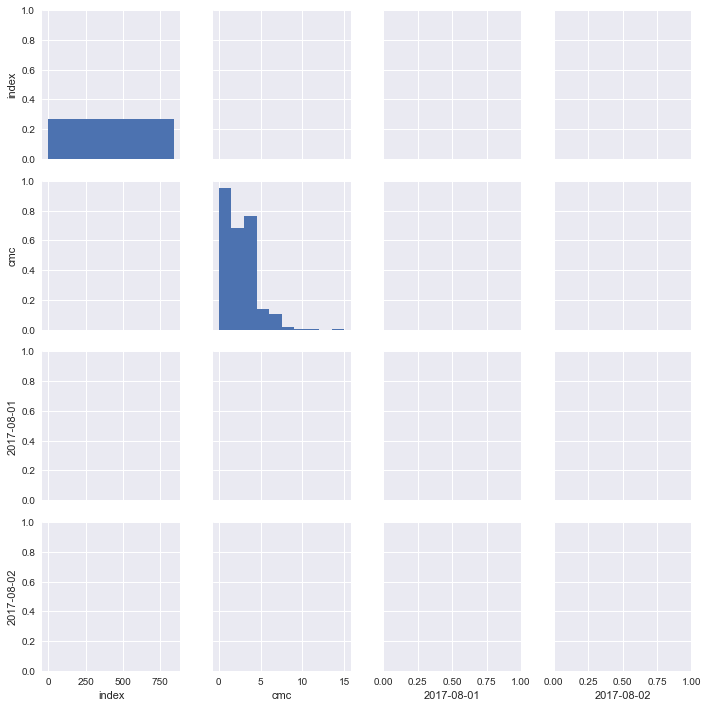

In [1555]:
smaller_df = smaller_set.loc[ :, ['file','card','cmc','2017-08-01','2017-08-02']].reset_index()


In [ ]:
sns.pairplot(smaller_df)

In [1485]:
smaller_set.head()

def map_cmc(card_name):
    try:
        return mtg[card_name]['cmc']
    except:
        return 0
    
    
smaller_set['card'] = smaller_set.file.map(  lambda s:  s.split('[', 1)[0].strip()  )
smaller_set['cmc'] = smaller_set.card.map(  map_cmc  )

smaller_set.loc[ :, ['file','card','cmc','2017-08-01','2017-08-02']].head(20)

date                                 file                       card  cmc
0           Abbot of Keral Keep [ORI].csv        Abbot of Keral Keep    2
1                  Abrupt Decay [MM3].csv               Abrupt Decay    2
2              Abzan Ascendancy [KTK].csv           Abzan Ascendancy    3
3                   Abzan Charm [C16].csv                Abzan Charm    3
4                 Academy Ruins [MMA].csv              Academy Ruins    0
5                  Acidic Slime [C13].csv               Acidic Slime    5
6                    Ad Nauseam [ALA].csv                 Ad Nauseam    5
7                Adarkar Wastes [10E].csv             Adarkar Wastes    0
8                   Aether Vial [DST].csv                Aether Vial    1
9               Agent of Erebos [JOU].csv            Agent of Erebos    4
10               Ajani Vengeant [ALA].csv             Ajani Vengeant    4
11            Ajani's Pridemate [C13].csv          Ajani's Pridemate    2
12           Akoum Battlesinger [WWK].csv         Akoum Battlesinger    2
13                  All Is Dust [MM2].csv                All Is Dust    7
14              Ally Encampment [BFZ].csv            Ally Encampment    0
15              Amulet of Vigor [WWK].csv            Amulet of Vigor    1
16    Anafenza, Kin-Tree Spirit [DTK].csv  Anafenza, Kin-Tree Spirit    2
17       Anafenza, the Foremost [KTK].csv     Anafenza, the Foremost    3
18             Ancestral Vision [DD2].csv           Ancestral Vision    0
19               Ancient Grudge [ISD].csv             Ancient Grudge    2

In [1368]:
smaller_set.info

<bound method DataFrame.info of date                                 2017-08-01  2017-08-02  2017-08-03  \
file                                                                      
Abbot of Keral Keep [ORI].csv              1.15        1.15        1.14   
Abrupt Decay [MM3].csv                     4.65        4.65        4.64   
Abzan Ascendancy [KTK].csv                 0.30        0.30        0.30   
Abzan Charm [C16].csv                      0.25        0.25        0.25   
Academy Ruins [MMA].csv                   22.33       22.75       22.77   
Acidic Slime [C13].csv                     0.22        0.22        0.22   
Ad Nauseam [ALA].csv                       9.36        9.37        9.37   
Adarkar Wastes [10E].csv                   9.49        9.44        9.49   
Aether Vial [DST].csv                     45.64       45.68       45.68   
Agent of Erebos [JOU].csv                  0.22        0.22        0.22   
Ajani Vengeant [ALA].csv                  10.78       10.78       10

In [1421]:
mtg['Weathered Wayfarer']

{'cmc': 1,
 'colorIdentity': ['W'],
 'colors': ['White'],
 'imageName': 'weathered wayfarer',
 'layout': 'normal',
 'legalities': [{'format': 'Commander', 'legality': 'Legal'},
  {'format': 'Legacy', 'legality': 'Legal'},
  {'format': 'Modern', 'legality': 'Legal'},
  {'format': 'Onslaught Block', 'legality': 'Legal'},
  {'format': 'Vintage', 'legality': 'Legal'}],
 'manaCost': '{W}',
 'name': 'Weathered Wayfarer',
 'power': '1',
 'printings': ['ONS', '9ED'],
 'subtypes': ['Human', 'Nomad', 'Cleric'],
 'text': '{W}, {T}: Search your library for a land card, reveal it, and put it into your hand. Then shuffle your library. Activate this ability only if an opponent controls more lands than you.',
 'toughness': '1',
 'type': 'Creature — Human Nomad Cleric',
 'types': ['Creature']}

In [ ]:
 
sns.pairplot(smaller_set)

In [1582]:
y = smaller_set.iloc[:,-3:-2]

#x = smaller_set.iloc[:,-3:-2]

# rename the last price column to be label
smaller_set.rename(columns={'2017-08-30': 'label'}, inplace=True)

In [1587]:
#smaller_set.iloc[:,-5:].head(20)
smaller_set.columns

Index(['file', '2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
       '2017-08-05', '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
       '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13', '2017-08-14',
       '2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19',
       '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
       '2017-08-25', '2017-08-26', '2017-08-27', '2017-08-28', '2017-08-29',
       'label', 'card', 'cmc'],
      dtype='object', name='date')

In [1635]:
#mystock.columns

mystock.iloc[:,1:].columns

Index(['2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04', '2017-08-05',
       '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09', '2017-08-10',
       '2017-08-11', '2017-08-12', '2017-08-13', '2017-08-14', '2017-08-15',
       '2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19', '2017-08-20',
       '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24', '2017-08-25',
       '2017-08-26', '2017-08-27', '2017-08-28', '2017-08-29', 'label', 'card',
       'cmc'],
      dtype='object', name='date')

In [1903]:
df_dummy = mystock2.iloc[50:,-5:]

df_card = pd.get_dummies(df_dummy.card)

df_new = pd.concat([df_dummy, df_card], axis=1)

print('df_dummy >> ', df_dummy.shape)
print('df_new >> ', df_new.shape)


len(df_dummy.card.unique())


mystock.head()

df_dummy >>  (786, 5)
df_new >>  (786, 791)


date                           file  2017-08-01  2017-08-02  2017-08-03  \
0     Abbot of Keral Keep [ORI].csv        1.15        1.15        1.14   
1            Abrupt Decay [MM3].csv        4.65        4.65        4.64   
2        Abzan Ascendancy [KTK].csv        0.30        0.30        0.30   
3             Abzan Charm [C16].csv        0.25        0.25        0.25   
4           Academy Ruins [MMA].csv       22.33       22.75       22.77   

date  2017-08-04  2017-08-05  2017-08-06  2017-08-07  2017-08-08  2017-08-09  \
0           1.14        1.11        1.10        1.11        1.10        1.07   
1           4.64        4.63        4.65        4.65        4.65        4.56   
2           0.30        0.31        0.31        0.31        0.31        0.31   
3           0.25        0.25        0.25        0.25        0.25        0.25   
4          22.77       22.63       22.63       22.51       22.05       22.05   

date  ...   2017-08-24  2017-08-25  2017-08-26  2017-08-27  2017-08-28  \
0     ...         1.04        1.04        1.03        1.03        1.02   
1     ...         4.50        4.50        4.50        4.50        4.50   
2     ...         0.31        0.31        0.31        0.31        0.31   
3     ...         0.25        0.25        0.25        0.25        0.25   
4     ...        22.79       22.35       22.19       22.21       22.21   

date  2017-08-29  2017-08-30                 card  cmc  wins  
0           1.02        1.02  Abbot of Keral Keep    2   123  
1           4.50        4.50         Abrupt Decay    2   123  
2           0.31        0.31     Abzan Ascendancy    3   123  
3           0.25        0.25          Abzan Charm    3   123  
4          21.99       22.49        Academy Ruins    0   123  

[5 rows x 34 columns]

In [1729]:
from sklearn import linear_model,ensemble, tree, model_selection

import numpy as np
import pandas as pd



#df = pd.read_csv("pair_dataset.csv", index_col=0)
#X,y = df.drop('label', axis=1), df['label']
#X,holdoutX,y,holdouty = model_selection.train_test_split(X,y,test_size = .1, random_state=42)

#mystock.columns
mystock.reset_index()
mystock2 =mystock.dropna(axis=0, how='any').reset_index()

X = mystock2.drop(['index','file','card','label'], axis=1)
y = mystock2['label']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = .1, random_state=42)


In [1732]:
print('x_train, x_test ==>', len(X_train),  len(X_test))
print('y_train, y_test ==>', len(y_train), len(y_test))

#X_train.columns

x_train, x_test ==> 752 84
y_train, y_test ==> 752 84


In [2250]:
X2 = mystock2.loc[:,['2017-08-28','2017-08-29']].reset_index()

X2.head()



date  index  2017-08-28  2017-08-29
0         0        1.02        1.02
1         1        4.50        4.50
2         2        0.31        0.31
3         3        0.25        0.25
4         4       22.21       21.99

### 29 days
<pre>
Coefficients: 
 [ -2.99457974e-01   3.19000121e-01  -1.15006592e-02  -1.17427613e-01
   1.05046061e-01  -1.03624426e-02   6.39965785e-02  -7.72722793e-02
   7.30766598e-02  -3.53085507e-02   1.42058444e-01  -1.49621247e-01
  -2.20637836e-01   1.43075856e-01   2.17774648e-01  -2.32051076e-01
   7.67282363e-02   3.86004215e-02   4.32324082e-02  -6.38266801e-02
   3.55781940e-02  -1.32582423e-01   6.36179024e-02   6.68241200e-03
   1.49722454e-01  -6.68390984e-02   1.48016501e-01  -6.47939389e-02
   8.55365334e-01  -1.85200997e-04]
Mean squared error: 0.07
Variance score: 0.99973

[('2017-08-01', -0.29945797419718245),
 ('2017-08-02', 0.3190001206036942),
 ('2017-08-03', -0.011500659216944348),
 ('2017-08-04', -0.11742761322153666),
 ('2017-08-05', 0.10504606060586169),
 ('2017-08-06', -0.010362442552021484),
 ('2017-08-07', 0.063996578503172641),
 ('2017-08-08', -0.077272279311979969),
 ('2017-08-09', 0.073076659772992852),
 ('2017-08-10', -0.035308550668282215),
 ('2017-08-11', 0.14205844372969761),
 ('2017-08-12', -0.14962124695576182),
 ('2017-08-13', -0.2206378364292394),
 ('2017-08-14', 0.14307585581890864),
 ('2017-08-15', 0.2177746479521164),
 ('2017-08-16', -0.23205107631252375),
 ('2017-08-17', 0.076728236257006463),
 ('2017-08-18', 0.038600421462982336),
 ('2017-08-19', 0.043232408206153886),
 ('2017-08-20', -0.06382668008437245),
 ('2017-08-21', 0.035578194014495253),
 ('2017-08-22', -0.13258242267410711),
 ('2017-08-23', 0.063617902417652319),
 ('2017-08-24', 0.006682412001600524),
 ('2017-08-25', 0.14972245351856286),
 ('2017-08-26', -0.066839098427135396),
 ('2017-08-27', 0.14801650121652865),
 ('2017-08-28', -0.064793938930427952),
 ('2017-08-29', 0.85536533402298498),
 ('cmc', -0.00018520099662783229)]
 
</pre>

### -1 day only
<pre>
Coefficients: 
 [  1.46919541e-05   1.00165359e+00]
Mean squared error: 0.07275
Variance score: 0.99971

[('index', 1.4691954055450441e-05), 
('2017-08-29', 1.0016535904925636)]
</pre>

### -2 days
<pre>
Coefficients: 
 [  1.29227698e-05   2.91955727e-01   7.08924373e-01]
Mean squared error: 0.06625
Variance score: 0.99973

[('index', 1.2922769781694855e-05),
 ('2017-08-28', 0.29195572672527592),
 ('2017-08-29', 0.70892437321870949)]
</pre>


### -28 days (2 days)

<pre>
Coefficients: 
 [  5.82479363e-05   3.99139459e-01   6.09683222e-01]
Mean squared error: 0.34093
Variance score: 0.99862

[('index', 5.8247936304758714e-05),
 ('2017-08-01', 0.39913945859296196),
 ('2017-08-02', 0.60968322179520562)]
</pre> 

### -30 days (single)
<pre>
Coefficients: 
 [  6.86995929e-05   1.00647936e+00]
Mean squared error: 0.34702
Variance score: 0.99860

[('index', 6.8699592879758919e-05), 
 ('2017-08-01', 1.0064793572567989)]

</pre>



In [2379]:
mystock2.columns

Index(['index', 'file', '2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
       '2017-08-05', '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
       '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13', '2017-08-14',
       '2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19',
       '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
       '2017-08-25', '2017-08-26', '2017-08-27', '2017-08-28', '2017-08-29',
       'label', 'card', 'cmc'],
      dtype='object', name='date')

In [3068]:

def MY_REGRESSION_TRAIN_FIT(x,y):

    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, np.log(y), test_size = .1, random_state=42)

    lr_model = LinearRegression()
    lr_model.fit(x_train, y_train)

    ### Get the predictions on the training & test set
    y_train_pred = lr_model.predict(x_train)
    y_test_pred  = lr_model.predict(x_test)

    #calculate mean square error
    mse = mean_squared_error(y_test, y_test_pred)

    # what's the R2 is for linear regression
    r2 = r2_score(y_test, y_test_pred)

    #print('\n Coefficients & Intercept: \n', lr_model.coef_, lr_model.intercept_)

    # The mean squared error
    #print("\n Mean squared error: %.5f" % mse)
    
    # Explained variance score: 1 is perfect prediction
    #print('\n Variance score: %.5f' % r2)

    coef = list(zip( x.columns , lr_model.coef_))
    
    return mse, r2, coef, lr_model.intercept_

#=================================

x2 = mystock2.loc[:,['2017-08-01','2017-08-02']].reset_index()    # -28 days  (2 days)
y2 = mystock2['label']

mse, r2, coef, intercept = MY_REGRESSION_TRAIN_FIT(x2,y2)

coef    

[('index', 0.00012836259523382352),
 ('2017-08-01', 0.31382117112591279),
 ('2017-08-02', -0.25532986299235938)]

In [3187]:
def MY_LASSO_TRAIN_FIT(x,y,alpha):
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, np.log(y), test_size = .1, random_state=42)
    
    lr_model_lasso = Lasso(alpha = alpha)      # 3, 0.10,   0.01
    lr_model_lasso.fit(x_train, y_train)

    ### Get the predictions on the training & test set
    y_train_pred = lr_model_lasso.predict(x_train)
    y_test_pred  = lr_model_lasso.predict(x_test)

    #calculate mean square error
    mse = mean_squared_error(y_test, y_test_pred)

    # what's the R2 is for linear regression
    r2 = r2_score(y_test, y_test_pred)
    
    #RMSE
    #print("RMSE >>", np.sqrt(np.mean((y_test_pred - y_test)**2)))

    coef = list(zip( x.columns , lr_model_lasso.coef_))
    
    return mse, r2, coef, lr_model_lasso.intercept_


  

In [2381]:
#mystock2.columns
# try to fit with only the previous day's price

#X2 = mystock2.loc[:,['2017-08-29']].reset_index()    # 1 days
#X2 = mystock2.loc[:,['2017-08-28','2017-08-29']].reset_index()    # 2 days
X2 = mystock2.loc[:,['2017-08-01','2017-08-02']].reset_index()    # -28 days  (2 days)
#X2 = mystock2.loc[:,['2017-08-01']].reset_index()                 # -30 days  (single day)
y2 = mystock2['label']

X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(X2,y2,test_size = .1, random_state=42)
lr_model2 = LinearRegression()
lr_model2.fit(X2_train,y2_train)
lr_model2.coef_, lr_model2.intercept_

### Get the predictions on the training & test set
train_set2_pred1 = lr_model2.predict(X2_train)
test_set2_pred1 = lr_model2.predict(X2_test)

#calculate mean square error
mean_squared_error(y2_test, test_set2_pred1)

# what's the R2 is for linear regression
r2_score(y2_test, test_set2_pred1)

print('Coefficients: \n', lr_model2.coef_)
# The mean squared error
print("Mean squared error: %.5f"
      % mean_squared_error(y2_test, test_set2_pred1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y2_test, test_set2_pred1))


list(zip( X2.columns , lr_model2.coef_))



Coefficients: 
 [  5.82479363e-05   3.99139459e-01   6.09683222e-01]
Mean squared error: 0.34093
Variance score: 0.99862


[('index', 5.8247936304758714e-05),
 ('2017-08-01', 0.39913945859296196),
 ('2017-08-02', 0.60968322179520562)]

In [ ]:
mystock4.reset_index()
sns.pairplot(sns.pairplot(mystock4.iloc[:,-3:].reset_index()))

In [1734]:
lr_model1 = LinearRegression()
lr_model1.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1735]:
lr_model1.coef_, lr_model1.intercept_

(array([ -2.99457974e-01,   3.19000121e-01,  -1.15006592e-02,
         -1.17427613e-01,   1.05046061e-01,  -1.03624426e-02,
          6.39965785e-02,  -7.72722793e-02,   7.30766598e-02,
         -3.53085507e-02,   1.42058444e-01,  -1.49621247e-01,
         -2.20637836e-01,   1.43075856e-01,   2.17774648e-01,
         -2.32051076e-01,   7.67282363e-02,   3.86004215e-02,
          4.32324082e-02,  -6.38266801e-02,   3.55781940e-02,
         -1.32582423e-01,   6.36179024e-02,   6.68241200e-03,
          1.49722454e-01,  -6.68390984e-02,   1.48016501e-01,
         -6.47939389e-02,   8.55365334e-01,  -1.85200997e-04]),
 0.0054348965351751488)

In [1736]:
### Get the predictions on the training set
train_set_pred1 = lr_model1.predict(X_train)

In [1737]:
### Get the predictions on the test set
test_set_pred1 = lr_model1.predict(X_test)

### 1. first run was only using 30 day stock data & CMC
Mean Square = 
0.066664630206035261

In [1738]:
#calculate mean square error
mean_squared_error(y_test, test_set_pred1)

0.066664630206035261

### 2. R2 is basically 1 of 100%
R2 score for 30 days stock & CMC
0.99973097446459092

In [2220]:
from sklearn.metrics import r2_score

# what's the R2 is for linear regression
r2_score(y_test, test_set_pred1)

0.99973097446459092

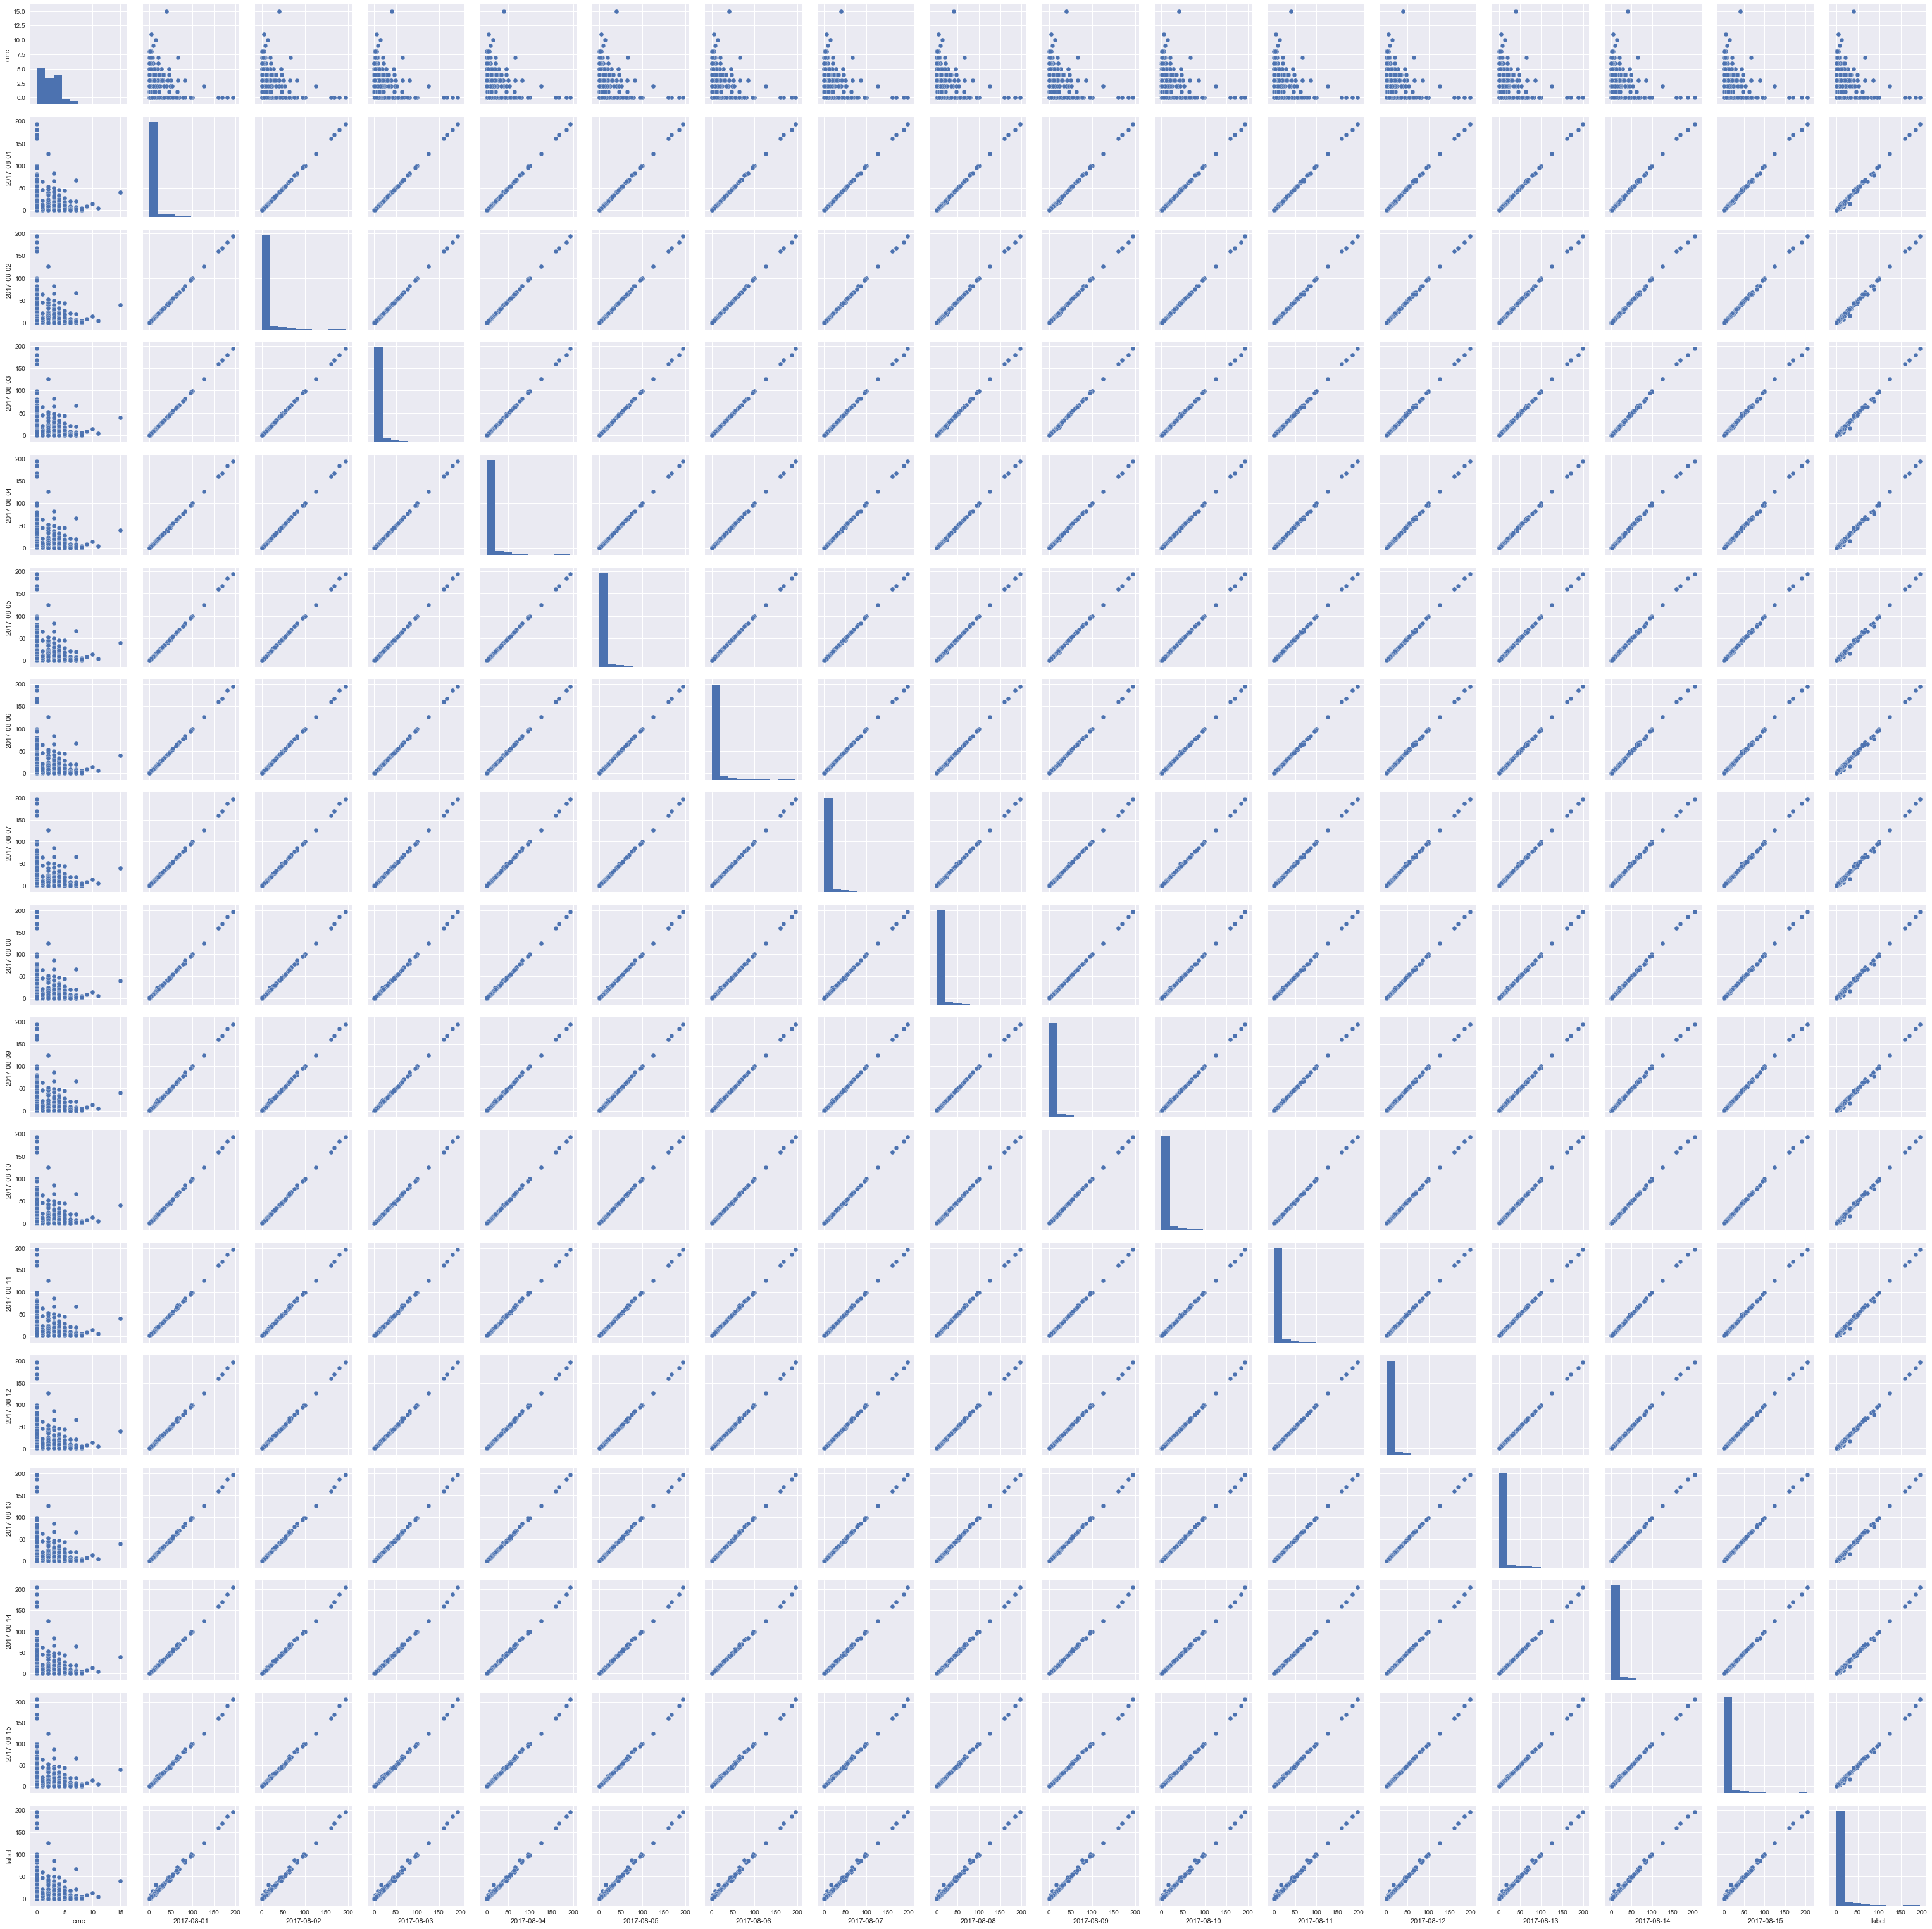

In [3180]:

mystock4 = mystock2.loc[:,['cmc', '2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
       '2017-08-05', '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
       '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13', '2017-08-14',
       '2017-08-15',
       'label' ]]

sns.pairplot(mystock4)

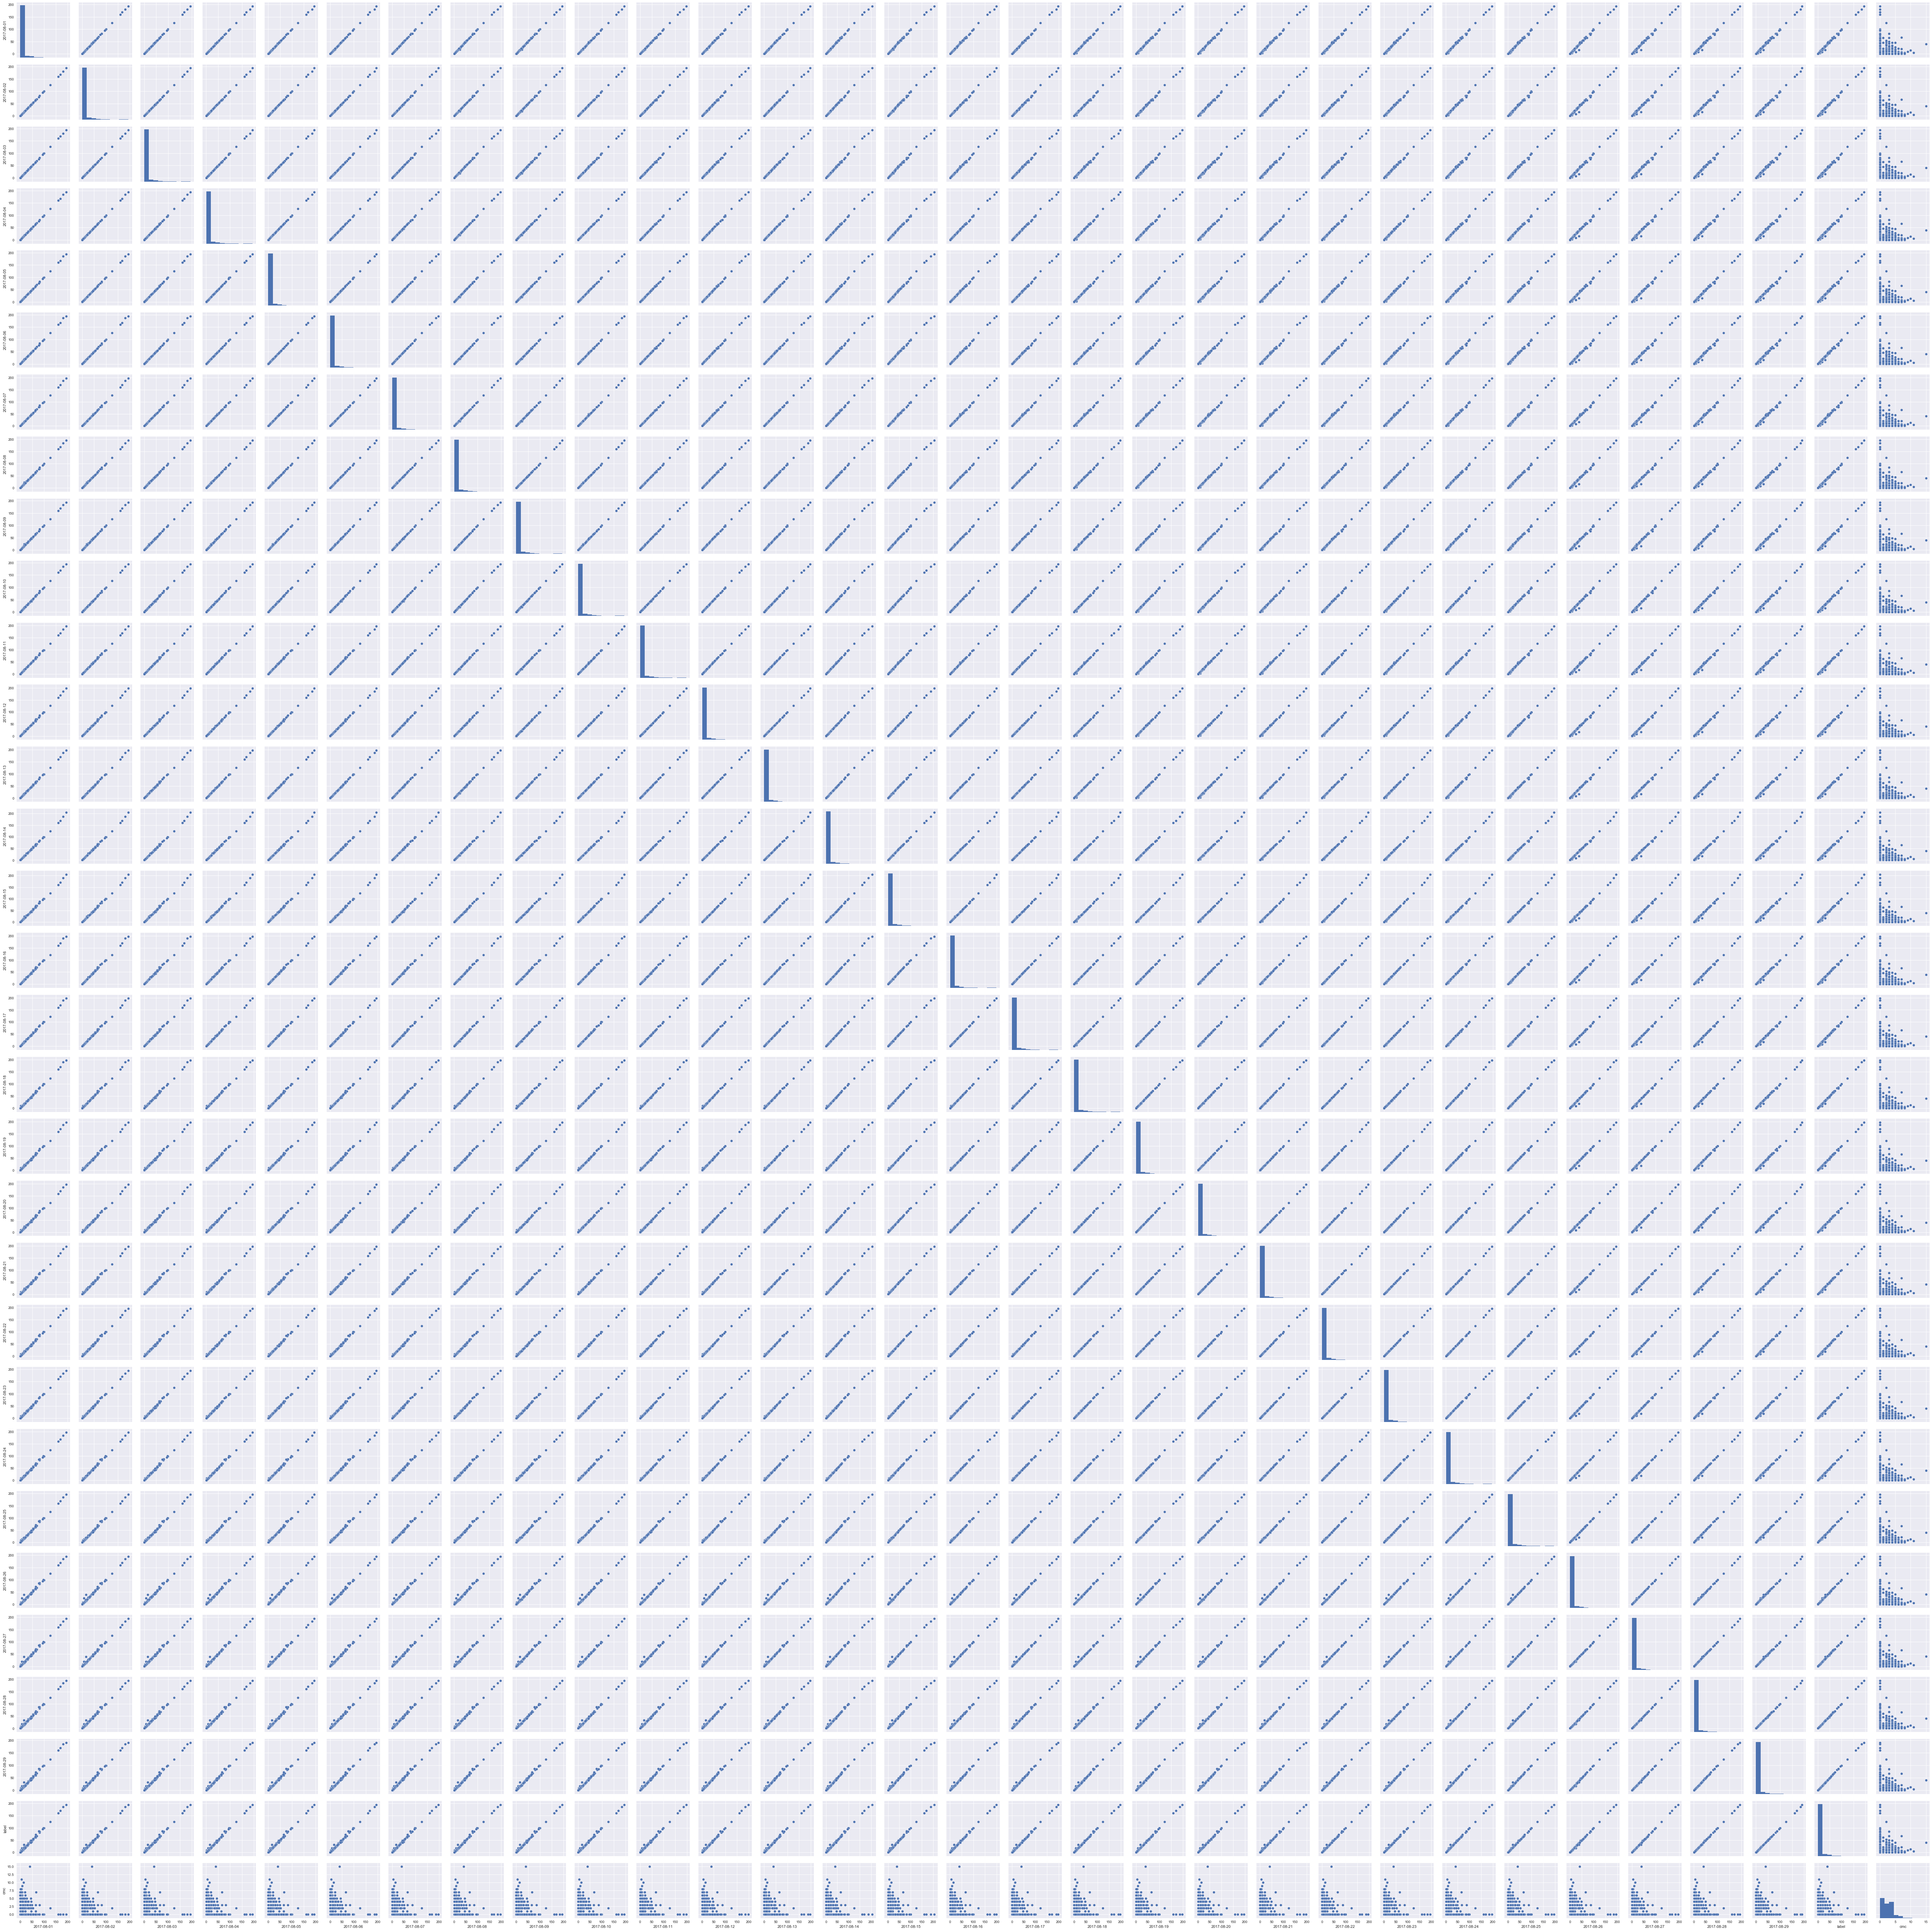

In [1726]:


mystock3 = mystock2.loc[:,['2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
       '2017-08-05', '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
       '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13', '2017-08-14',
       '2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19',
       '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
       '2017-08-25', '2017-08-26', '2017-08-27', '2017-08-28', '2017-08-29',
       'label', 'cmc']]

sns.pairplot(mystock3)


In [2228]:
mystock3.head(20)

date  2017-08-01  2017-08-02  2017-08-03  2017-08-04  2017-08-05  2017-08-06  \
0           1.15        1.15        1.14        1.14        1.11        1.10   
1           4.65        4.65        4.64        4.64        4.63        4.65   
2           0.30        0.30        0.30        0.30        0.31        0.31   
3           0.25        0.25        0.25        0.25        0.25        0.25   
4          22.33       22.75       22.77       22.77       22.63       22.63   
5           0.22        0.22        0.22        0.22        0.22        0.22   
6           9.36        9.37        9.37        9.37        9.37        9.37   
7           9.49        9.44        9.49        9.32        9.44        9.44   
8          45.64       45.68       45.68       45.68       45.66       45.68   
9           0.22        0.22        0.22        0.22        0.22        0.22   
10         10.78       10.78       10.71       10.58       10.67       10.77   
11          0.61        0.62        0.62        0.62        0.65        0.66   
12          0.16        0.16        0.16        0.16        0.16        0.16   
13         20.28       20.31       19.91       20.00       20.07       20.07   
14          0.44        0.44        0.44        0.44        0.43        0.43   
15          8.00        8.01        8.00        8.00        8.02        8.00   
16          1.22        1.22        1.21        1.21        1.22        1.22   
17          2.92        2.86        2.85        2.85        2.84        2.83   
18         51.00       51.00       51.00       51.00       51.54       51.54   
19          0.28        0.28        0.27        0.27        0.26        0.26   

date  2017-08-07  2017-08-08  2017-08-09  2017-08-10 ...   2017-08-22  \
0           1.11        1.10        1.07        1.07 ...         1.04   
1           4.65        4.65        4.56        4.54 ...         4.52   
2           0.31        0.31        0.31        0.31 ...         0.31   
3           0.25        0.25        0.25        0.25 ...         0.25   
4          22.51       22.05       22.05       22.41 ...        22.89   
5           0.22        0.22        0.22        0.22 ...         0.22   
6           9.37        9.36        9.18        9.06 ...         9.00   
7           9.32        9.24        9.19        9.23 ...         9.22   
8          45.52       45.64       45.93       45.97 ...        46.79   
9           0.22        0.22        0.22        0.22 ...         0.23   
10         10.83       10.81       10.81       10.86 ...        10.85   
11          0.65        0.65        0.65        0.65 ...         0.68   
12          0.16        0.16        0.16        0.16 ...         0.16   
13         20.41       20.04       20.26       20.34 ...        20.79   
14          0.43        0.43        0.42        0.41 ...         0.41   
15          8.00        8.00        8.00        8.00 ...         8.10   
16          1.21        1.21        1.20        1.20 ...         1.19   
17          2.84        2.84        2.79        2.79 ...         2.75   
18         51.32       50.80       50.60       50.08 ...        49.49   
19          0.27        0.26        0.26        0.26 ...         0.25   

date  2017-08-23  2017-08-24  2017-08-25  2017-08-26  2017-08-27  2017-08-28  \
0           1.04        1.04        1.04        1.03        1.03        1.02   
1           4.50        4.50        4.50        4.50        4.50        4.50   
2           0.31        0.31        0.31        0.31        0.31        0.31   
3           0.25        0.25        0.25        0.25        0.25        0.25   
4          22.94       22.79       22.35       22.19       22.21       22.21   
5           0.22        0.22        0.21        0.21        0.21        0.21   
6           9.00        9.00        9.00        9.00        9.00        8.99   
7           9.25        9.28        9.25        9.28        9.24        9.23   
8          45.99       46.80       47.47       47.61       47.31 

In [2229]:
# y_test <>  y_predicted
[ [str(round(a,2)), str(round(b,2)) ] for a,b in zip(y_test, test_set_pred1)]


np.sqrt(np.mean(  ( y_test - test_set_pred1 ) **2  ))


#plt.scatter(y_test, test_set_pred1)


0.25819494612798927

In [2226]:
print('Coefficients: \n', lr_model1.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, test_set_pred1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_test, test_set_pred1))




Coefficients: 
 [ -2.99457974e-01   3.19000121e-01  -1.15006592e-02  -1.17427613e-01
   1.05046061e-01  -1.03624426e-02   6.39965785e-02  -7.72722793e-02
   7.30766598e-02  -3.53085507e-02   1.42058444e-01  -1.49621247e-01
  -2.20637836e-01   1.43075856e-01   2.17774648e-01  -2.32051076e-01
   7.67282363e-02   3.86004215e-02   4.32324082e-02  -6.38266801e-02
   3.55781940e-02  -1.32582423e-01   6.36179024e-02   6.68241200e-03
   1.49722454e-01  -6.68390984e-02   1.48016501e-01  -6.47939389e-02
   8.55365334e-01  -1.85200997e-04]
Mean squared error: 0.07
Variance score: 0.99973


In [2233]:
[ x for x in zip( X.columns , lr_model1.coef_)]

[('2017-08-01', -0.29945797419718245),
 ('2017-08-02', 0.3190001206036942),
 ('2017-08-03', -0.011500659216944348),
 ('2017-08-04', -0.11742761322153666),
 ('2017-08-05', 0.10504606060586169),
 ('2017-08-06', -0.010362442552021484),
 ('2017-08-07', 0.063996578503172641),
 ('2017-08-08', -0.077272279311979969),
 ('2017-08-09', 0.073076659772992852),
 ('2017-08-10', -0.035308550668282215),
 ('2017-08-11', 0.14205844372969761),
 ('2017-08-12', -0.14962124695576182),
 ('2017-08-13', -0.2206378364292394),
 ('2017-08-14', 0.14307585581890864),
 ('2017-08-15', 0.2177746479521164),
 ('2017-08-16', -0.23205107631252375),
 ('2017-08-17', 0.076728236257006463),
 ('2017-08-18', 0.038600421462982336),
 ('2017-08-19', 0.043232408206153886),
 ('2017-08-20', -0.06382668008437245),
 ('2017-08-21', 0.035578194014495253),
 ('2017-08-22', -0.13258242267410711),
 ('2017-08-23', 0.063617902417652319),
 ('2017-08-24', 0.006682412001600524),
 ('2017-08-25', 0.14972245351856286),
 ('2017-08-26', -0.06683909842

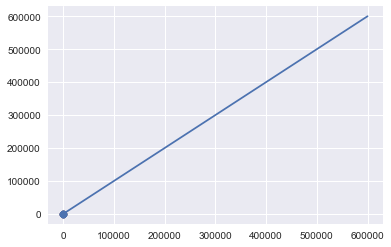

In [1692]:
plt.scatter(test_set_pred1,y_test,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))

In [2337]:
#len(X_train),len(y_train)
X.corr().head()


date        2017-08-01  2017-08-02  2017-08-03  2017-08-04  2017-08-05  \
date                                                                     
2017-08-01    1.000000    0.999956    0.999953    0.999874    0.999874   
2017-08-02    0.999956    1.000000    0.999977    0.999915    0.999909   
2017-08-03    0.999953    0.999977    1.000000    0.999919    0.999913   
2017-08-04    0.999874    0.999915    0.999919    1.000000    0.999964   
2017-08-05    0.999874    0.999909    0.999913    0.999964    1.000000   

date        2017-08-06  2017-08-07  2017-08-08  2017-08-09  2017-08-10  \
date                                                                     
2017-08-01    0.999844    0.999837    0.999767    0.999795    0.999831   
2017-08-02    0.999857    0.999825    0.999792    0.999805    0.999841   
2017-08-03    0.999879    0.999857    0.999799    0.999812    0.999831   
2017-08-04    0.999930    0.999883    0.999855    0.999843    0.999887   
2017-08-05    0.999964    0.999923    0.999895    0.999878    0.999910   

date          ...     2017-08-21  2017-08-22  2017-08-23  2017-08-24  \
date          ...                                                      
2017-08-01    ...       0.999286    0.999341    0.999403    0.999291   
2017-08-02    ...       0.999267    0.999317    0.999380    0.999254   
2017-08-03    ...       0.999264    0.999317    0.999363    0.999244   
2017-08-04    ...       0.999330    0.999386    0.999390    0.999270   
2017-08-05    ...       0.999399    0.999450    0.999447    0.999323   

date        2017-08-25  2017-08-26  2017-08-27  2017-08-28  2017-08-29  \
date                                                                     
2017-08-01    0.999175    0.997657    0.997921    0.998318    0.998354   
2017-08-02    0.999150    0.997659    0.997930    0.998326    0.998337   
2017-08-03    0.999150    0.997668    0.997941    0.998339    0.998350   
2017-08-04    0.999200    0.997719    0.997976    0.998386    0.998415   
2017-08-05    0.999252    0.997790    0.998045    0.998448    0.998459   

date             cmc  
date                  
2017-08-01 -0.122400  
2017-08-02 -0.122567  
2017-08-03 -0.122726  
2017-08-04 -0.122807  
2017-08-05 -0.122771  

[5 rows x 30 columns]

In [ ]:
#using pipelines to manage data
from sklearn import pipeline, manifold, preprocessing, feature_selection, decomposition

steps = [
('features', preprocessing.PolynomialFeatures(degree=2)),
('feature_selection', feature_selection.SelectFromModel(linear_model.Lasso(alpha = .2))),
('model',ensemble.GradientBoostingRegressor())]

regression_pipeline = pipeline.Pipeline(steps)
regression_pipeline.fit(X_train,y_train)
regression_pipeline.score(X_test,y_test)

### LASSO

#### Alpha Lasso(alpha = 0.10)

<pre>

RMSE
0.30427027006311824

[('2017-08-01', -0.0),
 ('2017-08-02', 0.0),
 ('2017-08-03', 0.0),
 ('2017-08-04', 0.0),
 ('2017-08-05', -0.0),
 ('2017-08-06', -0.0),
 ('2017-08-07', -0.0),
 ('2017-08-08', 0.0),
 ('2017-08-09', 0.0),
 ('2017-08-10', 0.0),
 ('2017-08-11', 0.0),
 ('2017-08-12', 0.0),
 ('2017-08-13', -0.0),
 ('2017-08-14', 0.0),
 ('2017-08-15', 0.01266666292671436),
 ('2017-08-16', 0.034718320909960791),
 ('2017-08-17', 0.020133700538546691),
 ('2017-08-18', 0.073924236164846086),
 ('2017-08-19', 0.0),
 ('2017-08-20', 0.034265356278318664),
 ('2017-08-21', 0.026274212967673616),
 ('2017-08-22', 0.026498012180159469),
 ('2017-08-23', 0.029813545362643516),
 ('2017-08-24', 0.052461340953301169),
 ('2017-08-25', 0.075305121784872836),
 ('2017-08-26', 0.52331686909609498),
 ('2017-08-27', 0.022230658141985538),
 ('2017-08-28', 0.0094616915905500684),
 ('2017-08-29', 0.056186131992629729),
 ('cmc', -0.0)]
</pre>

In [2361]:
lr_model_lasso = Lasso(alpha = 3)      # 0.10,   0.01
lr_model_lasso.fit(X_train, y_train)


test_set_pred_lasso = lr_model_lasso.predict(X_test)

#RMSE
print("RMSE >>", np.sqrt(np.mean((test_set_pred_lasso - y_test)**2)))


list(zip(X_train.columns, lr_model_lasso.coef_))

#X_train.iloc[:,-5:]

RMSE >> 0.247963244053


/Users/michaellin/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[('2017-08-01', 0.0),
 ('2017-08-02', 0.0),
 ('2017-08-03', 0.0),
 ('2017-08-04', 0.0),
 ('2017-08-05', 0.0),
 ('2017-08-06', 0.0),
 ('2017-08-07', 0.0),
 ('2017-08-08', 0.0),
 ('2017-08-09', 0.0),
 ('2017-08-10', 0.0),
 ('2017-08-11', 0.0),
 ('2017-08-12', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-14', 0.0),
 ('2017-08-15', 0.074055933667659377),
 ('2017-08-16', 0.0),
 ('2017-08-17', 0.012555821904751933),
 ('2017-08-18', 0.075794658092039821),
 ('2017-08-19', 0.0),
 ('2017-08-20', 0.0084475628526951823),
 ('2017-08-21', 0.045128487534543696),
 ('2017-08-22', 0.032957863581837693),
 ('2017-08-23', 0.0029889773116856559),
 ('2017-08-24', 0.068255348134486235),
 ('2017-08-25', 0.071773880177392627),
 ('2017-08-26', 0.53090795496105925),
 ('2017-08-27', 0.013588413408229763),
 ('2017-08-28', 0.0080670168225205098),
 ('2017-08-29', 0.043133433706219762),
 ('cmc', -0.0)]

In [2342]:
test_set_pred_lasso = lr_model_lasso.predict(X_test)

#RMSE
np.sqrt(np.mean((test_set_pred_lasso - y_test)**2))

0.30480253804287605

In [2345]:
list(zip(y_test, test_set_pred_lasso)) [:10]


[(3.75, 3.9579616987580613),
 (0.16, 0.15688776475075544),
 (0.25, 0.25619567813101229),
 (0.28999999999999998, 0.27706864504435952),
 (5.6900000000000004, 5.5798723540119131),
 (3.1699999999999999, 3.1158900075643885),
 (63.590000000000003, 65.378840670027685),
 (10.33, 10.290878623148497),
 (0.19, 0.18874377255293626),
 (0.17999999999999999, 0.1764973907193958)]

In [2336]:
test_set_pred_lasso_df = pd.DataFrame(test_set_pred_lasso,columns=['y'])

test_set_pred_lasso_df[(test_set_pred_lasso_df.y < 5)].head()

y_test_df = pd.DataFrame(y_test, columns=['y'])

#y_test_df[(y_ test_df['y'] < 5)].head()
y_test_df.head()

Empty DataFrame
Columns: [y]
Index: []

count    84.000000
mean      6.351388
std      16.016630
min       0.131704
25%       0.384410
50%       1.546599
75%       4.266310
max      94.812998
dtype: float64

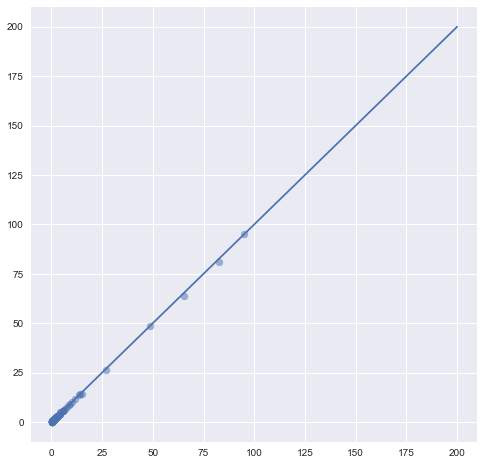

In [2302]:
import matplotlib.pyplot as plt
import seaborn as sns
#import ml_insights as mli

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

plt.figure(figsize=(8,8))
plt.scatter(test_set_pred_lasso,y_test,alpha=.5)
plt.plot(np.linspace(0,200,10),np.linspace(0,200,10))


pd.Series(test_set_pred_lasso).describe()
#pd.Series(y_test).describe()